## ELISA | CAPSTONE PROJECT MODULE 2
# 5 Nop 2024


* `Case Study : New York City TLC Trip Record`

# Latar Belakang Masalah
Industri taksi di New York City (NYC) menghadapi tantangan signifikan dalam beberapa tahun terakhir, termasuk penurunan jumlah perjalanan dan peningkatan biaya operasional. Data dari NYC Taxi and Limousine Commission (TLC) menunjukkan bahwa jumlah perjalanan taksi turun dari sekitar 17 juta pada tahun 2019 menjadi 12 juta pada tahun 2023, mencerminkan penurunan sekitar 29% (TLC, 2023). Selain itu, tarif dasar taksi mengalami peningkatan rata-rata 3% per tahun, sementara biaya tambahan meningkat hingga 5% dalam periode yang sama. Penurunan ini mengindikasikan bahwa banyak pengguna beralih ke layanan ride-hailing seperti Uber dan Lyft, yang menawarkan kenyamanan dan tarif yang kompetitif.

Dalam konteks ini, penting bagi perusahaan taksi untuk melakukan optimalisasi rute perjalanan guna meningkatkan produktivitas dan efisiensi. Dengan memanfaatkan data perjalanan yang ada, perusahaan dapat menganalisis pola penggunaan dan mengidentifikasi rute yang lebih efektif. Hal ini tidak hanya akan meningkatkan pengalaman pengguna tetapi juga membantu perusahaan bersaing dengan layanan ride-hailing yang semakin populer.

# Pernyataan Masalah
Perusahaan ingin mengetahui `karakteristik perjalanan taksi di NYC yang dapat membantu dalam memahami perilaku pengguna dan preferensi mereka.` Dengan penurunan jumlah perjalanan taksi yang signifikan dan meningkatnya biaya operasional, terdapat urgensi untuk melakukan improvement dalam optimalisasi rute perjalanan. Data menunjukkan bahwa dari Desember 2022 hingga Januari 2023, jumlah perjalanan taksi mengalami penurunan sekitar 15%, yang menunjukkan adanya kebutuhan untuk meningkatkan efisiensi operasional dan daya tarik layanan taksi.

Kendala yang dihadapi oleh perusahaan termasuk persaingan ketat dengan layanan ride-hailing yang menawarkan tarif dan kenyamanan yang lebih baik. Oleh karena itu, perusahaan perlu mengidentifikasi dan menerapkan strategi berbasis data untuk meningkatkan produktivitas, efisiensi, dan daya saing di pasar yang semakin kompetitif.

Sebagai seorang `data analyst`, saya akan mencoba menjawab pertanyaan berikut :

"Apa saja karakteristik perjalanan taksi di New York City yang dapat dianalisis untuk memahami perilaku pengguna dan preferensi mereka, sehingga perusahaan dapat mengidentifikasi strategi optimal dalam meningkatkan produktivitas dan efisiensi layanan taksi, serta bersaing lebih efektif dengan layanan ride-hailing seperti Uber dan Lyft?"

# Pertanyaan Penelitian 
Berdasarkan latar belakang masalah dan rumusan masalah, maka dirumuskan beberapa pertanyaan yang menjadi fokus pembahasan analisis yang saya lakukan adalah sebagai berikut :
* Jam berapa saja yang potensial untuk dilakukan pricing strategy untuk memaksimalkan revenue bagi perusahaan?
* Upaya apa saja yang dapat dilakukan untuk meningkatkan pendapatan di shit malam untuk menekan disparitas siang v.s malam?
* Pembayaran tipe apa yang perlu diperbanyak untuk meningkatkan kemudahan pelanggan?
* Bagaimana trend disparitas speed per jam di semua vendor?




# Ruang Lingkup Penelitian

* Fokus Geografis:
Penelitian ini akan terbatas pada area operasional taksi di New York City, dengan analisis data yang dikumpulkan dari NYC Taxi and Limousine Commission (TLC).

* Waktu Analisis:
Data yang akan dianalisis mencakup `periode dari Desember 2022 hingga Januari 2023`, untuk mengidentifikasi tren musiman dan perubahan perilaku pengguna dalam konteks waktu yang spesifik.

* Karakteristik Perjalanan:
Penelitian akan menganalisis karakteristik perjalanan taksi, termasuk:
* Frekuensi perjalanan berdasarkan waktu (jam dan hari).
* Rute dan tujuan perjalanan yang paling umum.
* Durasi perjalanan dan waktu tunggu.
* Biaya perjalanan dan tarif yang dikenakan.

* Perilaku Pengguna:
Fokus pada analisis perilaku pengguna, termasuk demografi pengguna dan pola penggunaan, untuk memahami preferensi dan kebutuhan mereka.

* Metodologi:
Metodologi yang digunakan akan mencakup analisis statistik deskriptif untuk menggambarkan data, serta analisis regresi untuk mengidentifikasi faktor-faktor yang mempengaruhi perilaku pengguna dan efisiensi rute.

# Data
D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record.csv

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. 
* `Import Package`

In [502]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import sklearn
import warnings
warnings.filterwarnings("ignore")

# Settings
import matplotlib
matplotlib.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8.5, 5)
plt.rcParams["patch.force_edgecolor"] = True
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.mpl.rc("figure", figsize=(8.5,5))

Dataset ini berisi informasi NYC TLC Trip Record (closed loop per frekuensi perjalanan dari pick up samapi dengan dropoff), `total ada 20 kolom`di dalam dataset ini a.l sbb:
* `1.VendorID,` ID penyedia layanan taksi. Kode yang menunjukkan penyedia LPEP `(1 = Creative Mobile Technologies, LLC., 2 = VeVeriFone Inc.). `
* `2.lpep_pickup_datetime,` Tanggal dan waktu saat penjemputan terjadi.
* `3.lpep_dropoff_datetime,` Tanggal dan waktu saat pengantaran terjadi.
* `4.store_and_fwd_flag,` Menunjukkan apakah trip disimpan untuk diteruskan.  Fungsinya : berkaitan dengan akurasi data, data integrity yakni menyimpan data saat koneksi tidak tersedia dan kemudian meneruskannya ketika koneksi kembali, integritas data dapat terjaga. Ini memastikan bahwa semua perjalanan tercatat, meskipun ada gangguan koneksi.
* `Y = store and forward trip`
* `N = not a store and forward trip`

* `5.RatecodeID,` Kode yang menunjukkan jenis tarif yang diterapkan.Penjelasan masing-masing ID:
* ID(1)Standard rate: Tarif standar
* ID(2)JFK: Tarif ke Bandara JFK
* ID(3)Newark: Tarif ke Bandara Newark
* ID(4)Nassau or Westchester: Tarif ke Nassau atau Westchester
* ID(5)Negotiated fare: Tarif yang dinegosiasikan
* ID(6)Group ride: Tarif untuk perjalanan kelompok
* ID(99)Tarif Khusus atau Tidak Dikenal

* `6.PULocationID,` Identifikasi lokasi penjemputan.
* `7.DOLocationID,` Identifikasi lokasi pengantaran
* `8.passenger_count,` Jumlah penumpang dalam kendaraan.
* `9.trip_distance,` Jarak yang ditempuh selama perjalanan. Satuannya miles (1 mile ≈ 1.60934 kilometers).
* `10.fare_amount,` Total biaya yang dikenakan untuk perjalanan (USD).
* `11.extra,` Biaya tambahan yang dikenakan (USD). Contoh kondisi yang memungkinkan menghasilkan `Extra Fee`:

        * Penumpang Tambahan;
        * Extra Bagasi;
        * Perjalanan malam hari;
        * Perjalanan jarak jauh;
        * Layanan khusus (kursi bayi atau aksesibilitas untuk penyandang disabilitas)
# Why is the Extra Fee Charged?
        * Menutupi biaya operasional;
        * Mendorong keadilan tarif;

* `12.mta_tax,` Pajak yang dikenakan oleh MTA (USD)
* `13.tip_amount,` Tip yang diberikan kepada pengemudi (USD).
* `14.tolls_amount,` Total biaya tol yang dibayarkan (USD).
* `15.ehail_fee,` biaya yang dikenakan ketika penumpang menggunakan aplikasi untuk memesan taksi, seperti aplikasi yang mendukung layanan e-hailing (USD). E-Hail Fee merupakan salah satu cara untuk mengintegrasikan teknologi dalam layanan taksi dan memberikan pengalaman yang lebih baik bagi penumpang.
* `16.improvement_surcharge,` Biaya perbaikan yang dikenakan (USD). biaya yang ditambahkan pada tarif taksi dasar untuk mendukung perbaikan dan peningkatan layanan taksi di kota.
* `17.total_amount,` Total biaya perjalanan termasuk semua biaya (USD).
* `18.payment_type,` Metode pembayaran yang digunakan (USD).
* `1.Credit card: Kartu kredit`
* `2.Cash: Tunai`
* `3.No charge: Tidak dikenakan biaya`
* `4.Dispute: Perselisihan`
* `5.Unknown: Tidak diketahui`
* `6.Voided trip: Perjalanan dibatalkan`
        
* `19.trip_type,` Menunjukkan jenis perjalanan. 
* `Type 1: Street-hail: Hail di jalan`:  penumpang menghentikan taksi di jalan
* `Type 2: Dispatch: Dispatch (penugasan otomatis)`: perjalanan ditugaskan melalui sistem dispatch
* `20.congestion_surcharge,` Biaya yang dikenakan saat terjadi kemacetan (USD). Biaya ini ditambahkan pada tarif taksi dasar ketika perjalanan dilakukan dalam area tertentu dan pada waktu yang ditentukan, biasanya saat lalu lintas padat.



# Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record :

In [503]:
df=pd.read_csv(r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record.csv')
display(df.head(),df.tail())

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000           223           179            1.000          0.000   
3       1.000            41           238            1.000          1.300   
4       1.000            41            74            1.000          1.100   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0       14.900  1.000    0.500       4.030         0.000        NaN   
1       10.700  1.000    0.500       2.640         0.000        NaN   
2        7.200  1.000    0.500       1.940         0.000        NaN   
3        6.500  0.500    1.500       1.700         0.000        NaN   
4        6.000  0.500    1.500       0.000         0.000        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                  1.000        24.180         1.000      1.000   
1                  1.000        15.840         1.000      1.000   
2                  1.000        11.640         1.000      1.000   
3                  1.000        10.200         1.000      1.000   
4                  1.000         8.000         1.000      1.000   

   congestion_surcharge  
0                 2.750  
1                 0.000  
2                 0.000  
3                 0.000  
4                 0.000

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
68206         NaN            49            62              NaN       4070.820   
68207         NaN            10           205              NaN          2.140   
68208         NaN            66            37              NaN          3.440   
68209         NaN           225           189              NaN          3.030   
68210         NaN           256           140              NaN          5.820   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
68206       15.700  0.000    0.000       0.000         0.000        NaN   
68207        4.410  0.000    0.000       0.000         0.000        NaN   
68208       16.530  0.000    0.000       3.510         0.000        NaN   
68209       14.980  0.000    0.000       3.200         0.000        NaN   
68210       23.650  0.000    0.000       2.000         0.000        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
68206                  1.000        16.700           NaN        NaN   
68207                  1.000         5.410           NaN        NaN   
68208                  1.000        21.040           NaN        NaN   
68209                  1.000        19.180           NaN        NaN   
68210                  1.000        29.400           NaN        NaN   

       congestion_surcharge  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209                   NaN  
68210                   NaN

## `Data Understanding and Cleaning`
Sebelum masuk ke dalam *analisis*, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

*Data Understanding*
* 1. Identifikasi Field dan Tipe Data : cari  yang relevan untuk analisis;
* 2. Statistik Deskriptif : Hitung statistik dasar (mean, median, mode, min, max) untuk memahami distribusi data;
* 3. Pola Perjalanan :Analisis pola perjalanan berdasarkan waktu, lokasi, dan jarak. Ini termasuk memeriksa waktu puncak dan rute yang sering digunakan;
* 4. Identifikasi Missing Values: cek nilai yang hilang dan field yang terpengaruh;
* 5. Outliers : perjalanan dengan jarak yang sangat pendek atau waktu yang sangat lama, jlh penumpang, dll;

*Data Cleaning*
* 1. Mengatasi Missing Values
* 2. Konsistensi Format Data
* 3. Normalisasi Jarak dan Waktu: perbedaan satuan
* 4. Penghapusan Duplikasi
* 5. Validasi Data Geografis, memastikan dalam rentang valid kota New York
* 6. Pemrosesan Outliers:bagaimana menangani outliers: apakah akan dihapus, ditandai, atau diselidiki lebih lanjut.
* 7. Transformasi Data: Jika diperlukan untuk mendistribusikan data lebih baik.
* 8. Pembuatan Feature Baru: penambahan kolom baru.


Pertama, mari kita lihat `informasi dari setiap baris dan kolom` dataset NYC Taxi Trip :

In [504]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [505]:
display(df.describe(), df.describe(include='object'))

VendorID  RatecodeID  PULocationID  DOLocationID  passenger_count  \
count 68211.000   63887.000     68211.000     68211.000        63887.000   
mean      1.863       1.117        98.550       138.430            1.316   
std       0.344       1.373        61.244        76.761            0.979   
min       1.000       1.000         1.000         1.000            0.000   
25%       2.000       1.000        74.000        74.000            1.000   
50%       2.000       1.000        75.000       138.000            1.000   
75%       2.000       1.000       129.000       219.000            1.000   
max       2.000      99.000       265.000       265.000            9.000   

       trip_distance  fare_amount     extra   mta_tax  tip_amount  \
count      68211.000    68211.000 68211.000 68211.000   68211.000   
mean           8.115       16.604     0.825     0.588       2.139   
std          585.106       13.470     1.270     0.386       3.053   
min            0.000      -70.000    -2.500    -0.500     -10.500   
25%            1.110        9.300     0.000     0.500       0.000   
50%            1.850       13.500     0.000     0.500       1.600   
75%            3.210       19.800     1.000     0.500       3.330   
max       120098.840      490.000    12.500     2.750     222.220   

       tolls_amount  ehail_fee  improvement_surcharge  total_amount  \
count     68211.000      0.000              68211.000     68211.000   
mean          0.170        NaN                  0.952        21.789   
std           1.100        NaN                  0.197        15.457   
min           0.000        NaN                 -1.000       -71.500   
25%           0.000        NaN                  1.000        12.900   
50%           0.000        NaN                  1.000        17.900   
75%           0.000        NaN                  1.000        26.150   
max          36.050        NaN                  1.000       491.000   

       payment_type  trip_type  congestion_surcharge  
count     63887.000  63877.000             63887.000  
mean          1.374      1.022                 0.727  
std           0.508      0.146                 1.213  
min           1.000      1.000                -2.750  
25%           1.000      1.000                 0.000  
50%           1.000      1.000                 0.000  
75%           2.000      1.000                 2.750  
max           5.000      2.000                 2.750

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag
count                 68211                 68211              63887
unique                66575                 66519                  2
top     2023-01-07 23:58:06   2023-01-06 00:00:00                  N
freq                      4                     6              63579

In [506]:
## Menampilkan seluruh tipe data sekaligus
df.describe(include='all').T
## data object dan numerik digabung

count unique                  top   freq    mean  \
VendorID              68211.000    NaN                  NaN    NaN   1.863   
lpep_pickup_datetime      68211  66575  2023-01-07 23:58:06      4     NaN   
lpep_dropoff_datetime     68211  66519  2023-01-06 00:00:00      6     NaN   
store_and_fwd_flag        63887      2                    N  63579     NaN   
RatecodeID            63887.000    NaN                  NaN    NaN   1.117   
PULocationID          68211.000    NaN                  NaN    NaN  98.550   
DOLocationID          68211.000    NaN                  NaN    NaN 138.430   
passenger_count       63887.000    NaN                  NaN    NaN   1.316   
trip_distance         68211.000    NaN                  NaN    NaN   8.115   
fare_amount           68211.000    NaN                  NaN    NaN  16.604   
extra                 68211.000    NaN                  NaN    NaN   0.825   
mta_tax               68211.000    NaN                  NaN    NaN   0.588   
tip_amount            68211.000    NaN                  NaN    NaN   2.139   
tolls_amount          68211.000    NaN                  NaN    NaN   0.170   
ehail_fee                 0.000    NaN                  NaN    NaN     NaN   
improvement_surcharge 68211.000    NaN                  NaN    NaN   0.952   
total_amount          68211.000    NaN                  NaN    NaN  21.789   
payment_type          63887.000    NaN                  NaN    NaN   1.374   
trip_type             63877.000    NaN                  NaN    NaN   1.022   
congestion_surcharge  63887.000    NaN                  NaN    NaN   0.727   

                          std     min    25%     50%     75%        max  
VendorID                0.344   1.000  2.000   2.000   2.000      2.000  
lpep_pickup_datetime      NaN     NaN    NaN     NaN     NaN        NaN  
lpep_dropoff_datetime     NaN     NaN    NaN     NaN     NaN        NaN  
store_and_fwd_flag        NaN     NaN    NaN     NaN     NaN        NaN  
RatecodeID              1.373   1.000  1.000   1.000   1.000     99.000  
PULocationID           61.244   1.000 74.000  75.000 129.000    265.000  
DOLocationID           76.761   1.000 74.000 138.000 219.000    265.000  
passenger_count         0.979   0.000  1.000   1.000   1.000      9.000  
trip_distance         585.106   0.000  1.110   1.850   3.210 120098.840  
fare_amount            13.470 -70.000  9.300  13.500  19.800    490.000  
extra                   1.270  -2.500  0.000   0.000   1.000     12.500  
mta_tax                 0.386  -0.500  0.500   0.500   0.500      2.750  
tip_amount              3.053 -10.500  0.000   1.600   3.330    222.220  
tolls_amount            1.100   0.000  0.000   0.000   0.000     36.050  
ehail_fee                 NaN     NaN    NaN     NaN     NaN        NaN  
improvement_surcharge   0.197  -1.000  1.000   1.000   1.000      1.000  
total_amount           15.457 -71.500 12.900  17.900  26.150    491.000  
payment_type            0.508   1.000  1.000   1.000   2.000      5.000  
trip_type               0.146   1.000  1.000   1.000   1.000      2.000  
congestion_surcharge    1.213  -2.750  0.000   0.000   2.750      2.750

* Secara gambaran besar data, ditemukan adanya nilai negative/nilai MIN pada biaya2 seperti pada fare_amount (-70), extra (-2.500), mta_tax(-0.500), tip_amount(-10.500), improvement_surcharge(-1.000),total_amount (-71.500), congestion_surcharge (-2.750). Nilai negative ini tidak wajar dan akan ditangani lebih lanjut.

# Check Missing Value

In [507]:
# Check for missing values pada field apa saja dalam dataset
print(df.isnull().sum())

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [508]:
pd.set_option('display.max_colwidth', None)

# Data unique di tiap kolom
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                          data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                VendorID                 2   
1    lpep_pickup_datetime             66575   
2   lpep_dropoff_datetime             66519   
3      store_and_fwd_flag                 2   
4              RatecodeID                 6   
5            PULocationID               226   
6            DOLocationID               249   
7         passenger_count                10   
8           trip_distance              1870   
9             fare_amount              2553   
10                  extra                16   
11                mta_tax                 6   
12             tip_amount              1492   
13           tolls_amount                26   
14              ehail_fee                 0   
15  improvement_surcharge                 5   
16           total_amount              4670   
17           payment_type                 5   
18              trip_type                 2   
19   congestion_surcharge                 4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Berdasarkan data diatas kita dapat melihat bahwa:

* Dataset NYC TLC Trip memiliki total 20 kolom dengan jumlah bari 68.211
* Terdapat beberapa kolom yang memiliki data kosong (null values)
* Terdapat beberapa kolom yang memiliki tipe data numerik namun memiliki pengertian atau kategorisasi berdasarkan data dictionary sebaiknya dilakukan perubahan tipe data
* Terdapat beberapa kolom yang memiliki nilai negative akan dilakukan analisis lebih lanjut

In [509]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                  0.000
lpep_pickup_datetime      0.000
lpep_dropoff_datetime     0.000
store_and_fwd_flag        6.339
RatecodeID                6.339
PULocationID              0.000
DOLocationID              0.000
passenger_count           6.339
trip_distance             0.000
fare_amount               0.000
extra                     0.000
mta_tax                   0.000
tip_amount                0.000
tolls_amount              0.000
ehail_fee               100.000
improvement_surcharge     0.000
total_amount              0.000
payment_type              6.339
trip_type                 6.354
congestion_surcharge      6.339
dtype: float64

# Missing Value

* Secara umum, kita bisa melihat bahwa:
--------------------------------------
* dataset NEW YORK CITY TAXI TRIP DURATION memiliki `20 kolom dan 68211 baris`;
* beberapa kolom memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN, yakni: 
* 1. store_and_fwd_flag        6.339 % =4324 row data kosong
* 2. RatecodeID                6.339 % =4324 row data kosong
* 3. passenger_count           6.339 % =4324 row data kosong
* 4. ehail_fee               100.000 % =68211 row data kosong
* 5. payment_type              6.339 % =4324 row data kosong
* 6. trip_type                 6.354 % =4334 row data kosong
* 7. congestion_surcharge      6.339 % =4324 row data kosong

* kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` masih dalam format object, `perlu dikonversi ke tipe datetime` untuk mempermudah proses analisis;
* kolom `vendor)id` berisikan id unik untuk tiap vendor,   `1` Creative Mobile Technologies dan `2` VeriFone Inc.
* kolom `passenger_count` memiliki data tipe integer. Perlu di cek lebih detil min dan max dari jumlah penumpang. Ada beberapa situasi di mana jumlah penumpang mungkin tercatat sebagai 0, seperti:
    * Trip Kosong: Jika trip dibatalkan sebelum penumpang naik.
    * Data Error: Kesalahan dalam pencatatan data atau sistem yang tidak tepat. Perlu di cek dengan jaraknya`trip_distance`.
    * Adapun jumlah penumpang secara regulasi tidak memungkinkan 8 penumpang, Hanya ada 1 kejadian dengan 8 penumpang bisa dikatakan anomali dan bisa dilakukan outlier treatment.
    * Pola Umum: Kebanyakan perjalanan memiliki 1 hingga 3 penumpang. Jumlah yang lebih tinggi (5, 6, 8) jauh lebih sedikit, dan ini bisa menunjukkan bahwa perjalanan dengan jumlah penumpang tersebut adalah kejadian langka.
* kolom `ehailfee` kosong, ini dapat dilakukan pengisian dengan data berdasarkan referensi internet.

    * `Dalam sistem taksi New York City (NYC), biaya e-hail ditetapkan sebesar $1.25 per perjalanan untuk taksi kuning (Yellow Taxi) dan hijau (Green Taxi) yang dipesan melalui aplikasi e-hail yang disetujui.` Biaya ini bersifat tetap dan berlaku sama, baik untuk taksi yang menggunakan sistem pembayaran dari Creative Mobile Technologies (CMT) maupun VeriFone Inc., tanpa perbedaan berdasarkan vendor.

    * Sebagai bahan analisis, Anda bisa memasukkan nilai tetap $1.25 ini sebagai komponen biaya untuk semua perjalanan e-hailing karena tidak ada perbedaan biaya antara kedua penyedia layanan tersebut. Jika terdapat perubahan regulasi di masa depan, biasanya Komisi Taksi dan Limusin New York (TLC) akan memberikan pembaruan yang berlaku untuk seluruh taksi.

    * Referensi mengenai biaya e-hail dapat ditemukan di situs resmi TLC atau panduan tarif taksi NYC:
        * New York City Taxi & Limousine Commission
        * NYC Yellow Taxi Fare Guide
* kolom `trip_distance` memiliki satuan miles, perlu dikonversi ke KM untuk mempermudah analisis. 

# Visualisasi Missing Values

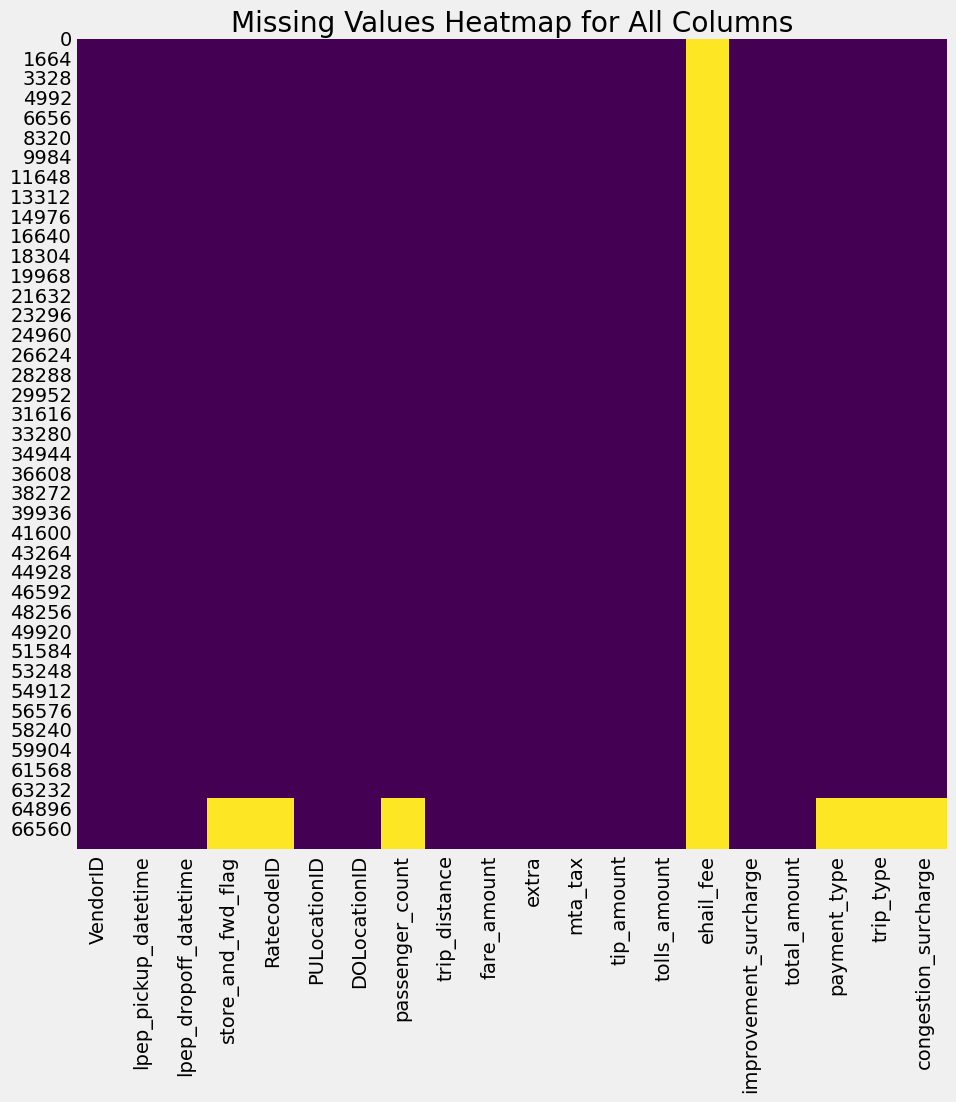

In [510]:
# Visualize missing values for all columns
plt.figure(figsize=(10, 10))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for All Columns")
plt.show()

Jika dilihat dari matrix diatas terdapat NULL Values pada kolom :
* store_and_fwd_flag        6.339 % =4324 row data kosong
* RatecodeID                6.339 % =4324 row data kosong
* passenger_count           6.339 % =4324 row data kosong
* ehail_fee               100.000 % =68211 row data kosong
* payment_type              6.339 % =4324 row data kosong
* trip_type                 6.354 % =4334 row data kosong
* congestion_surcharge      6.339 % =4324 row data kosong

Kolom ehail_fee tidak memiliki data, sehingga akan dicarikan referensi yang tepat untuk mengisikan nilai kosong pada kolom tsb.

Kolom passenger_count,RatecodeID,payment_type,trip_type serta congestion_surcharge memiliki jumlah nilai NULL yang sama dan akan kita lakukan analisis lebih lanjut pada tahapan data cleansing

`Ada 2 cara untuk menangani *missing value*:`
* `pertama, menghapus baris/kolom yang berisi *missing value*.` Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (ada yang 100% ehail_ fee).
* `kedua, mengisi data yang hilang.` Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, `cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli.` 
* Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir!!.

#### Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.` 

In [511]:
dataDesc = []
for i in df.columns:
    # Get the column's data type
    column_type = str(df[i].dtypes)
    
    # Count missing values and calculate percentage
    na_count = df[i].isna().sum()
    na_percentage = round((na_count / len(df)) * 100, 2)
    
    # Count unique values
    unique_count = df[i].nunique()
    
    # Sample two unique values if there are enough unique values
    if unique_count < 2:
        sample_values = df[i].drop_duplicates().values  # Get all unique values
    else:
        sample_values = df[i].drop_duplicates().sample(2).values  # Sample two unique values
    
    # Append the column statistics to the list
    dataDesc.append([i, column_type, na_count, na_percentage, unique_count, sample_values])

# Convert to DataFrame for better readability
dataDesc_df = pd.DataFrame(dataDesc, columns=['Column Name', 'Data Type', 'Missing Values', 'Missing Percentage', 'Unique Values', 'Sample Values'])

# Display the summary DataFrame
print(dataDesc_df)


              Column Name Data Type  Missing Values  Missing Percentage  \
0                VendorID     int64               0               0.000   
1    lpep_pickup_datetime    object               0               0.000   
2   lpep_dropoff_datetime    object               0               0.000   
3      store_and_fwd_flag    object            4324               6.340   
4              RatecodeID   float64            4324               6.340   
5            PULocationID     int64               0               0.000   
6            DOLocationID     int64               0               0.000   
7         passenger_count   float64            4324               6.340   
8           trip_distance   float64               0               0.000   
9             fare_amount   float64               0               0.000   
10                  extra   float64               0               0.000   
11                mta_tax   float64               0               0.000   
12             tip_amount

# Mengecek Nilai Duplikat

In [512]:
# Cek nilai duplikat

df.duplicated().sum()

np.int64(0)

In [513]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

* Tidak ada data duplikat pada dataset ini

# Missing Values Treatment

`1. Missing Values store_and_fwd_flag 6.339 % =4324 row data kosong`


In [514]:
# Menampilkan baris dengan nilai kosong pada kolom 'store_and_fwd_flag'
missing_data = df[df['store_and_fwd_flag'].isnull()]
missing_data

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
63887         2  2023-01-01 00:28:00   2023-01-01 00:54:00                NaN   
63888         2  2023-01-01 00:39:00   2023-01-01 00:52:00                NaN   
63889         2  2023-01-01 00:58:00   2023-01-01 01:21:00                NaN   
63890         2  2023-01-01 00:35:00   2023-01-01 00:55:00                NaN   
63891         2  2023-01-01 00:45:00   2023-01-01 00:55:00                NaN   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
63887         NaN             7            17              NaN          9.330   
63888         NaN            37            37              NaN          2.670   
63889         NaN            80             7              NaN          7.390   
63890         NaN           169            42              NaN          4.040   
63891         NaN            42           262              NaN          3.860   
...           ...           ...           ...              ...            ...   
68206         NaN            49            62              NaN       4070.820   
68207         NaN            10           205              NaN          2.140   
68208         NaN            66            37              NaN          3.440   
68209         NaN           225           189              NaN          3.030   
68210         NaN           256           140              NaN          5.820   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
63887       36.030  0.000    0.000       7.410         0.000        NaN   
63888       14.550  0.000    0.000       3.110         0.000        NaN   
63889       32.130  0.000    0.000       6.630         0.000        NaN   
63890       17.850  0.000    0.000       0.000         0.000        NaN   
63891       19.670  0.000    0.000       4.680         0.000        NaN   
...            ...    ...      ...         ...           ...        ...   
68206       15.700  0.000    0.000       0.000         0.000        NaN   
68207        4.410  0.000    0.000       0.000         0.000        NaN   
68208       16.530  0.000    0.000       3.510         0.000        NaN   
68209       14.980  0.000    0.000       3.200         0.000        NaN   
68210       23.650  0.000    0.000       2.000         0.000        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
63887                  1.000        44.440           NaN        NaN   
63888                  1.000        18.660           NaN        NaN   
63889                  1.000        39.760           NaN        NaN   
63890                  1.000        18.850           NaN        NaN   
63891                  1.000        28.100           NaN        NaN   
...                      ...           ...           ...        ...   
68206                  1.000        16.700           NaN        NaN   
68207                  1.000         5.410           NaN        NaN   
68208                  1.000        21.040           NaN        NaN   
68209                  1.000        19.180           NaN        NaN   
68210                  1.000        29.400           NaN        NaN   

       congestion_surcharge  
63887                   NaN  
63888                   NaN  
63889                   NaN  
63890                   NaN  
63891                   NaN  
...                     ...  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209  

Data dengan nilai kosong:
        VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
63887         2  2023-01-01 00:28:00   2023-01-01 00:54:00                NaN   
63888         2  2023-01-01 00:39:00   2023-01-01 00:52:00                NaN   
63889         2  2023-01-01 00:58:00   2023-01-01 01:21:00                NaN   
63890         2  2023-01-01 00:35:00   2023-01-01 00:55:00                NaN   
63891         2  2023-01-01 00:45:00   2023-01-01 00:55:00                NaN   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   



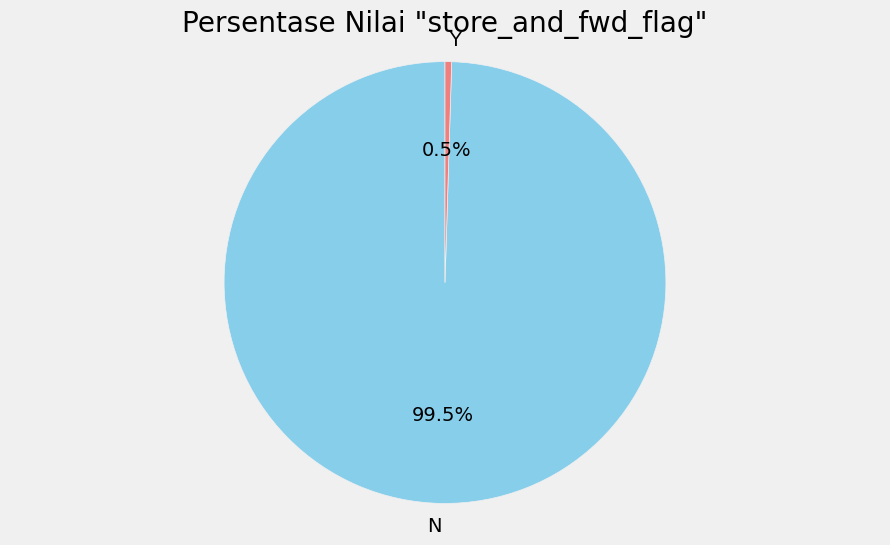

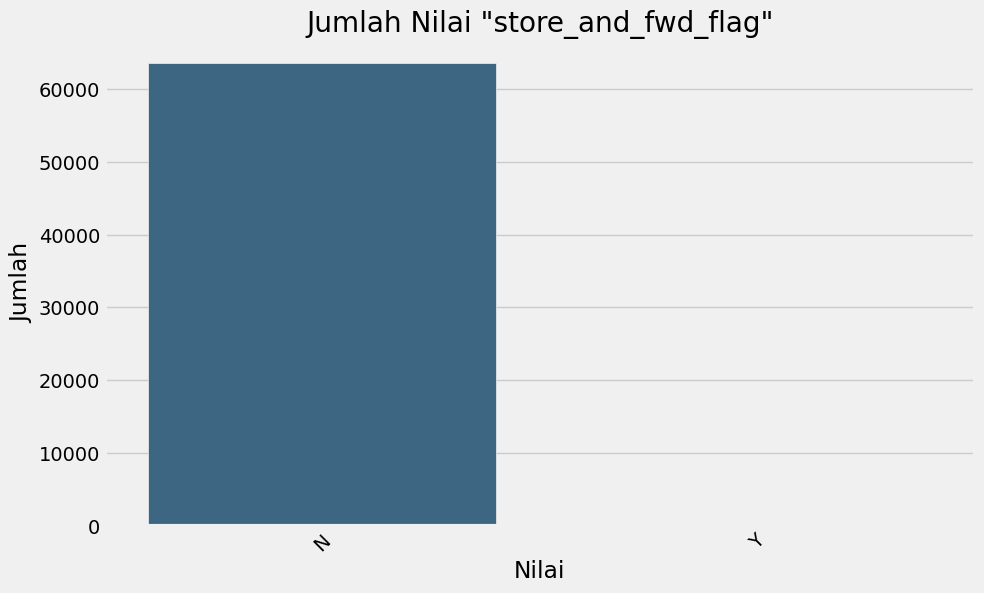

In [515]:
# Menampilkan baris dengan nilai kosong pada kolom 'store_and_fwd_flag'
missing_data = df[df['store_and_fwd_flag'].isnull()]

# Menghitung total jumlah baris
total_rows = df.shape[0]

# Menghitung jumlah setiap kategori pada 'store_and_fwd_flag'
value_counts = df['store_and_fwd_flag'].value_counts()

# Menghitung persentase nilai Y dan N
percentages = (value_counts / total_rows) * 100

# Menampilkan hasil
print("Data dengan nilai kosong:\n", missing_data)
print("\nPersentase nilai 'store_and_fwd_flag':")
print(percentages)

# Visualisasi - Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Persentase Nilai "store_and_fwd_flag"')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Visualisasi - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Jumlah Nilai "store_and_fwd_flag"')
plt.xlabel('Nilai')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


`Metode: Mengisi nilai yang hilang dengan nilai yang paling umum (mode) dari kolom tersebut. Jika store_and_fwd_flag adalah kolom kategorikal yang hanya berisi dua nilai (misalnya 'Y' untuk ya dan 'N' untuk tidak), Anda bisa mengisi nilai yang hilang dengan salah satu dari dua kategori tersebut.`

In [516]:
#Menangania Missing Values store_and_fwd_flag 6.339 % =4324 row data kosongimport pandas as pd

# Misalkan 'df' adalah DataFrame Anda yang sudah ada
# Mengisi nilai kosong dengan mode tanpa mengubah df
mode_value = df['store_and_fwd_flag'].mode()[0]
df1 = df.copy()  # Membuat salinan df
df1['store_and_fwd_flag'].fillna(mode_value, inplace=True)  # Mengisi nilai kosong di df1

# Menyimpan df1 ke file CSV
output_path = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df1.csv'
df1.to_csv(output_path, index=False)

# Menampilkan df1
df1


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1.000           166           143            1.000          2.580   
1           1.000            24            43            1.000          1.810   
2           1.000           223           179            1.000          0.000   
3           1.000            41           238            1.000          1.300   
4           1.000            41            74            1.000          1.100   
...           ...           ...           ...              ...            ...   
68206         NaN            49            62              NaN       4070.820   
68207         NaN            10           205              NaN          2.140   
68208         NaN            66            37              NaN          3.440   
68209         NaN           225           189              NaN          3.030   
68210         NaN           256           140              NaN          5.820   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0           14.900  1.000    0.500       4.030         0.000        NaN   
1           10.700  1.000    0.500       2.640         0.000        NaN   
2            7.200  1.000    0.500       1.940         0.000        NaN   
3            6.500  0.500    1.500       1.700         0.000        NaN   
4            6.000  0.500    1.500       0.000         0.000        NaN   
...            ...    ...      ...         ...           ...        ...   
68206       15.700  0.000    0.000       0.000         0.000        NaN   
68207        4.410  0.000    0.000       0.000         0.000        NaN   
68208       16.530  0.000    0.000       3.510         0.000        NaN   
68209       14.980  0.000    0.000       3.200         0.000        NaN   
68210       23.650  0.000    0.000       2.000         0.000        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
0                      1.000        24.180         1.000      1.000   
1                      1.000        15.840         1.000      1.000   
2                      1.000        11.640         1.000      1.000   
3                      1.000        10.200         1.000      1.000   
4                      1.000         8.000         1.000      1.000   
...                      ...           ...           ...        ...   
68206                  1.000        16.700           NaN        NaN   
68207                  1.000         5.410           NaN        NaN   
68208                  1.000        21.040           NaN        NaN   
68209                  1.000        19.180           NaN        NaN   
68210                  1.000        29.400           NaN        NaN   

       congestion_surcharge  
0                     2.750  
1                     0.000  
2                     0.000  
3                     0.000  
4                     0.000  
...                     ...  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209  

In [517]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

`2. Missing Values RatecodeID 6.339 % =4324 row data kosong`

* RatecodeID biasanya digunakan dalam dataset taksi atau transportasi untuk menunjukkan jenis tarif yang diterapkan pada perjalanan tertentu. Misalnya, dalam dataset taksi New York City, RatecodeID bisa menunjukkan apakah tarif tersebut adalah tarif standar, tarif bandara, tarif perjalanan jauh, dll.

* Pengaruh RatecodeID
RatecodeID dapat mempengaruhi analisis biaya perjalanan, pola penggunaan layanan, dan bahkan model prediksi tarif atau permintaan. Oleh karena itu, penanganan missing values pada RatecodeID penting untuk menjaga integritas analisis data.

In [518]:
# Tentukan kolom yang ingin dianalisis
column_name = 'RatecodeID'

# Hitung jumlah nilai kosong
missing_count = df[column_name].isna().sum()

# Hitung persentase nilai kosong
missing_percentage = round((missing_count / len(df)) * 100, 3)

# Format output
output = f"Missing Values {column_name} {missing_percentage}% = {missing_count} row data kosong"

# Tampilkan hasil
print(output)


Missing Values RatecodeID 6.339% = 4324 row data kosong


In [519]:
# Salin df1 ke df2
df2 = df1.copy()

# Mengisi nilai kosong pada RatecodeID di df2 dengan modus
mode_value = df2['RatecodeID'].mode()[0]
df2['RatecodeID'].fillna(mode_value, inplace=True)

# Simpan df2 ke file CSV
output_path = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df2.csv'
df2.to_csv(output_path, index=False)

# Tampilkan df2
df2


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1.000           166           143            1.000          2.580   
1           1.000            24            43            1.000          1.810   
2           1.000           223           179            1.000          0.000   
3           1.000            41           238            1.000          1.300   
4           1.000            41            74            1.000          1.100   
...           ...           ...           ...              ...            ...   
68206       1.000            49            62              NaN       4070.820   
68207       1.000            10           205              NaN          2.140   
68208       1.000            66            37              NaN          3.440   
68209       1.000           225           189              NaN          3.030   
68210       1.000           256           140              NaN          5.820   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0           14.900  1.000    0.500       4.030         0.000        NaN   
1           10.700  1.000    0.500       2.640         0.000        NaN   
2            7.200  1.000    0.500       1.940         0.000        NaN   
3            6.500  0.500    1.500       1.700         0.000        NaN   
4            6.000  0.500    1.500       0.000         0.000        NaN   
...            ...    ...      ...         ...           ...        ...   
68206       15.700  0.000    0.000       0.000         0.000        NaN   
68207        4.410  0.000    0.000       0.000         0.000        NaN   
68208       16.530  0.000    0.000       3.510         0.000        NaN   
68209       14.980  0.000    0.000       3.200         0.000        NaN   
68210       23.650  0.000    0.000       2.000         0.000        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
0                      1.000        24.180         1.000      1.000   
1                      1.000        15.840         1.000      1.000   
2                      1.000        11.640         1.000      1.000   
3                      1.000        10.200         1.000      1.000   
4                      1.000         8.000         1.000      1.000   
...                      ...           ...           ...        ...   
68206                  1.000        16.700           NaN        NaN   
68207                  1.000         5.410           NaN        NaN   
68208                  1.000        21.040           NaN        NaN   
68209                  1.000        19.180           NaN        NaN   
68210                  1.000        29.400           NaN        NaN   

       congestion_surcharge  
0                     2.750  
1                     0.000  
2                     0.000  
3                     0.000  
4                     0.000  
...                     ...  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209  

In [520]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

`3. Missing Values passenger_count 6.339 % =4324 row data kosong`

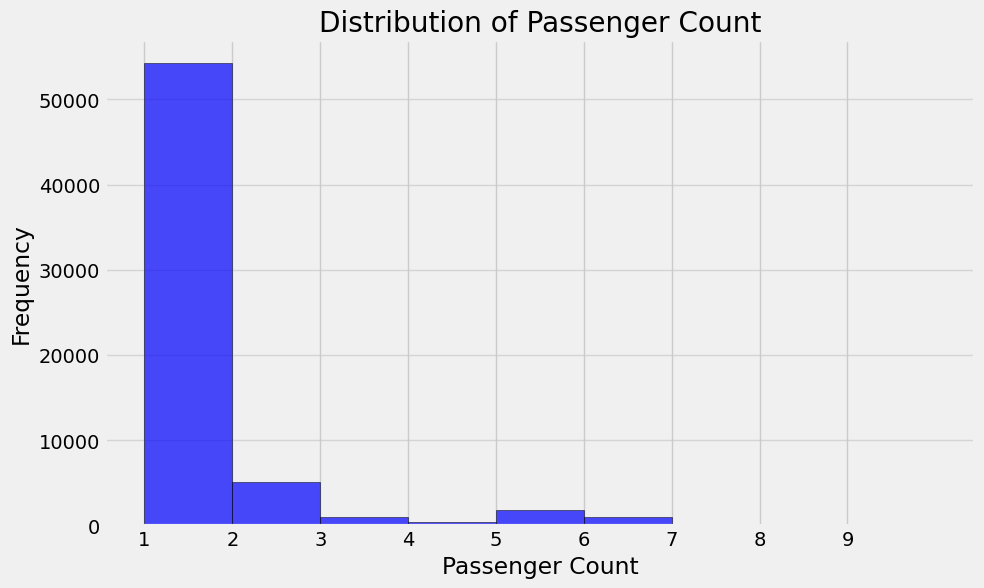

Mean: 1.3158702083365943
Median: 1.0
Mode: 1.0
Skewness: 3.501749230826181
Kurtosis: 11.963156559599348
Kesimpulan: Distribusi passenger_count tidak berdistribusi normal.
Rekomendasi: Gunakan median untuk analisis lebih lanjut.


In [521]:
# Cek data berdistribusi NORMAL / tidak Jika Normal (Mean), jika tidak berdistribusi normal (median)
# Pastikan kolom passenger_count berisi nilai numerik dan tidak ada NaN
df2['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')

# Plot histogram untuk melihat distribusi passenger_count
plt.figure(figsize=(10, 6))  # Menentukan ukuran gambar
plt.hist(df2['passenger_count'].dropna(), bins=range(1, int(df2['passenger_count'].max()) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')
plt.xticks(range(1, int(df2['passenger_count'].max()) + 1))
plt.grid(axis='y', alpha=0.75)  # Menambahkan grid untuk membantu visualisasi
plt.show()

# Menghitung statistik deskriptif
mean_value = df2['passenger_count'].mean()
median_value = df2['passenger_count'].median()
mode_value = df2['passenger_count'].mode()[0]

# Menentukan apakah distribusi normal atau tidak
# Anda bisa menggunakan skewness dan kurtosis untuk menentukan normalitas
skewness = df2['passenger_count'].skew()
kurtosis = df2['passenger_count'].kurtosis()

# Menampilkan hasil analisis
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Kesimpulan
if abs(skewness) < 0.5:
    distribution_type = "normal"
else:
    distribution_type = "not normal"

# Rekomendasi berdasarkan distribusi
if distribution_type == "normal":
    print("Kesimpulan: Distribusi passenger_count berdistribusi normal.")
    print("Rekomendasi: Gunakan mean untuk analisis lebih lanjut.")
    # Mengisi nilai kosong dengan mean
    df2['passenger_count'].fillna(mean_value, inplace=True)
else:
    print("Kesimpulan: Distribusi passenger_count tidak berdistribusi normal.")
    print("Rekomendasi: Gunakan median untuk analisis lebih lanjut.")
    # Mengisi nilai kosong dengan median
    df2['passenger_count'].fillna(median_value, inplace=True)


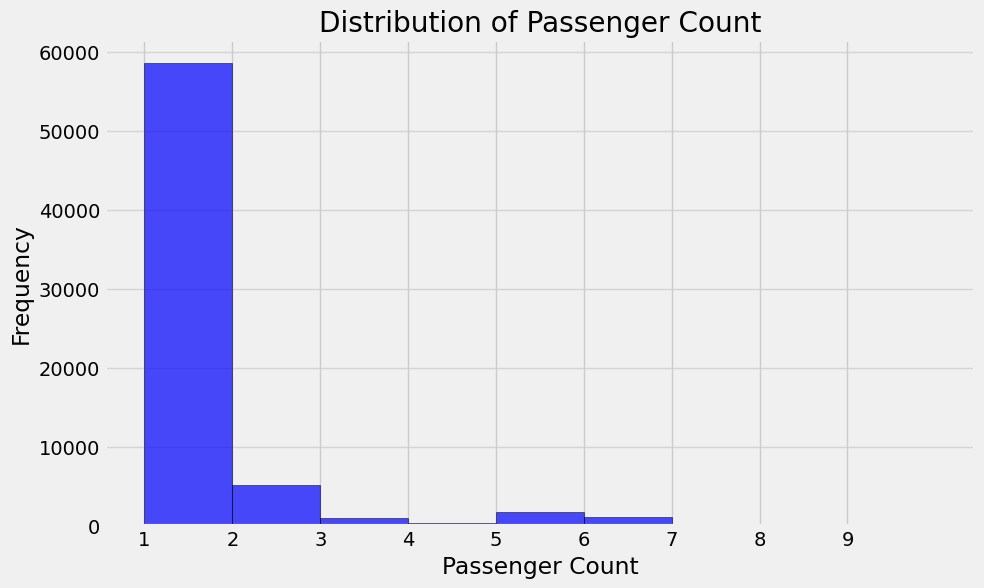

Mean: 1.2958467109410505
Median: 1.0
Mode: 1.0
Skewness: 3.643662311792212
Kurtosis: 13.072185958042596
Kesimpulan: Distribusi passenger_count tidak berdistribusi normal.
Rekomendasi: Gunakan median untuk analisis lebih lanjut.
Isi df3 setelah mengisi nilai kosong pada passenger_count:
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000      

In [522]:
# Step 1: Check if passenger_count is numeric and convert if necessary
df2['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')

# Step 2: Plot the histogram to check the distribution of passenger_count
plt.figure(figsize=(10, 6))
plt.hist(df2['passenger_count'].dropna(), bins=range(1, int(df2['passenger_count'].max()) + 2), 
         alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')
plt.xticks(range(1, int(df2['passenger_count'].max()) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Step 3: Calculate descriptive statistics
mean_value = df2['passenger_count'].mean()
median_value = df2['passenger_count'].median()
mode_value = df2['passenger_count'].mode()[0]
skewness = df2['passenger_count'].skew()
kurtosis = df2['passenger_count'].kurtosis()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Step 4: Determine if distribution is normal or not
if abs(skewness) < 0.5:
    distribution_type = "normal"
else:
    distribution_type = "not normal"

# Step 5: Copy df2 to df3
df3 = df2.copy()

# Step 6: Fill missing values in df3 based on the distribution type
if distribution_type == "normal":
    print("Kesimpulan: Distribusi passenger_count berdistribusi normal.")
    print("Rekomendasi: Gunakan mean untuk analisis lebih lanjut.")
    df3['passenger_count'].fillna(mean_value, inplace=True)
else:
    print("Kesimpulan: Distribusi passenger_count tidak berdistribusi normal.")
    print("Rekomendasi: Gunakan median untuk analisis lebih lanjut.")
    df3['passenger_count'].fillna(median_value, inplace=True)

# Step 7: Save df3 to the specified path
output_path = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df3.csv'
df3.to_csv(output_path, index=False)

# Display df3
print("Isi df3 setelah mengisi nilai kosong pada passenger_count:")
print(df3.head())


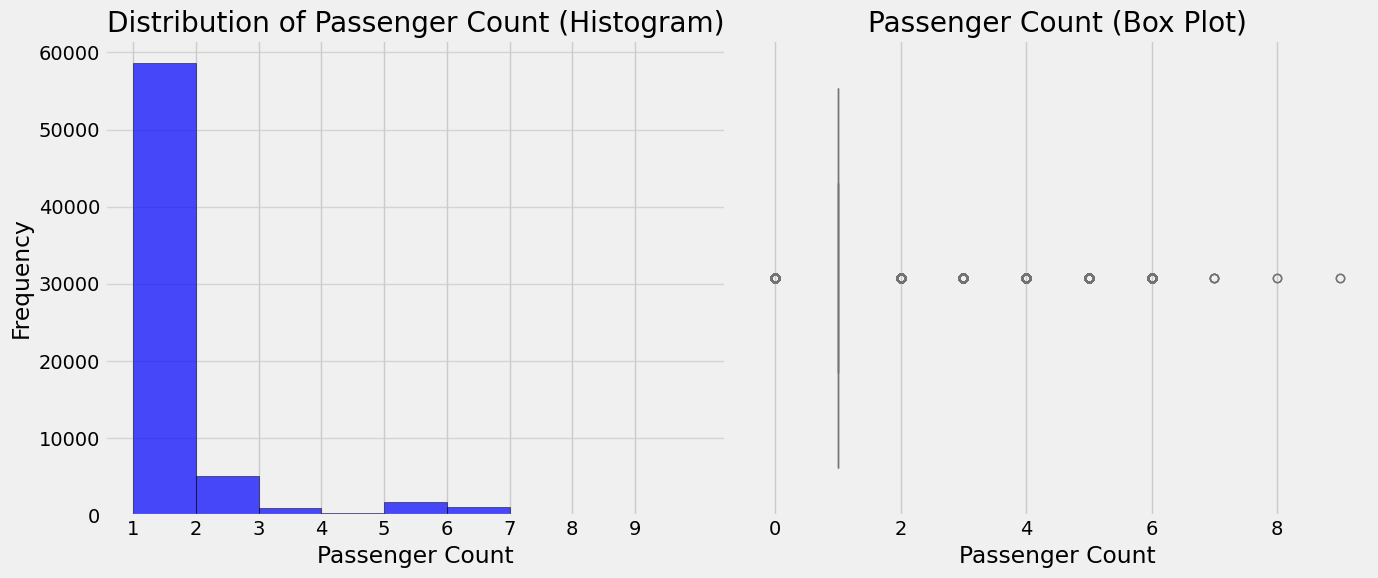

In [523]:
# Mengatur ukuran gambar
plt.figure(figsize=(14, 6))

# Histogram untuk melihat distribusi passenger_count
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df3['passenger_count'], bins=range(1, int(df3['passenger_count'].max()) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count (Histogram)')
plt.xticks(range(1, int(df3['passenger_count'].max()) + 1))
plt.grid(axis='y', alpha=0.75)  # Menambahkan grid untuk membantu visualisasi

# Box plot untuk melihat outlier dan sebaran data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df3['passenger_count'], color='lightgreen')
plt.xlabel('Passenger Count')
plt.title('Passenger Count (Box Plot)')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


In [524]:
# Cek apakah masih ada data kosong di kolom passenger_count pada df3
missing_values_count = df3['passenger_count'].isna().sum()
print(f"Jumlah data kosong di passenger_count: {missing_values_count}")


Jumlah data kosong di passenger_count: 0


`4. Missing Values ehail_fee 100.0 % =68211 row data kosong`

In [525]:
#memasukkan nilai tetap $1.25 ini sebagai komponen biaya untuk semua perjalanan e-hailing karena tidak ada perbedaan biaya antara kedua penyedia layanan tersebut.

# Ensure df3 is unchanged by creating a new copy df4
df4 = df3.copy()

# SFill missing values in 'ehail_fee' column with 1.25
df4['ehail_fee'].fillna(1.25, inplace=True)

# Save df4 to the specified path
output_path_df4 = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df4.csv'
df4.to_csv(output_path_df4, index=False)

# Display df4 to verify the changes
print("Isi df4 setelah mengisi nilai kosong pada kolom 'ehail_fee':")
df4.head()


Isi df4 setelah mengisi nilai kosong pada kolom 'ehail_fee':


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000           223           179            1.000          0.000   
3       1.000            41           238            1.000          1.300   
4       1.000            41            74            1.000          1.100   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0       14.900  1.000    0.500       4.030         0.000      1.250   
1       10.700  1.000    0.500       2.640         0.000      1.250   
2        7.200  1.000    0.500       1.940         0.000      1.250   
3        6.500  0.500    1.500       1.700         0.000      1.250   
4        6.000  0.500    1.500       0.000         0.000      1.250   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                  1.000        24.180         1.000      1.000   
1                  1.000        15.840         1.000      1.000   
2                  1.000        11.640         1.000      1.000   
3                  1.000        10.200         1.000      1.000   
4                  1.000         8.000         1.000      1.000   

   congestion_surcharge  
0                 2.750  
1                 0.000  
2                 0.000  
3                 0.000  
4                 0.000

In [526]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              68211 non-null  float64
 15  im

* `payment_type,` Metode pembayaran yang digunakan (USD).
* `1.Credit card: Kartu kredit`
* `2.Cash: Tunai`
* `3.No charge: Tidak dikenakan biaya`
* `4.Dispute: Perselisihan`
* `5.Unknown: Tidak diketahui`
* `6.Voided trip: Perjalanan dibatalkan`

`5. Missing Values payment_type 6.339 % =4324 row data kosong`


Payment Type Distribution (%):
 payment_type
1.000   63.684
2.000   35.425
3.000    0.739
4.000    0.149
5.000    0.003
Name: proportion, dtype: float64


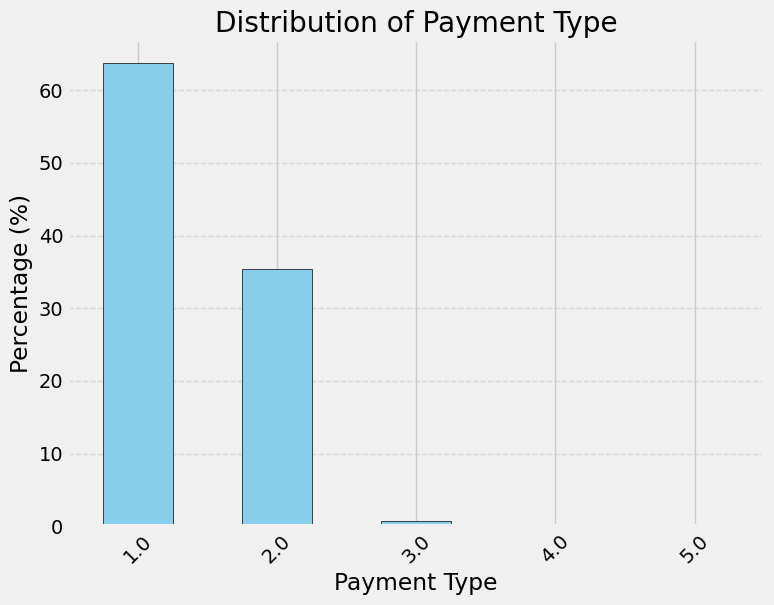

In [527]:
# Check distribution
payment_type_distribution = df4['payment_type'].value_counts(normalize=True) * 100
print("Payment Type Distribution (%):\n", payment_type_distribution)

# Visualize distribution
plt.figure(figsize=(8, 6))
payment_type_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [528]:
#Menangani data kosong pada payment_type dengan mengisikan nilai modus

# Copy df4 to df5, ensuring df4 remains unchanged
df5 = df4.copy()

# Fill missing values in 'payment_type' in df5 with the mode
mode_payment_type = df5['payment_type'].mode()[0]
df5['payment_type'].fillna(mode_payment_type, inplace=True)

# Define the file path to save the updated dataset
output_path = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df5.csv'

# Save df5 to CSV
df5.to_csv(output_path, index=False)

# Display the first few rows of df5 to confirm changes
df5.head()


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000           223           179            1.000          0.000   
3       1.000            41           238            1.000          1.300   
4       1.000            41            74            1.000          1.100   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0       14.900  1.000    0.500       4.030         0.000      1.250   
1       10.700  1.000    0.500       2.640         0.000      1.250   
2        7.200  1.000    0.500       1.940         0.000      1.250   
3        6.500  0.500    1.500       1.700         0.000      1.250   
4        6.000  0.500    1.500       0.000         0.000      1.250   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                  1.000        24.180         1.000      1.000   
1                  1.000        15.840         1.000      1.000   
2                  1.000        11.640         1.000      1.000   
3                  1.000        10.200         1.000      1.000   
4                  1.000         8.000         1.000      1.000   

   congestion_surcharge  
0                 2.750  
1                 0.000  
2                 0.000  
3                 0.000  
4                 0.000

In [529]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              68211 non-null  float64
 15  im

* `trip_type,` Menunjukkan jenis perjalanan. 
* `Type 1: Street-hail: Hail di jalan`:  penumpang menghentikan taksi di jalan
* `Type 2: Dispatch: Dispatch (penugasan otomatis)`: perjalanan ditugaskan melalui sistem dispatch

`6. Missing Values trip_type 6.354 % =4334 row data kosong`

Trip Type Distribution (%):
trip_type
1.000   97.807
2.000    2.193
Name: proportion, dtype: float64


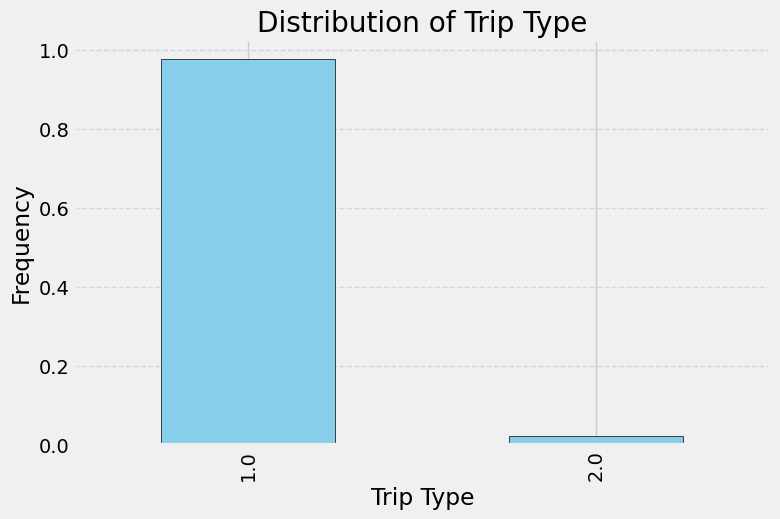

Skewness of trip_type: 6.5282683544035525
Kesimpulan: Distribusi trip_type tidak berdistribusi normal.


In [530]:
# Calculate frequency distribution for trip_type
trip_type_counts = df5['trip_type'].value_counts(normalize=True)

# Display the distribution percentages
print("Trip Type Distribution (%):")
print(trip_type_counts * 100)

# Plotting the distribution of trip_type
plt.figure(figsize=(8, 5))
trip_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate skewness to determine normality
trip_type_skewness = df5['trip_type'].skew()
print(f"Skewness of trip_type: {trip_type_skewness}")

# Conclusion based on skewness
if abs(trip_type_skewness) < 0.5:
    print("Kesimpulan: Distribusi trip_type berdistribusi normal.")
else:
    print("Kesimpulan: Distribusi trip_type tidak berdistribusi normal.")


In [531]:
# Copy df5 to df6 to ensure df5 remains unchanged
df6 = df5.copy()

# Calculate the median of trip_type
median_trip_type = df6['trip_type'].median()

# Fill missing values in trip_type with the median
df6['trip_type'].fillna(median_trip_type, inplace=True)

# Display the median value
median_trip_type, df6

# Save the updated df6 to a new CSV file
output_path_df6 = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df6.csv'
df6.to_csv(output_path_df6, index=False)


In [532]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              68211 non-null  float64
 15  im

`7. Missing Values congestion_surcharge 6.339 % =4324 row data kosong`

In [533]:
# Descriptive statistics
congestion_stats = df6['congestion_surcharge'].describe()
print(congestion_stats)

count   63887.000
mean        0.727
std         1.213
min        -2.750
25%         0.000
50%         0.000
75%         2.750
max         2.750
Name: congestion_surcharge, dtype: float64


In [534]:
from scipy.stats import shapiro

# Shapiro-Wilk test
stat, p = shapiro(df6['congestion_surcharge'].dropna())
print('Shapiro-Wilk Statistics=%.3f, p=%.3f' % (stat, p))

# Conclusion based on p-value
if p > 0.05:
    print('Data appears to be normally distributed (fail to reject H0)')
else:
    print('Data does not appear to be normally distributed (reject H0)')

Shapiro-Wilk Statistics=0.551, p=0.000
Data does not appear to be normally distributed (reject H0)


* `Karena data congestion_surcharge` tidak berdistribusi normal maka dilakukan penanganan data kosong melalui imputasi Median

In [535]:
#Karena Distribusi data trip_type tidak berdistribusi normal, maka data kosong diisikan dengan nilai median

# Copy df6 to df7 to ensure df6 remains unchanged
df7 = df6.copy()

# Fill missing values in the 'congestion_surcharge' column with the median
median_value = df7['congestion_surcharge'].median()
df7['congestion_surcharge'].fillna(median_value, inplace=True)

# Save df7 to a CSV file
file_path = 'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df7.csv'
df7.to_csv(file_path, index=False)

# Display df7
df7.head()


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000           223           179            1.000          0.000   
3       1.000            41           238            1.000          1.300   
4       1.000            41            74            1.000          1.100   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0       14.900  1.000    0.500       4.030         0.000      1.250   
1       10.700  1.000    0.500       2.640         0.000      1.250   
2        7.200  1.000    0.500       1.940         0.000      1.250   
3        6.500  0.500    1.500       1.700         0.000      1.250   
4        6.000  0.500    1.500       0.000         0.000      1.250   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                  1.000        24.180         1.000      1.000   
1                  1.000        15.840         1.000      1.000   
2                  1.000        11.640         1.000      1.000   
3                  1.000        10.200         1.000      1.000   
4                  1.000         8.000         1.000      1.000   

   congestion_surcharge  
0                 2.750  
1                 0.000  
2                 0.000  
3                 0.000  
4                 0.000

In [536]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              68211 non-null  float64
 15  im

In [537]:
#Data Summary
# Mengatur tampilan agar semua kolom ditampilkan
pd.set_option('display.max_colwidth', None)

# Data unique di tiap kolom pada df7
listItem = []
for col in df7.columns:
    listItem.append([col, df7[col].nunique(), df7[col].unique()])

# Membuat DataFrame untuk menampilkan informasi unique
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                          data=listItem)

# Menampilkan tabel
tabel1Desc


Column Name  Number of Unique  \
0                VendorID                 2   
1    lpep_pickup_datetime             66575   
2   lpep_dropoff_datetime             66519   
3      store_and_fwd_flag                 2   
4              RatecodeID                 6   
5            PULocationID               226   
6            DOLocationID               249   
7         passenger_count                10   
8           trip_distance              1870   
9             fare_amount              2553   
10                  extra                16   
11                mta_tax                 6   
12             tip_amount              1492   
13           tolls_amount                26   
14              ehail_fee                 1   
15  improvement_surcharge                 5   
16           total_amount              4670   
17           payment_type                 5   
18              trip_type                 2   
19   congestion_surcharge                 4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

# Semua data sudah tidak ada yang missing value!!

# Data Wrangling

* `Untuk memastikan input data median ini tepat pada jam-jam macet di New York, maka saya menambahkan kolom category time terlebih dahulu`

In [538]:
df7.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000           223           179            1.000          0.000   
3       1.000            41           238            1.000          1.300   
4       1.000            41            74            1.000          1.100   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0       14.900  1.000    0.500       4.030         0.000      1.250   
1       10.700  1.000    0.500       2.640         0.000      1.250   
2        7.200  1.000    0.500       1.940         0.000      1.250   
3        6.500  0.500    1.500       1.700         0.000      1.250   
4        6.000  0.500    1.500       0.000         0.000      1.250   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                  1.000        24.180         1.000      1.000   
1                  1.000        15.840         1.000      1.000   
2                  1.000        11.640         1.000      1.000   
3                  1.000        10.200         1.000      1.000   
4                  1.000         8.000         1.000      1.000   

   congestion_surcharge  
0                 2.750  
1                 0.000  
2                 0.000  
3                 0.000  
4                 0.000

# Pengecekan Kolom Bertipe Tanggal

* Kolom Tanggal hanya dapat di Ekstraksi Jika bertipe data **Datetime**
* Secara default, pandas akan membaca Kolom selain Numerik sebagai Object, sehingga perlu kita Konversi

In [539]:
# Membaca CSV dan mengonversi field lpep_pickup_datetime dan lpep_dropoff_datetime ke datetime
df7 = pd.read_csv(
    r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df7.csv',
    parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime']
)

# Menampilkan beberapa baris pertama dari df7
df7.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0       1.000           166           143            1.000          2.580   
1       1.000            24            43            1.000          1.810   
2       1.000           223           179            1.000          0.000   
3       1.000            41           238            1.000          1.300   
4       1.000            41            74            1.000          1.100   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0       14.900  1.000    0.500       4.030         0.000      1.250   
1       10.700  1.000    0.500       2.640         0.000      1.250   
2        7.200  1.000    0.500       1.940         0.000      1.250   
3        6.500  0.500    1.500       1.700         0.000      1.250   
4        6.000  0.500    1.500       0.000         0.000      1.250   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                  1.000        24.180         1.000      1.000   
1                  1.000        15.840         1.000      1.000   
2                  1.000        11.640         1.000      1.000   
3                  1.000        10.200         1.000      1.000   
4                  1.000         8.000         1.000      1.000   

   congestion_surcharge  
0                 2.750  
1                 0.000  
2                 0.000  
3                 0.000  
4                 0.000

In [540]:
df7.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

## `Proses Ekstraksi`

In [541]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [542]:
df7.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [543]:

pickup_dt = df7['lpep_pickup_datetime'].dt ## fungsi ini hanya bisa digunakan jika Kolom sudah bertipe data datetime[ns]

* Menambahkan data / `kolom baru pickup_date, pickup_time,dropoff_date, dropoff_time, Pickup_Hour dan Pickup_Day`,`Pickup Month`,`Pickup Year`

In [544]:
# Salin df7 ke df8
df8 = df7.copy()

# Mengubah format tanggal dan waktu di df8
df8['pickup_date'] = df8['lpep_pickup_datetime'].dt.strftime('%m/%d/%Y')  # Format MM/DD/YYYY
df8['pickup_time'] = df8['lpep_pickup_datetime'].dt.strftime('%H:%M')      # Format 2 digit untuk jam dan menit
df8['dropoff_date'] = df8['lpep_dropoff_datetime'].dt.strftime('%m/%d/%Y')  # Format MM/DD/YYYY
df8['dropoff_time'] = df8['lpep_dropoff_datetime'].dt.strftime('%H:%M')      # Format 2 digit untuk jam dan menit
df8['Pickup_Hour'] = df8['lpep_pickup_datetime'].dt.strftime('%H')            # Mengambil hanya jam dalam format 2 digit
df8['Pickup_Day'] = df8['lpep_pickup_datetime'].dt.day_name()                # Mengonversi ke nama hari
df8['Pickup_Month'] = df8['lpep_pickup_datetime'].dt.strftime('%m')          # Mengambil bulan dalam format 2 digit
df8['Pickup_Year'] = df8['lpep_pickup_datetime'].dt.year                     # Mengambil tahun

# Simpan df8 ke CSV
output_path_df8 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df8.csv"
df8.to_csv(output_path_df8, index=False)

# Tampilkan df8
print(df8)

print(f'Dataset df8 telah disimpan di: {output_path_df8}')


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocati

In [545]:
df7.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [546]:
df8.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year'],
      dtype='object')

* Menambahkan `kolom untuk pola_2shift dan pola_3shift`

1.Pola Shift:
* Pola 2 Shift:
* Shift Siang:Dari 6:00 AM hingga 6:00 PM.
* Shift Malam: Dari 6:00 PM hingga 6:00 AM.

2.Pola 3 Shift:
* Shift Pagi:Dari 5:00 AM hingga 1:00 PM.
* Shift Sore:Dari 1:00 PM hingga 9:00 PM.
* Shift Malam:Dari 9:00 PM hingga 5:00 AM

In [547]:
# Salin df8 ke df9
df9 = df8.copy()

# Tambahkan kolom Pickup_Hour sebagai integer
df9['Pickup_Hour'] = df9['lpep_pickup_datetime'].dt.hour.astype(int)  # Corrected column name

# Fungsi untuk menentukan pola 2 shift
def get_pola_2shift(hour):
    if 6 <= hour < 18:  # Siang
        return 'Siang'
    else:  # Malam
        return 'Malam'

# Fungsi untuk menentukan pola 3 shift
def get_pola_3shift(hour):
    if 5 <= hour < 13:  # Pagi
        return 'Pagi'
    elif 13 <= hour < 21:  # Sore
        return 'Sore'
    else:  # Malam
        return 'Malam'

# Tambahkan kolom pola_2shift dan pola_3shift
df9['pola_2shift'] = df9['Pickup_Hour'].apply(get_pola_2shift)
df9['pola_3shift'] = df9['Pickup_Hour'].apply(get_pola_3shift)

# Tampilkan hasil
result = df9[['lpep_pickup_datetime', 'Pickup_Hour', 'pola_2shift', 'pola_3shift']]
print(result)

# Simpan df9 ke CSV
output_path_df9 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df9.csv"
df9.to_csv(output_path_df9, index=False)

print(f'Dataset df9 telah disimpan di: {output_path_df9}')


      lpep_pickup_datetime  Pickup_Hour pola_2shift pola_3shift
0      2023-01-01 00:26:10            0       Malam       Malam
1      2023-01-01 00:51:03            0       Malam       Malam
2      2023-01-01 00:35:12            0       Malam       Malam
3      2023-01-01 00:13:14            0       Malam       Malam
4      2023-01-01 00:33:04            0       Malam       Malam
...                    ...          ...         ...         ...
68206  2023-01-31 22:29:00           22       Malam       Malam
68207  2023-01-31 22:40:00           22       Malam       Malam
68208  2023-01-31 23:46:00           23       Malam       Malam
68209  2023-01-31 23:01:00           23       Malam       Malam
68210  2023-01-31 23:51:00           23       Malam       Malam

[68211 rows x 4 columns]
Dataset df9 telah disimpan di: D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df9.

In [548]:
df8.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year'],
      dtype='object')

In [549]:
df9.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift'],
      dtype='object')

* Menambahkan data tambahan baru untuk `Category Time sesuai dengan kondisi Kota New York`

In [550]:
# Salin df9 ke df10
df10 = df9.copy()

# Fungsi untuk mengategorikan waktu
def categorize_time(row):
    if row['Pickup_Day'] in ['Saturday', 'Sunday']:
        if 11 <= row['Pickup_Hour'] < 15:
            return 'Rush Weekend'
        elif 15 <= row['Pickup_Hour'] < 22:
            return 'Normal Weekend'
        elif 22 <= row['Pickup_Hour'] < 3 or row['Pickup_Hour'] >= 0:  # Corrected to handle hour >= 0
            return 'Night Weekend'
    else:  # Senin sampai Jumat
        if 7 <= row['Pickup_Hour'] < 10:
            return 'Rush Morning'
        elif 10 <= row['Pickup_Hour'] < 16:
            return 'Normal'
        elif 16 <= row['Pickup_Hour'] < 19:
            return 'Rush Evening'
        elif 19 <= row['Pickup_Hour'] < 22:
            return 'Normal Evening'
        elif 22 <= row['Pickup_Hour'] < 24 or row['Pickup_Hour'] < 3:
            return 'Night Weekday'
    return 'Unknown'

# Menambahkan kolom baru 'category time' di df10
df10['category_time'] = df10.apply(categorize_time, axis=1)

# Tampilkan DataFrame yang telah diperbarui
print(df10)

# Simpan df10 ke CSV
output_path_df10 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df10.csv"
df10.to_csv(output_path_df10, index=False)

print(f'Dataset df10 telah disimpan di: {output_path_df10}')


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocati

In [551]:
df9.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift'],
      dtype='object')

In [552]:
df10.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time'],
      dtype='object')

In [553]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

* Menambahkan `kolom baru untuk mengkonversi trip_distance dalam miles ke KM menjadi ==trip_distance(KM)`

In [554]:
# Salin df10 ke df11
df11 = df10.copy()  # Ensure df10 remains unchanged

# Konversi trip_distance dari Miles ke Kilometers dan buat kolom baru 'trip_duration(Km)'
df11['trip_distance(Km)'] = (df11['trip_distance'] * 1.6093).round(2)

# Tampilkan DataFrame yang telah diperbarui
print(df11)

# Simpan df11 ke CSV
output_path_df11 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df11.csv"
df11.to_csv(output_path_df11, index=False)

print(f'Dataset df11 telah disimpan di: {output_path_df11}')


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocati

In [555]:
df10.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time'],
      dtype='object')

In [556]:
df11.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)'],
      dtype='object')

* Menambahkan data baru `Trip Duration (hrs)`
* `Nilai Trip_Duration= dropoff_time - pickup_time`

In [557]:
# Salin df11 ke df12
df12 = df11.copy()  # Ensure df11 remains unchanged

# Buat fungsi untuk menghitung durasi
def calculate_trip_duration(row):
    pickup_dt = row['lpep_pickup_datetime']
    dropoff_dt = row['lpep_dropoff_datetime']
    
    # Menghitung selisih waktu
    duration = dropoff_dt - pickup_dt
    
    # Mengonversi durasi ke jam dan menit
    hours = duration.total_seconds() / 3600  # Total seconds to hours
    minutes = duration.total_seconds() / 60   # Total seconds to minutes
    
    return pd.Series([round(hours, 2), round(minutes, 2)])

# Terapkan fungsi untuk membuat kolom baru
df12[['trip_duration(Hrs)', 'trip_duration(Min)']] = df12.apply(calculate_trip_duration, axis=1)

# Tampilkan DataFrame yang telah diperbarui
print(df12)

# Simpan df12 ke CSV
output_path_df12 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df12.csv"
df12.to_csv(output_path_df12, index=False)

print(f'Dataset df12 telah disimpan di: {output_path_df12}')


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocati

In [558]:
df11.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)'],
      dtype='object')

In [559]:
df12.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)'],
      dtype='object')

* Menambahkan data baru `speed(Kph)`

In [560]:
# Salin df12 ke df13
df13 = df12.copy()  # Ensure df12 remains unchanged

# Hitung kecepatan (speed) dalam Kph
# Menambahkan kolom speed (Kph)
df13['speed(Kph)'] = df13['trip_distance(Km)'] / df13['trip_duration(Hrs)']

# Format speed(Kph) to 2 decimal places
df13['speed(Kph)'] = df13['speed(Kph)'].round(2)

# Mengganti VendorID dengan vendor_name
vendor_mapping = {
    1: 'Creative Mobile Technologies',
    2: 'VeriFone Inc'
}

# Tambahkan kolom vendor_name dengan menggunakan mapping
df13['vendor_name'] = df13['VendorID'].map(vendor_mapping)

# Tampilkan DataFrame yang telah diperbarui
print(df13)

# Simpan df13 ke CSV
output_path_df13 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df13.csv"
df13.to_csv(output_path_df13, index=False)

print(f'Dataset df13 telah disimpan di: {output_path_df13}')


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocati

In [561]:
df12.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)'],
      dtype='object')

In [562]:
df13.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)',
       'vendor_name'],
      dtype='object')

In [563]:
df13.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)',
       'vendor_name'],
      dtype='object')

* Menambahkan data baru `Trip Duration (hrs)`

* Average Fuel Consumption: Data dari TLC menunjukkan bahwa taksi NYC umumnya menggunakan sekitar 8 hingga 12 liter per 100 kilometer. Namun, angka ini bisa bervariasi tergantung jenis kendaraan dan kondisi jalan.

* Fuel Price per Liter: Menurut EIA, harga bahan bakar di NYC pada Januari 2023 berkisar sekitar $1.05 per liter, meskipun ini bisa dipengaruhi oleh fluktuasi pasar dan faktor lainnya.

* Maintenance Cost per Kilometer: Informasi terkait biaya pemeliharaan untuk kendaraan taksi dapat bervariasi, tetapi rata-rata diperkirakan sekitar $0.10 hingga $0.20 per kilometer.

sumber : TLC Reports, EIA Data, AAA Fuel Cost

* Nilai Acuan (Average):
----------------------
* Average Fuel Consumption: 10 km/liter
* Fuel Price per Liter: $1.00 (sekitar)
* Maintenance Cost per Kilometer: $0.15

In [564]:
df13.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)',
       'vendor_name'],
      dtype='object')

* Menambahkan kolom  `pendapatan_per_trip`, `fuel_cost_per_trip`,`maintenance_cost_per_trip`, `fixed_costs_per_trip`, `total_costs_per_trip`,  `laba_bersih_per_trip`

-----------------------------------------------------------------
* `pendapatan_per_trip` ='fare_amount'+'extra'+'mta_tax'+
       'tip_amount'+ 'tolls_amount'+ 'ehail_fee'+ 'improvement_surcharge'+
       'congestion_surcharge'
* `Asumsi:`
* avg_fuel_consumption =10 km/liter
* fuel_price_per_liter = $1.00 
* maintenance_cost_per_km = $0.15

* `fuel_cost_per_trip` = trip_distance(Km) * avg_fuel_consumption * fuel_price_per_liter

* `maintenance_cost_per_trip` = trip_distance * maintenance_cost_per_km

* `fixed_costs_per_trip`=0.5 USD/trip

* `total_costs_per_trip` =fuel_cost_per_trip + maintenance_cost_per_trip + fixed_costs_per_trip

* `laba_bersih_per_trip` = pendapatan_per_trip - total_costs_per_trip




In [565]:
# Salin df13 ke df14 untuk memastikan data df13 tidak berubah
df14 = df13.copy()

# 1. Hitung pendapatan_per_trip
df14['pendapatan_per_trip'] = (
    df14['fare_amount'] + 
    df14['extra'] + 
    df14['mta_tax'] + 
    df14['tip_amount'] + 
    df14['tolls_amount'] + 
    df14.get('ehail_fee', 0) +  # Using get() in case 'ehail_fee' does not exist
    df14['improvement_surcharge'] + 
    df14['congestion_surcharge']
).round(2)

# Asumsi perhitungan
avg_fuel_consumption = 10  # km per liter
fuel_price_per_liter = 1.00  # USD per liter
maintenance_cost_per_km = 0.15  # USD per km
fixed_costs_per_trip = 0.5  # USD per trip

# 2. Hitung fuel_cost_per_trip
df14['fuel_cost_per_trip'] = ((df14['trip_distance(Km)'] / avg_fuel_consumption) * fuel_price_per_liter).round(2)

# 3. Hitung maintenance_cost_per_trip
df14['maintenance_cost_per_trip'] = (df14['trip_distance(Km)'] * maintenance_cost_per_km).round(2)

# 4. Tambahkan kolom fixed_costs_per_trip
df14['fixed_costs_per_trip'] = fixed_costs_per_trip

# 5. Hitung total_costs_per_trip
df14['total_costs_per_trip'] = (
    df14['fuel_cost_per_trip'] + 
    df14['maintenance_cost_per_trip'] + 
    df14['fixed_costs_per_trip']
).round(2)

# 6. Hitung laba_bersih_per_trip
df14['laba_bersih_per_trip'] = (df14['pendapatan_per_trip'] - df14['total_costs_per_trip']).round(2)

# Tampilkan DataFrame yang telah diperbarui
print(df14)

# Simpan df14 ke CSV
output_path_df14 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df14.csv"
df14.to_csv(output_path_df14, index=False)

print(f'Dataset df14 telah disimpan di: {output_path_df14}')


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocati

In [566]:
df13.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)',
       'vendor_name'],
      dtype='object')

In [567]:
df14.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'Pickup_Hour', 'Pickup_Day', 'Pickup_Month', 'Pickup_Year',
       'pola_2shift', 'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)', 'vendor_name',
       'pendapatan_per_trip', 'fuel_cost_per_trip',
       'maintenance_cost_per_trip', 'fixed_costs_per_trip',
       'total_costs_per_trip', 'laba_bersih_per_trip'],
      dtype='object')

In [568]:
df14

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                  N   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1.000           166           143            1.000          2.580   
1           1.000            24            43            1.000          1.810   
2           1.000           223           179            1.000          0.000   
3           1.000            41           238            1.000          1.300   
4           1.000            41            74            1.000          1.100   
...           ...           ...           ...              ...            ...   
68206       1.000            49            62            1.000       4070.820   
68207       1.000            10           205            1.000          2.140   
68208       1.000            66            37            1.000          3.440   
68209       1.000           225           189            1.000          3.030   
68210       1.000           256           140            1.000          5.820   

       fare_amount  ...  trip_duration(Hrs)  trip_duration(Min)  speed(Kph)  \
0           14.900  ...               0.180              11.020      23.060   
1           10.700  ...               0.110               6.770      26.450   
2            7.200  ...               0.110               6.330       0.000   
3            6.500  ...               0.100               5.820      20.900   
4            6.000  ...               0.100               5.970      17.700   
...            ...  ...                 ...                 ...         ...   
68206       15.700  ...               0.220              13.000   29778.050   
68207        4.410  ...               0.130               8.000      26.460   
68208       16.530  ...               0.270              16.000      20.520   
68209       14.980  ...               0.300              18.000      16.270   
68210       23.650  ...               0.270              16.000      34.700   

                        vendor_name  pendapatan_per_trip  fuel_cost_per_trip  \
0                      VeriFone Inc               25.430               0.420   
1                      VeriFone Inc               17.090               0.290   
2                      VeriFone Inc               12.890               0.000   
3      Creative Mobile Technologies               12.450               0.210   
4      Creative Mobile Technologies               10.250               0.180   
...                             ...                  ...                 ...   
68206                  VeriFone Inc               17.950             655.120   
68207                  VeriFone Inc                6.660               0.340   
68208                  VeriFone Inc               22.290               0.550   
68209                  VeriFone Inc               20.430               0.490   
68210                  VeriFone Inc               27.900               0.940   

       maintenance_cost_per_trip  fixed_costs_per_trip  total_costs_per_trip  \
0                          0.620                 0.500                 

## Cek Outliers

* (1). Anomali row data `Passenger Count >0, trip_duration =0, trip_distance(Kph)=0` ada 774 row data = 1.135%. Sehingga anomali ini di drop dari data frame.

In [569]:
df14.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VendorID                   68211 non-null  int64         
 1   lpep_pickup_datetime       68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime      68211 non-null  datetime64[ns]
 3   store_and_fwd_flag         68211 non-null  object        
 4   RatecodeID                 68211 non-null  float64       
 5   PULocationID               68211 non-null  int64         
 6   DOLocationID               68211 non-null  int64         
 7   passenger_count            68211 non-null  float64       
 8   trip_distance              68211 non-null  float64       
 9   fare_amount                68211 non-null  float64       
 10  extra                      68211 non-null  float64       
 11  mta_tax                    68211 non-null  float64       
 12  tip_

In [570]:
# Menghitung jumlah row yang terdeteksi berdasarkan kondisi yang diberikan
# Menentukan kondisi untuk tampikan data
condition = (df14['passenger_count'] > 0) & (df14['trip_distance(Km)'] == 0) & (df14['trip_duration(Hrs)'] == 0)

# Mengambil data yang memenuhi kondisi
detected_outliers = df14[condition]

# Menghitung jumlah row dan persentase
detected_count = len(detected_outliers)
total_count = len(df14)
percentage = (detected_count / total_count) * 100

detected_count, round(percentage, 2)


(774, 1.13)

In [571]:
detected_outliers

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
115           2  2023-01-01 01:52:58   2023-01-01 01:53:00                  N   
166           2  2023-01-01 02:37:12   2023-01-01 02:37:15                  N   
173           2  2023-01-01 02:37:12   2023-01-01 02:37:15                  N   
186           2  2023-01-01 03:01:54   2023-01-01 03:01:56                  N   
193           2  2023-01-01 02:38:02   2023-01-01 02:38:04                  N   
...         ...                  ...                   ...                ...   
63756         2  2023-01-31 21:56:14   2023-01-31 21:56:16                  N   
64190         1  2023-01-03 09:27:55   2023-01-03 09:28:12                  N   
65254         1  2023-01-11 11:25:38   2023-01-11 11:25:40                  N   
65611         2  2023-01-13 16:24:00   2023-01-13 16:24:00                  N   
66955         2  2023-01-23 04:49:00   2023-01-23 04:49:00                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
115         1.000           264           264            1.000          0.000   
166         5.000            51           264            3.000          0.000   
173         5.000           260           264            1.000          0.000   
186         5.000           129           264            1.000          0.000   
193         5.000            70            70            1.000          0.000   
...           ...           ...           ...              ...            ...   
63756       5.000            97           264            1.000          0.000   
64190       1.000           164           164            1.000          0.000   
65254       1.000           166           166            1.000          0.000   
65611       1.000            74            74            1.000          0.000   
66955       1.000            83            83            1.000          0.000   

       fare_amount  ...  trip_duration(Hrs)  trip_duration(Min)  speed(Kph)  \
115          3.000  ...               0.000               0.030         NaN   
166         40.000  ...               0.000               0.050         NaN   
173         20.000  ...               0.000               0.050         NaN   
186         12.000  ...               0.000               0.030         NaN   
193         25.000  ...               0.000               0.030         NaN   
...            ...  ...                 ...                 ...         ...   
63756       12.000  ...               0.000               0.030         NaN   
64190       30.360  ...               0.000               0.280         NaN   
65254       27.310  ...               0.000               0.030         NaN   
65611       16.030  ...               0.000               0.000         NaN   
66955       12.020  ...               0.000               0.000         NaN   

                        vendor_name  pendapatan_per_trip  fuel_cost_per_trip  \
115                    VeriFone Inc               27.550               0.000   
166                    VeriFone Inc               42.250               0.000   
173                    VeriFone Inc               26.450               0.000   
186                    VeriFone Inc               14.250               0.000   
193                    VeriFone Inc               27.250               0.000   
...                             ...                  ...                 ...   
63756                  VeriFone Inc               14.250               0.000   
64190  Creative Mobile Technologies               33.110               0.000   
65254  Creative Mobile Technologies               30.060               0.000   
65611                  VeriFone Inc               21.690               0.000   
66955                  VeriFone Inc               14.270               0.000   

       maintenance_cost_per_trip  fixed_costs_per_trip  total_costs_per_trip  \
115                        0.000                 0.500                 

* `Setelah dilakukan pengecekan terdapat 774 row data yang anomali setara 1.13% dari jumlah data df14`. Outlier ini harus ditangani karena akan membuat "bias data".

In [572]:
# Salin df14 ke df15 untuk memastikan data df14 tidak ada perubahan data
df15 = df14.copy()

# Menentukan kondisi untuk deteksi anomali
condition = (df15['passenger_count'] > 0) & (df15['trip_duration(Hrs)'] == 0) & (df15['trip_distance(Km)'] == 0)

# Menghitung jumlah row yang terdeteksi berdasarkan kondisi anomali
detected_count = len(df15[condition])

# Melakukan drop data anomali dari df15
df15 = df15[~condition]  # Assign the cleaned data back to df15

# Menyimpan dataset baru ke dalam file CSV
output_path_df15 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df15.csv"
df15.to_csv(output_path_df15, index=False)

detected_count, output_path_df15


(774,
 'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df15.csv')

In [573]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67437 entries, 0 to 68210
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VendorID                   67437 non-null  int64         
 1   lpep_pickup_datetime       67437 non-null  datetime64[ns]
 2   lpep_dropoff_datetime      67437 non-null  datetime64[ns]
 3   store_and_fwd_flag         67437 non-null  object        
 4   RatecodeID                 67437 non-null  float64       
 5   PULocationID               67437 non-null  int64         
 6   DOLocationID               67437 non-null  int64         
 7   passenger_count            67437 non-null  float64       
 8   trip_distance              67437 non-null  float64       
 9   fare_amount                67437 non-null  float64       
 10  extra                      67437 non-null  float64       
 11  mta_tax                    67437 non-null  float64       
 12  tip_amoun

* Setelah proses drop dataset reduce dari 68211 row ke 67437 row

# Data Wrangling : Perbaikan tipe data Pickup_Date dan Dropoff_Date ke tipe datetime
`lpep_pickup_datetime', 'lpep_dropoff_datetime','pickup_date', 'dropoff_date'` sudah bertipe data datetime

In [574]:
import pandas as pd

# Membaca dataset dan mengonversi kolom tanggal
df15 = pd.read_csv(
    r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df15.csv',
    index_col=0,
    parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_date', 'dropoff_date']
)

# Mengubah passenger_count menjadi integer
df15['passenger_count'] = df15['passenger_count'].astype(int)

# Menampilkan beberapa baris pertama dari DataFrame
print(df15.head())


         lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              1.000           166           143                1   
2              1.000            24            43                1   
2              1.000           223           179                1   
1              1.000            41           238                1   
1              1.000            41            74                1  

In [575]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67437 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       67437 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      67437 non-null  datetime64[ns]
 2   store_and_fwd_flag         67437 non-null  object        
 3   RatecodeID                 67437 non-null  float64       
 4   PULocationID               67437 non-null  int64         
 5   DOLocationID               67437 non-null  int64         
 6   passenger_count            67437 non-null  int64         
 7   trip_distance              67437 non-null  float64       
 8   fare_amount                67437 non-null  float64       
 9   extra                      67437 non-null  float64       
 10  mta_tax                    67437 non-null  float64       
 11  tip_amount                 67437 non-null  float64       
 12  tolls_amount 

* Cek anomali pada passenger_count


In [576]:
# Cek kolom yang ada di df15
print(df15.columns)

# Membuat pivot table untuk menghitung jumlah passenger_count berdasarkan vendor_name
result = df15.pivot_table(
    index='vendor_name',  # Indeks untuk baris
    columns='passenger_count',  # Kolom untuk passenger count
    values='fare_amount',  # Ganti 'id' dengan kolom yang tepat jika ada
    aggfunc='count',  # Fungsi agregasi untuk menghitung jumlah perjalanan
    fill_value=0  # Mengisi NaN dengan 0
)

# Menambahkan Grand Total untuk setiap vendor
result['Grand Total'] = result.sum(axis=1)

# Menampilkan hasil pivot table
print("Pivot table jumlah passenger_count per vendor")
print(result)


Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_date',
       'pickup_time', 'dropoff_date', 'dropoff_time', 'Pickup_Hour',
       'Pickup_Day', 'Pickup_Month', 'Pickup_Year', 'pola_2shift',
       'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)', 'vendor_name',
       'pendapatan_per_trip', 'fuel_cost_per_trip',
       'maintenance_cost_per_trip', 'fixed_costs_per_trip',
       'total_costs_per_trip', 'laba_bersih_per_trip'],
      dtype='object')
Pivot table jumlah passenger_count per vendor
passenger_count                 0      1     2    3    4     5     6  7  8  \
vendor_name                        

* Menampilkan data yang penumpang 0, penumpang 7 dan penumpang 8

In [577]:
# Menampilkan data penumpang dengan passenger_count 0, 7, dan 8
passenger_counts_to_display = df15[df15['passenger_count'].isin([0, 7, 8])]
passenger_counts_to_display


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 01:27:36   2023-01-01 01:27:43                  N   
1         2023-01-01 04:21:35   2023-01-01 04:30:00                  N   
1         2023-01-01 11:42:13   2023-01-01 11:49:21                  N   
1         2023-01-01 12:11:05   2023-01-01 12:20:45                  N   
1         2023-01-01 12:56:11   2023-01-01 13:01:06                  N   
...                       ...                   ...                ...   
1         2023-01-31 18:27:02   2023-01-31 18:27:08                  N   
1         2023-01-31 18:01:21   2023-01-31 18:09:22                  N   
1         2023-01-31 18:07:39   2023-01-31 18:07:55                  N   
1         2023-01-31 18:32:09   2023-01-31 18:32:33                  N   
1         2023-01-31 18:36:10   2023-01-31 18:36:48                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              5.000           168           168                0   
1              1.000           129           129                0   
1              1.000           260           260                0   
1              1.000            42           127                0   
1              1.000            75           236                0   
...              ...           ...           ...              ...   
1              1.000           145           145                0   
1              1.000           236           236                0   
1              1.000           260           260                0   
1              1.000           145           145                0   
1              1.000           145           145                0   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 0.000       20.000  0.000  ...               0.000   
1                 1.300        8.000  0.500  ...               0.140   
1                 1.200        8.600  0.000  ...               0.120   
1                 3.400       16.300  0.000  ...               0.160   
1                 1.200        7.200  2.750  ...               0.080   
...                 ...          ...    ...  ...                 ...   
1                 0.000        3.000  2.500  ...               0.000   
1                 1.000        9.300  5.250  ...               0.130   
1                 0.100        3.000  2.500  ...               0.000   
1                 0.000        3.000  2.500  ...               0.010   
1                 0.000        3.000  2.500  ...               0.010   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                      0.120         NaN                  VeriFone Inc   
1                      8.420      14.930  Creative Mobile Technologies   
1                      7.130      16.080  Creative Mobile Technologies   
1                      9.670      34.190  Creative Mobile Technologies   
1                      4.920      24.120  Creative Mobile Technologies   
...                      ...         ...                           ...   
1                      0.100         NaN  Creative Mobile Technologies   
1                      8.020      12.380  Creative Mobile Technologies   
1                      0.270         inf  Creative Mobile Technologies   
1                      0.400       0.000  Creative Mobile Technologies   
1                      0.630       0.000  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      22.250               0.000                      0.000   
1       

* `(2) Outliers treatment untuk passenger_count 0,7, dan 8`

In [578]:
# Membuat salinan df15 untuk df16
df16 = df15.copy()

# Menangani outlier passenger_count = 0, 7, dan 8
# Menghapus baris dengan passenger_count yang tidak wajar
df16 = df16[~df16['passenger_count'].isin([0, 7, 8])]

# Menyimpan df16 ke file CSV
output_path = r'D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df16.csv'
df16.to_csv(output_path)

# Menampilkan df16
df16.head()


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              1.000           166           143                1   
2              1.000            24            43                1   
2              1.000           223           179                1   
1              1.000            41           238                1   
1              1.000            41            74                1   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 2.580       14.900  1.000  ...               0.180   
2                 1.810       10.700  1.000  ...               0.110   
2                 0.000        7.200  1.000  ...               0.110   
1                 1.300        6.500  0.500  ...               0.100   
1                 1.100        6.000  0.500  ...               0.100   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                     11.020      23.060                  VeriFone Inc   
2                      6.770      26.450                  VeriFone Inc   
2                      6.330       0.000                  VeriFone Inc   
1                      5.820      20.900  Creative Mobile Technologies   
1                      5.970      17.700  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      25.430               0.420                      0.620   
2                      17.090               0.290                      0.440   
2                      12.890               0.000                      0.000   
1                      12.450               0.210                      0.310   
1                      10.250               0.180                      0.270   

          fixed_costs_per_trip  total_costs_per_trip laba_bersih_per_trip  
VendorID                                                                   
2                        0.500                 1.540               23.890  
2                        0.500                 1.230               15.860  
2                        0.500                 0.500               12.390  
1                        0.500                 1.020               11.430  
1                        0.500                 0.950                9.300  

[5 rows x 41 columns]

In [579]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67098 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       67098 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      67098 non-null  datetime64[ns]
 2   store_and_fwd_flag         67098 non-null  object        
 3   RatecodeID                 67098 non-null  float64       
 4   PULocationID               67098 non-null  int64         
 5   DOLocationID               67098 non-null  int64         
 6   passenger_count            67098 non-null  int64         
 7   trip_distance              67098 non-null  float64       
 8   fare_amount                67098 non-null  float64       
 9   extra                      67098 non-null  float64       
 10  mta_tax                    67098 non-null  float64       
 11  tip_amount                 67098 non-null  float64       
 12  tolls_amount 

In [580]:
# Statistical summary
df16.describe().transpose()

count                           mean  \
lpep_pickup_datetime          67098  2023-01-16 20:25:54.972443392   
lpep_dropoff_datetime         67098  2023-01-16 20:44:15.195296256   
RatecodeID                67098.000                          1.086   
PULocationID              67098.000                         97.934   
DOLocationID              67098.000                        138.062   
passenger_count           67098.000                          1.302   
trip_distance             67098.000                          8.237   
fare_amount               67098.000                         16.604   
extra                     67098.000                          0.830   
mta_tax                   67098.000                          0.588   
tip_amount                67098.000                          2.145   
tolls_amount              67098.000                          0.171   
ehail_fee                 67098.000                          1.250   
improvement_surcharge     67098.000                          0.953   
total_amount              67098.000                         21.817   
payment_type              67098.000                          1.348   
trip_type                 67098.000                          1.015   
congestion_surcharge      67098.000                          0.689   
pickup_date                   67098  2023-01-16 06:06:35.958150656   
dropoff_date                  67098  2023-01-16 06:17:46.833586688   
Pickup_Hour               67098.000                         13.823   
Pickup_Month              67098.000                          1.000   
Pickup_Year               67098.000                       2023.000   
trip_distance(Km)         67098.000                         13.256   
trip_duration(Hrs)        67098.000                          0.306   
trip_duration(Min)        67098.000                         18.337   
speed(Kph)                67098.000                            inf   
pendapatan_per_trip       67098.000                         23.230   
fuel_cost_per_trip        67098.000                          1.326   
maintenance_cost_per_trip 67098.000                          1.988   
fixed_costs_per_trip      67098.000                          0.500   
total_costs_per_trip      67098.000                          3.814   
laba_bersih_per_trip      67098.000                         19.416   

                                           min                            25%  \
lpep_pickup_datetime       2009-01-01 20:21:27     2023-01-09 12:24:05.500000   
lpep_dropoff_datetime      2009-01-02 11:07:31  2023-01-09 12:39:53.750000128   
RatecodeID                               1.000                          1.000   
PULocationID                             3.000                         74.000   
DOLocationID                             1.000                         74.000   
passenger_count                          1.000                          1.000   
trip_distance                            0.000                          1.140   
fare_amount                            -70.000                          9.300   
extra                                   -2.500                          0.000   
mta_tax                                 -0.500                          0.500   
tip_amount                              -0.900                          0.000   
tolls_amount                             0.000                          0.000   
ehail_fee                                1.250                          1.250   
improvement_surcharge                   -1.000                          1.000   
total_amount                           -71.500                         12.960   
payment_type                             1.000                          1.000   
trip_type                                1.000                          1.000   
congestion_surcharge                    -2.750                          0.000   
pickup_date                2009-01-01 00:00:00            2023-01-09 00:00:00   
dropoff_date               20

In [581]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67098 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       67098 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      67098 non-null  datetime64[ns]
 2   store_and_fwd_flag         67098 non-null  object        
 3   RatecodeID                 67098 non-null  float64       
 4   PULocationID               67098 non-null  int64         
 5   DOLocationID               67098 non-null  int64         
 6   passenger_count            67098 non-null  int64         
 7   trip_distance              67098 non-null  float64       
 8   fare_amount                67098 non-null  float64       
 9   extra                      67098 non-null  float64       
 10  mta_tax                    67098 non-null  float64       
 11  tip_amount                 67098 non-null  float64       
 12  tolls_amount 

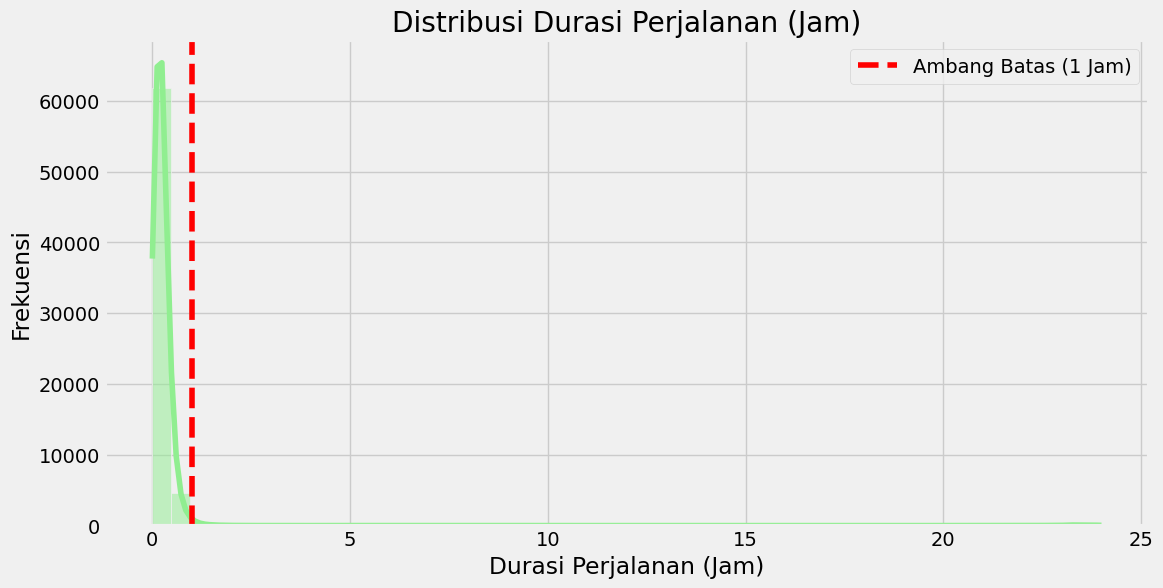

In [582]:
# Pastikan df16 sudah ada dan kolom trip_duration(Hrs) ada
if 'df16' in locals() and 'trip_duration(Hrs)' in df16.columns:
    # Visualisasi distribusi trip_duration(Hrs)
    plt.figure(figsize=(12, 6))
    sns.histplot(df16['trip_duration(Hrs)'], bins=50, kde=True, color='lightgreen')
    
    plt.title('Distribusi Durasi Perjalanan (Jam)')
    plt.xlabel('Durasi Perjalanan (Jam)')
    plt.ylabel('Frekuensi')
    
    plt.axvline(1, color='red', linestyle='--', label='Ambang Batas (1 Jam)')  # 1 jam sebagai ambang batas
    plt.legend()
    plt.grid(True)
    
    plt.show()
else:
    print("DataFrame df16 tidak ditemukan atau kolom 'trip_duration(Hrs)' tidak ada.")


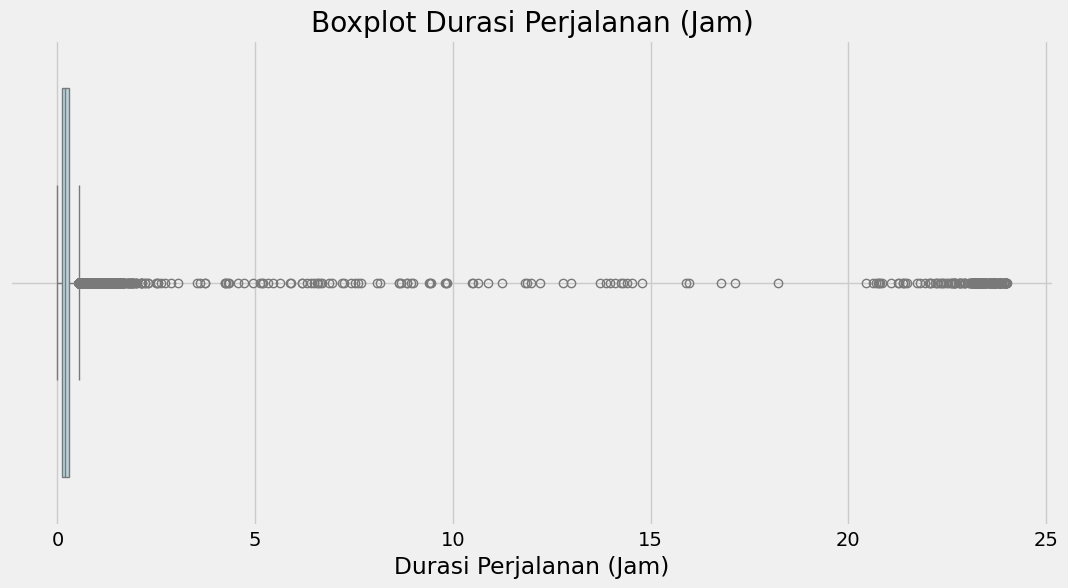

In [583]:
# Pastikan df16 sudah ada dan kolom trip_duration(Hrs) ada
if 'df16' in locals() and 'trip_duration(Hrs)' in df16.columns:
    # Visualisasi boxplot untuk trip_duration(Hrs)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df16['trip_duration(Hrs)'], color='lightblue')
    
    plt.title('Boxplot Durasi Perjalanan (Jam)')
    plt.xlabel('Durasi Perjalanan (Jam)')
    plt.grid(True)
    
    plt.show()
else:
    print("DataFrame df16 tidak ditemukan atau kolom 'trip_duration(Hrs)' tidak ada.")


In [584]:
# Hitung Q1, Q3, dan IQR
Q1 = df16['trip_duration(Hrs)'].quantile(0.25)
Q3 = df16['trip_duration(Hrs)'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan outliers
outliers = df16[(df16['trip_duration(Hrs)'] < lower_bound) | (df16['trip_duration(Hrs)'] > upper_bound)]

# Hitung jumlah dan persentase outliers
num_outliers = outliers.shape[0]
total_data = df16.shape[0]
percentage_outliers = (num_outliers / total_data) * 100

# Tampilkan hasil
print(f"Jumlah data outlier: {num_outliers}")
print(f"Persentase outlier: {percentage_outliers:.2f}%")


Jumlah data outlier: 3593
Persentase outlier: 5.35%


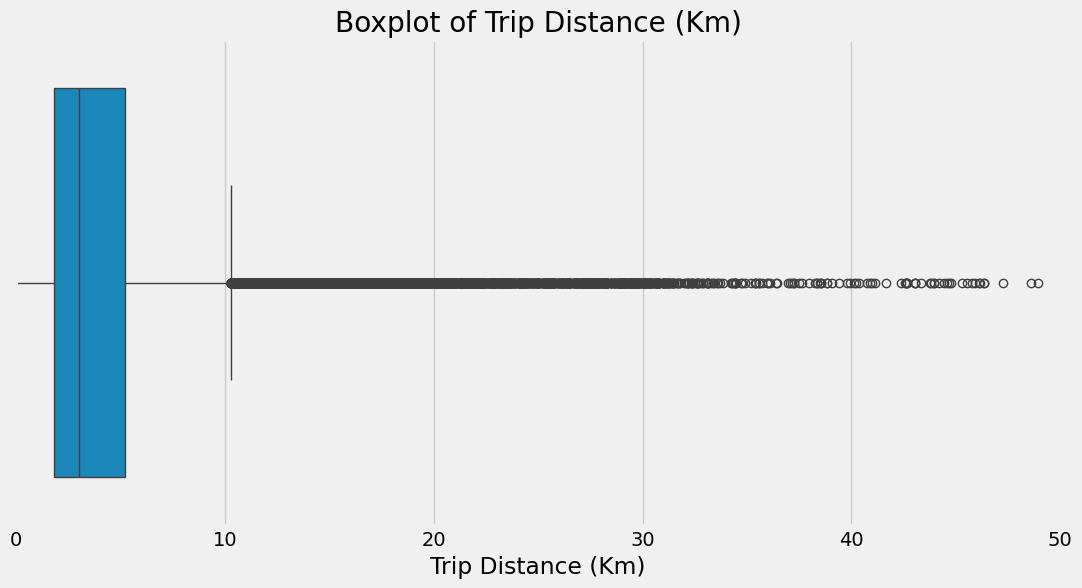

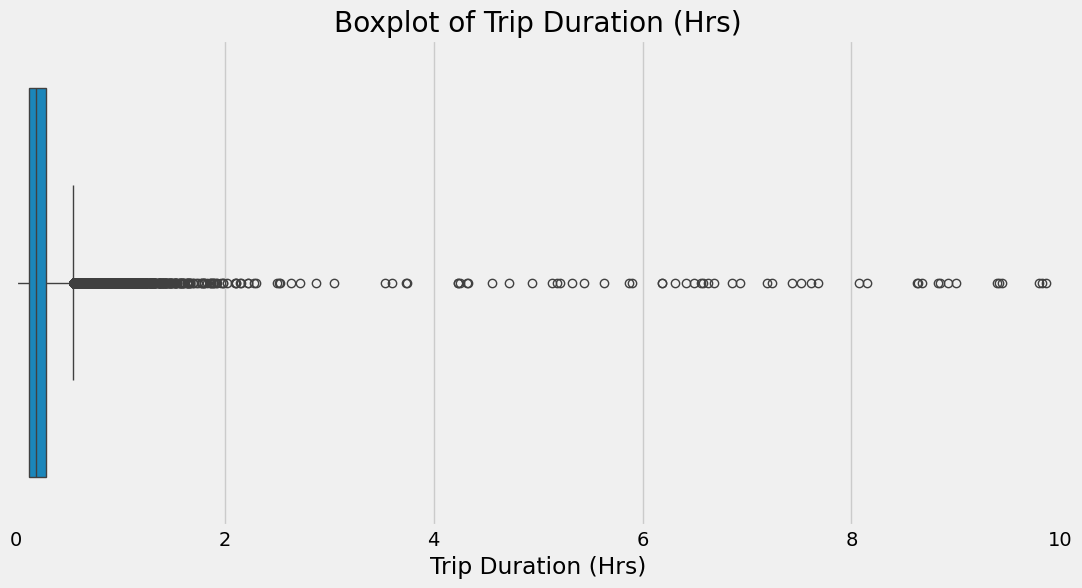

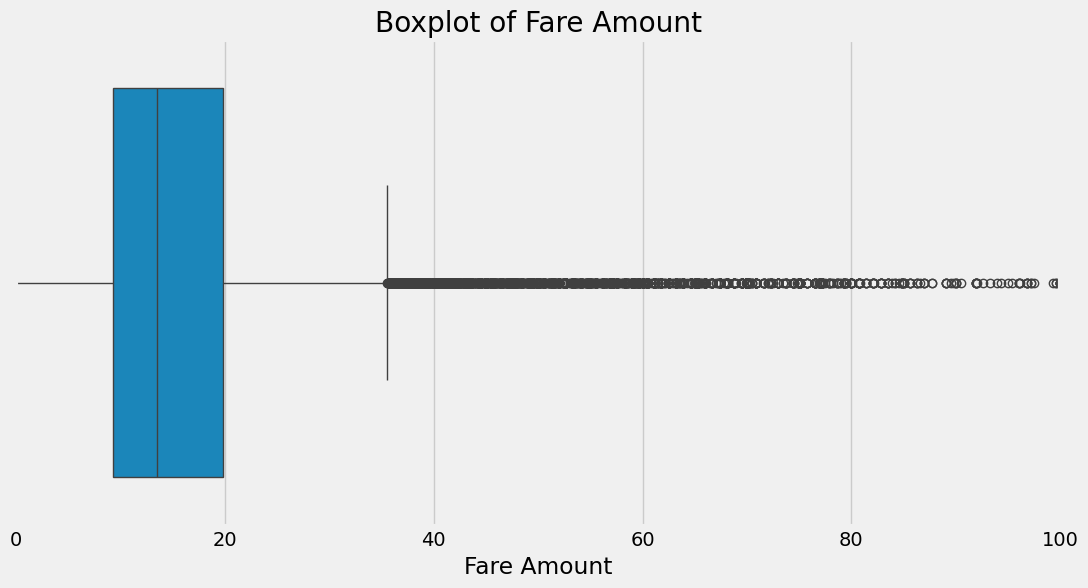

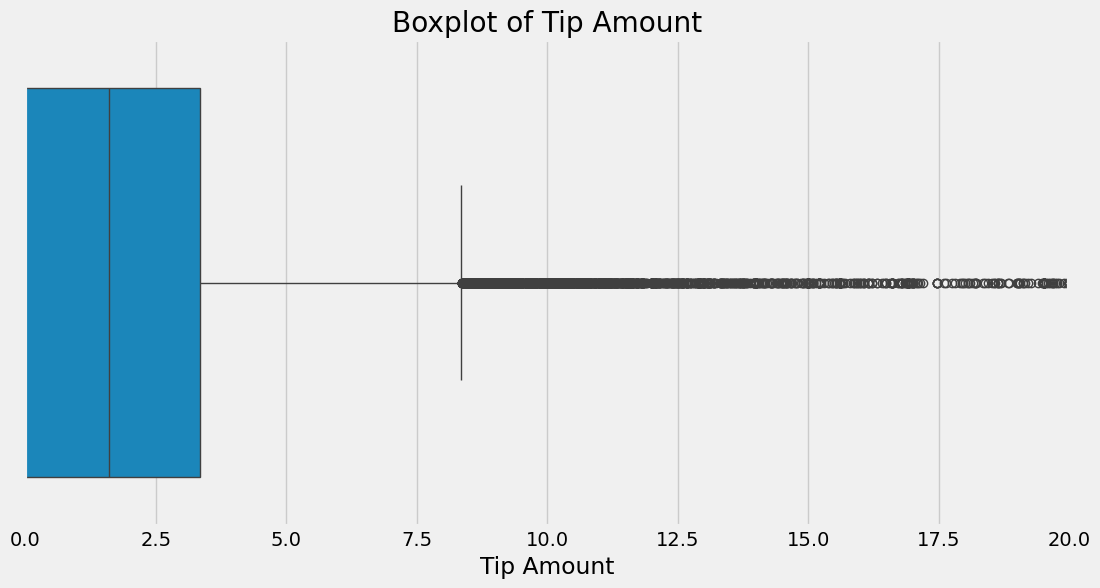

In [585]:
# Visualisasi Trip Distance
plt.figure(figsize=(12, 6))
sns.boxplot(x=df16['trip_distance(Km)'])
plt.title('Boxplot of Trip Distance (Km)')
plt.xlabel('Trip Distance (Km)')
plt.xlim(0, 50)  # Sesuaikan batasan sumbu x sesuai dengan data Anda
plt.show()

# Visualisasi Trip Duration (Hrs)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df16['trip_duration(Hrs)'])
plt.title('Boxplot of Trip Duration (Hrs)')
plt.xlabel('Trip Duration (Hrs)')
plt.xlim(0, 10)  # Sesuaikan batasan sumbu x sesuai dengan data Anda
plt.show()

# Visualisasi Fare Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x=df16['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.xlabel('Fare Amount')
plt.xlim(0, 100)  # Sesuaikan batasan sumbu x sesuai dengan data Anda
plt.show()

# Visualisasi Tip Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x=df16['tip_amount'])
plt.title('Boxplot of Tip Amount')
plt.xlabel('Tip Amount')
plt.xlim(0, 20)  # Sesuaikan batasan sumbu x sesuai dengan data Anda
plt.show()



In [586]:
# Total data
total_data = len(df16)

# Pengecekan anomali
anomali_checks = {
    "Trip Distance": {
        "condition": df16['trip_distance(Km)'] > 100,  # Memeriksa jika trip_distance lebih dari 100 km
    },
    "Trip Duration (Hrs)": {
        "condition": (df16['trip_duration(Hrs)'] > 24) | (df16['trip_duration(Hrs)'] == 0),  # Durasi lebih dari 24 jam atau 0 jam
    },
    "Fare Amount": {
        "condition": df16['fare_amount'] < 0,  # Memeriksa jika fare_amount negatif
    },
    "Tip Amount": {
        "condition": df16['tip_amount'] < 0,  # Memeriksa jika tip_amount negatif
    },
    "Passenger Count": {
        "condition": df16['passenger_count'] > 6,  # Memeriksa jika penumpang lebih dari 6
    },
    "Speed (Kph)": {
        "condition": df16['speed(Kph)'].isin([float('inf'), -float('inf')]),  # Memeriksa jika speed adalah inf
    },
    "Pendapatan per Trip": {
        "condition": df16['pendapatan_per_trip'] < 0,  # Memeriksa jika pendapatan negatif
    },
    "Biaya Perjalanan": {
        "condition": (df16['fuel_cost_per_trip'] > 5000) | (df16['maintenance_cost_per_trip'] > 5000),  # Menggunakan threshold yang wajar
    },
    "Total Costs Per Trip": {
        "condition": df16['total_costs_per_trip'] > 5000,  # Total biaya per trip di luar nilai yang wajar
    },
}

# Menghitung jumlah dan persentase anomali
anomaly_report = {}
for anomaly, check in anomali_checks.items():
    anomaly_count = df16[check["condition"]].shape[0]
    anomaly_percentage = (anomaly_count / total_data) * 100
    anomaly_report[anomaly] = {
        "count": anomaly_count,
        "percentage": anomaly_percentage
    }

anomaly_report


{'Trip Distance': {'count': 38, 'percentage': 0.05663358073265969},
 'Trip Duration (Hrs)': {'count': 277, 'percentage': 0.4128289963933351},
 'Fare Amount': {'count': 149, 'percentage': 0.22206325076753408},
 'Tip Amount': {'count': 5, 'percentage': 0.007451786938507854},
 'Passenger Count': {'count': 0, 'percentage': 0.0},
 'Speed (Kph)': {'count': 277, 'percentage': 0.4128289963933351},
 'Pendapatan per Trip': {'count': 152, 'percentage': 0.22653432293063877},
 'Biaya Perjalanan': {'count': 4, 'percentage': 0.005961429550806283},
 'Total Costs Per Trip': {'count': 4, 'percentage': 0.005961429550806283}}

In [587]:
# Definisikan field yang ingin ditampilkan
fields_to_display = [
    'pickup_date', 
    'pickup_time', 
    'dropoff_date', 
    'dropoff_time', 
    'Pickup_Hour', 
    'passenger_count', 
    'trip_distance(Km)', 
    'fare_amount', 
    'tip_amount', 
    'speed(Kph)', 
    'pendapatan_per_trip', 
    'total_costs_per_trip'
]

# Menampilkan data untuk setiap jenis anomali
anomaly_data = {}

for anomaly, check in anomali_checks.items():
    # Ambil data yang memenuhi kondisi anomali
    anomaly_data[anomaly] = df16[check["condition"]]
    anomaly_count = anomaly_data[anomaly].shape[0]
    
    # Filter hanya untuk field yang diinginkan
    filtered_anomaly_data = anomaly_data[anomaly][fields_to_display]

    # Print results for each anomaly
    print(f"\nData Anomali untuk: {anomaly} (Jumlah: {anomaly_count})\n")
    print(filtered_anomaly_data)
    print(f"Jumlah Data Anomali: {anomaly_count}\n")

# Jika diinginkan, juga bisa menampilkan persentase anomali
total_data = len(df16)

print("Laporan Persentase Anomali:")
for anomaly, data in anomaly_data.items():
    anomaly_percentage = (data.shape[0] / total_data) * 100
    print(f"{anomaly}: {anomaly_percentage:.2f}%")



Data Anomali untuk: Trip Distance (Jumlah: 38)

         pickup_date pickup_time dropoff_date dropoff_time  Pickup_Hour  \
VendorID                                                                  
2         2023-01-05       09:00   2023-01-05        15:18            9   
2         2023-01-17       18:40   2023-01-17        19:04           18   
2         2023-01-01       12:35   2023-01-01        12:58           12   
2         2023-01-05       08:39   2023-01-05        08:58            8   
2         2023-01-05       17:21   2023-01-05        17:26           17   
2         2023-01-05       18:07   2023-01-05        18:13           18   
2         2023-01-06       07:27   2023-01-06        07:30            7   
2         2023-01-06       14:16   2023-01-06        14:59           14   
2         2023-01-08       23:47   2023-01-08        23:59           23   
2         2023-01-09       04:28   2023-01-09        04:46            4   
2         2023-01-10       15:40   2023-01-10      

* `(3) Outlier trip_distance(Km) >100KM`

In [588]:
# Copy df16 to df17 to retain the original data
df17 = df16.copy()

# Define the outlier condition for "Trip Distance" (trip_distance(Km) <= 100 km)
trip_distance_condition = df17['trip_distance(Km)'] <= 100

# Apply the condition to filter out "Trip Distance" outliers
df17 = df17[trip_distance_condition]

# Define the output path for saving df17
output_path = "D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df17.csv"

# Save df17 to CSV without the index and display the first few rows
df17.to_csv(output_path, index=False)
print("Data saved to:", output_path)
print("\nFirst few rows of df17:")
df17.head()


Data saved to: D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df17.csv

First few rows of df17:


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              1.000           166           143                1   
2              1.000            24            43                1   
2              1.000           223           179                1   
1              1.000            41           238                1   
1              1.000            41            74                1   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 2.580       14.900  1.000  ...               0.180   
2                 1.810       10.700  1.000  ...               0.110   
2                 0.000        7.200  1.000  ...               0.110   
1                 1.300        6.500  0.500  ...               0.100   
1                 1.100        6.000  0.500  ...               0.100   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                     11.020      23.060                  VeriFone Inc   
2                      6.770      26.450                  VeriFone Inc   
2                      6.330       0.000                  VeriFone Inc   
1                      5.820      20.900  Creative Mobile Technologies   
1                      5.970      17.700  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      25.430               0.420                      0.620   
2                      17.090               0.290                      0.440   
2                      12.890               0.000                      0.000   
1                      12.450               0.210                      0.310   
1                      10.250               0.180                      0.270   

          fixed_costs_per_trip  total_costs_per_trip laba_bersih_per_trip  
VendorID                                                                   
2                        0.500                 1.540               23.890  
2                        0.500                 1.230               15.860  
2                        0.500                 0.500               12.390  
1                        0.500                 1.020               11.430  
1                        0.500                 0.950                9.300  

[5 rows x 41 columns]

In [589]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67098 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       67098 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      67098 non-null  datetime64[ns]
 2   store_and_fwd_flag         67098 non-null  object        
 3   RatecodeID                 67098 non-null  float64       
 4   PULocationID               67098 non-null  int64         
 5   DOLocationID               67098 non-null  int64         
 6   passenger_count            67098 non-null  int64         
 7   trip_distance              67098 non-null  float64       
 8   fare_amount                67098 non-null  float64       
 9   extra                      67098 non-null  float64       
 10  mta_tax                    67098 non-null  float64       
 11  tip_amount                 67098 non-null  float64       
 12  tolls_amount 

In [590]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67060 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       67060 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      67060 non-null  datetime64[ns]
 2   store_and_fwd_flag         67060 non-null  object        
 3   RatecodeID                 67060 non-null  float64       
 4   PULocationID               67060 non-null  int64         
 5   DOLocationID               67060 non-null  int64         
 6   passenger_count            67060 non-null  int64         
 7   trip_distance              67060 non-null  float64       
 8   fare_amount                67060 non-null  float64       
 9   extra                      67060 non-null  float64       
 10  mta_tax                    67060 non-null  float64       
 11  tip_amount                 67060 non-null  float64       
 12  tolls_amount 

* `(4) Melakukan treatment terhadap outlier TRIP DURATION dengan durasi lebih dari 24 jam atau 0 jam`

In [591]:
# Make a copy of df17 to retain the original data in df17
df18 = df17.copy()

# Define the outlier condition for "Trip Duration (Hrs)" 
# (trip_duration(Hrs) must be within 0 < duration <= 24 hours)
trip_duration_condition = (df18['trip_duration(Hrs)'] <= 24) & (df18['trip_duration(Hrs)'] > 0)

# Filter df18 to exclude outliers in "Trip Duration (Hrs)"
df18 = df18[trip_duration_condition]

# Define the output path for saving df18
output_path = "D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df18.csv"

# Save df18 to CSV without the index and display the first few rows
df18.to_csv(output_path, index=False)
print("Data saved to:", output_path)
print("\nFirst few rows of df18:")
df18.head()


Data saved to: D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df18.csv

First few rows of df18:


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              1.000           166           143                1   
2              1.000            24            43                1   
2              1.000           223           179                1   
1              1.000            41           238                1   
1              1.000            41            74                1   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 2.580       14.900  1.000  ...               0.180   
2                 1.810       10.700  1.000  ...               0.110   
2                 0.000        7.200  1.000  ...               0.110   
1                 1.300        6.500  0.500  ...               0.100   
1                 1.100        6.000  0.500  ...               0.100   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                     11.020      23.060                  VeriFone Inc   
2                      6.770      26.450                  VeriFone Inc   
2                      6.330       0.000                  VeriFone Inc   
1                      5.820      20.900  Creative Mobile Technologies   
1                      5.970      17.700  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      25.430               0.420                      0.620   
2                      17.090               0.290                      0.440   
2                      12.890               0.000                      0.000   
1                      12.450               0.210                      0.310   
1                      10.250               0.180                      0.270   

          fixed_costs_per_trip  total_costs_per_trip laba_bersih_per_trip  
VendorID                                                                   
2                        0.500                 1.540               23.890  
2                        0.500                 1.230               15.860  
2                        0.500                 0.500               12.390  
1                        0.500                 1.020               11.430  
1                        0.500                 0.950                9.300  

[5 rows x 41 columns]

In [592]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66783 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       66783 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      66783 non-null  datetime64[ns]
 2   store_and_fwd_flag         66783 non-null  object        
 3   RatecodeID                 66783 non-null  float64       
 4   PULocationID               66783 non-null  int64         
 5   DOLocationID               66783 non-null  int64         
 6   passenger_count            66783 non-null  int64         
 7   trip_distance              66783 non-null  float64       
 8   fare_amount                66783 non-null  float64       
 9   extra                      66783 non-null  float64       
 10  mta_tax                    66783 non-null  float64       
 11  tip_amount                 66783 non-null  float64       
 12  tolls_amount 

* `(5) Melakukan treatment terhadap outlier fare_amount NEGATIF` 

In [593]:
# Salin df18 ke df19
df19 = df18.copy()  # Ensure df18 remains unchanged

# Deteksi anomali: memeriksa jika fare_amount negatif
anomaly_condition = df19['fare_amount'] < 0

# Drop data anomali
df19 = df19[~anomaly_condition]

# Simpan df19 ke CSV
output_path_df19 = r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df19.csv"
df19.to_csv(output_path_df19, index=False)

# Tampilkan df19
print(df19)



         lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...                       ...                   ...                ...   
2         2023-01-31 21:56:00   2023-01-31 22:14:00                  N   
2         2023-01-31 22:40:00   2023-01-31 22:48:00                  N   
2         2023-01-31 23:46:00   2023-02-01 00:02:00                  N   
2         2023-01-31 23:01:00   2023-01-31 23:19:00                  N   
2         2023-01-31 23:51:00   2023-02-01 00:07:00                  N   

          RatecodeID  PULocationID  D

In [594]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66783 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       66783 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      66783 non-null  datetime64[ns]
 2   store_and_fwd_flag         66783 non-null  object        
 3   RatecodeID                 66783 non-null  float64       
 4   PULocationID               66783 non-null  int64         
 5   DOLocationID               66783 non-null  int64         
 6   passenger_count            66783 non-null  int64         
 7   trip_distance              66783 non-null  float64       
 8   fare_amount                66783 non-null  float64       
 9   extra                      66783 non-null  float64       
 10  mta_tax                    66783 non-null  float64       
 11  tip_amount                 66783 non-null  float64       
 12  tolls_amount 

In [595]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66644 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       66644 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      66644 non-null  datetime64[ns]
 2   store_and_fwd_flag         66644 non-null  object        
 3   RatecodeID                 66644 non-null  float64       
 4   PULocationID               66644 non-null  int64         
 5   DOLocationID               66644 non-null  int64         
 6   passenger_count            66644 non-null  int64         
 7   trip_distance              66644 non-null  float64       
 8   fare_amount                66644 non-null  float64       
 9   extra                      66644 non-null  float64       
 10  mta_tax                    66644 non-null  float64       
 11  tip_amount                 66644 non-null  float64       
 12  tolls_amount 

* `(6) Melakukan treatment terhadap outlier Speed dengan nilai Infinite`

In [596]:
# Generate a statistical summary for df19
df19_summary = df19.describe()

df19_summary


lpep_pickup_datetime          lpep_dropoff_datetime  \
count                          66644                          66644   
mean   2023-01-16 20:32:36.197242112  2023-01-16 20:51:02.494763264   
min              2009-01-01 20:21:27            2009-01-02 11:07:31   
25%    2023-01-09 12:34:16.249999872  2023-01-09 12:47:01.750000128   
50%              2023-01-17 09:04:39            2023-01-17 09:20:41   
75%       2023-01-24 15:59:53.500000  2023-01-24 16:16:56.249999872   
max              2023-02-01 03:10:05            2023-02-01 17:27:05   
std                              NaN                            NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
count   66644.000     66644.000     66644.000        66644.000      66644.000   
mean        1.076        97.853       138.125            1.302          2.715   
min         1.000         3.000         1.000            1.000          0.000   
25%         1.000        74.000        74.000            1.000          1.160   
50%         1.000        75.000       138.000            1.000          1.880   
75%         1.000       129.000       217.000            1.000          3.250   
max        99.000       265.000       265.000            6.000         57.090   
std         1.293        60.593        76.544            0.949          2.792   

       fare_amount     extra   mta_tax  ...  trip_distance(Km)  \
count    66644.000 66644.000 66644.000  ...          66644.000   
mean        16.637     0.836     0.591  ...              4.369   
min          0.000     0.000    -0.500  ...              0.000   
25%          9.300     0.000     0.500  ...              1.870   
50%         13.500     0.000     0.500  ...              3.030   
75%         19.800     1.000     0.500  ...              5.230   
max        455.000     7.500     2.750  ...             91.870   
std         12.556     1.268     0.375  ...              4.494   

       trip_duration(Hrs)  trip_duration(Min)  speed(Kph)  \
count           66644.000           66644.000   66644.000   
mean                0.307              18.438      18.668   
min                 0.010               0.300       0.000   
25%                 0.120               7.450      13.270   
50%                 0.190              11.570      16.810   
75%                 0.290              17.650      21.760   
max                24.000            1439.880    4635.000   
std                 1.262              75.745      23.524   

       pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
count            66644.000           66644.000                  66644.000   
mean                23.291               0.437                      0.655   
min                 -3.000               0.000                      0.000   
25%                 14.370               0.190                      0.280   
50%                 19.350               0.300                      0.450   
75%                 27.750               0.520                      0.780   
max                457.250               9.190                     13.780   
std                 14.629               0.449                      0.674   

       fixed_costs_per_trip total_costs_per_trip laba_bersih_per_trip  
count             66644.000            66644.000            66644.000  
mean                  0.500                1.592               21.698  
min                   0.500                0.500              -17.100  
25%                   0.500                0.970               13.340  
50%                   0.500                1.250               18.150  
75%                   0.500                1.800               25.920  
max                   0.500               23.470              456.720  
std                   0.000                1.123               13.719  

[8 rows x 33 columns]

In [597]:
# Menghitung Q1 dan Q3
Q1 = df19['trip_distance(Km)'].quantile(0.25)
Q3 = df19['trip_distance(Km)'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = df19[(df19['trip_distance(Km)'] < lower_bound) | (df19['trip_distance(Km)'] > upper_bound)]

# Menampilkan hasil
print("Outliers dalam trip_distance(Km):")
print(outliers[['trip_distance(Km)']])

# Jika Anda ingin menyimpan outliers ke file CSV
outliers.to_csv(r"D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df19_outlierTripDist.csv", index=False)


Outliers dalam trip_distance(Km):
          trip_distance(Km)
VendorID                   
2                    11.390
1                    18.190
2                    13.330
2                    16.800
2                    10.910
...                     ...
2                    29.970
2                    22.370
2                    15.470
2                    17.120
2                    11.140

[5659 rows x 1 columns]


In [598]:
# Menghitung Q1 dan Q3 untuk speed(Kph)
Q1_speed = df19['speed(Kph)'].quantile(0.25)
Q3_speed = df19['speed(Kph)'].quantile(0.75)

# Menghitung IQR untuk speed(Kph)
IQR_speed = Q3_speed - Q1_speed

# Menentukan batas bawah dan atas untuk speed(Kph)
lower_bound_speed = Q1_speed - 1.5 * IQR_speed
upper_bound_speed = Q3_speed + 1.5 * IQR_speed

# Mengidentifikasi outlier untuk speed(Kph)
outliers_speed = df19[(df19['speed(Kph)'] < lower_bound_speed) | (df19['speed(Kph)'] > upper_bound_speed)]

# Menghitung jumlah total data dan jumlah outlier
total_rows = len(df19)
total_outliers = len(outliers_speed)

# Menghitung persentase outlier
percentage_outliers = (total_outliers / total_rows) * 100 if total_rows > 0 else 0

# Menampilkan hasil
print("Outliers dalam speed(Kph):")
print(outliers_speed[['speed(Kph)']])
print(f"Jumlah baris outlier: {total_outliers}")
print(f"Persentase outlier dari total data: {percentage_outliers:.2f}%")


Outliers dalam speed(Kph):
          speed(Kph)
VendorID            
2              0.000
2             35.590
1             58.680
2             53.080
2             46.670
...              ...
2              0.000
2             49.530
2             40.670
2              0.000
2             34.700

[6735 rows x 1 columns]
Jumlah baris outlier: 6735
Persentase outlier dari total data: 10.11%


 * `(7) Melakukan treatment terhadap data pickup min pickup_year 2009 (pencilan)`

In [599]:
# Step 1: Copy df19 to df20 to retain the original data in df19
df20 = df19.copy()

# Step 2: Define the condition to filter out records where Pickup_Year is less than 2009
Pickup_Year_condition = df20['Pickup_Year'] > 2009

# Step 3: Apply the condition to filter out rows where Pickup_Year < 2009
df20 = df20[Pickup_Year_condition]

# Define the output path for saving df20 after filtering out the anomaly
output_path_20 = "D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df20.csv"

# Save df20 to CSV without the index and display the first few rows
df20.to_csv(output_path_20, index=False)
print("Data saved to:", output_path_20)
print("\nFirst few rows of df20:")
df20.head()


Data saved to: D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df20.csv

First few rows of df20:


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              1.000           166           143                1   
2              1.000            24            43                1   
2              1.000           223           179                1   
1              1.000            41           238                1   
1              1.000            41            74                1   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 2.580       14.900  1.000  ...               0.180   
2                 1.810       10.700  1.000  ...               0.110   
2                 0.000        7.200  1.000  ...               0.110   
1                 1.300        6.500  0.500  ...               0.100   
1                 1.100        6.000  0.500  ...               0.100   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                     11.020      23.060                  VeriFone Inc   
2                      6.770      26.450                  VeriFone Inc   
2                      6.330       0.000                  VeriFone Inc   
1                      5.820      20.900  Creative Mobile Technologies   
1                      5.970      17.700  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      25.430               0.420                      0.620   
2                      17.090               0.290                      0.440   
2                      12.890               0.000                      0.000   
1                      12.450               0.210                      0.310   
1                      10.250               0.180                      0.270   

          fixed_costs_per_trip  total_costs_per_trip laba_bersih_per_trip  
VendorID                                                                   
2                        0.500                 1.540               23.890  
2                        0.500                 1.230               15.860  
2                        0.500                 0.500               12.390  
1                        0.500                 1.020               11.430  
1                        0.500                 0.950                9.300  

[5 rows x 41 columns]

In [600]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66643 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       66643 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      66643 non-null  datetime64[ns]
 2   store_and_fwd_flag         66643 non-null  object        
 3   RatecodeID                 66643 non-null  float64       
 4   PULocationID               66643 non-null  int64         
 5   DOLocationID               66643 non-null  int64         
 6   passenger_count            66643 non-null  int64         
 7   trip_distance              66643 non-null  float64       
 8   fare_amount                66643 non-null  float64       
 9   extra                      66643 non-null  float64       
 10  mta_tax                    66643 non-null  float64       
 11  tip_amount                 66643 non-null  float64       
 12  tolls_amount 

* `(8) Outlier handling untuk menangani mta_tax, improvement_surcharge, congestion_surcharge, laba_bersih_per_trip tidak boleh minus`

In [601]:
# Menyalin df19 untuk memastikan data asli tidak berubah
df21 = df20.copy()

# Menentukan kondisi untuk menghapus data yang memiliki nilai negatif
negative_conditions = (
    (df21['mta_tax'] < 0) | 
    (df21['improvement_surcharge'] < 0) | 
    (df21['congestion_surcharge'] < 0) |
    (df21['laba_bersih_per_trip'] < 0) 
)

# Menghapus data outlier yang memiliki nilai negatif di kolom-kolom tersebut
df21 = df21[~negative_conditions]

# Menyimpan df21 ke file setelah penghapusan anomali
output_path_20 = "D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df21.csv"
df21.to_csv(output_path_20, index=False)

# Menampilkan beberapa baris pertama dari df21 setelah penghapusan
print("Data saved to:", output_path_20)
print("\nFirst few rows of df21:")
print(df21.head())


Data saved to: D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df21.csv

First few rows of df21:
         lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2              1.000           166           143                1   
2              1.000            24            43      

* `Menangani Anomali pada RateCodeID karena tidak sesuai dengan standar sistem`
* 1 = Standard rate
* 2 =JFK
* 3 =Newark
* 4 =Nassau or Westchester
* 5 =Negotiated fare
* 6 =Group ride

In [626]:
# Salin df21 ke df22
df22 = df21.copy()

# Konversi tipe data kolom RatecodeID ke int (jika sudah float64)
df22['RatecodeID'] = df22['RatecodeID'].astype(int)

#Tentukan kondisi untuk nilai `RatecodeID` yang valid (1 hingga 6, dan bukan 99)
valid_ratecode_condition = df22['RatecodeID'].isin([1, 2, 3, 4, 5, 6]) & (df22['RatecodeID'] != 99)

#Identifikasi data anomali
anomalies_count = (~valid_ratecode_condition).sum()
print(f"Jumlah data anomali pada RatecodeID (termasuk yang 99): {anomalies_count}")

#Hapus data anomali
df22 = df22[valid_ratecode_condition]

#Simpan df22 yang bersih ke CSV
output_path_22 = "D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df22.csv"
df22.to_csv(output_path_22, index=False)
print("Data yang bersih dari outlier telah disimpan di:", output_path_22)

# Tampilkan beberapa baris dari df22
df22.head()


Jumlah data anomali pada RatecodeID (termasuk yang 99): 10
Data yang bersih dari outlier telah disimpan di: D:/DATA/DATA/00. Elisa_p6107694/TRAINING/18. Puwadhika 20 Agust 2024/Materi Training/Submit Tugas ke Mas Kal/Modul 3/CAPSTONE PROJECT MODULE 2/dataset/NYC TLC Trip Record_df22.csv


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2                  1           166           143                1   
2                  1            24            43                1   
2                  1           223           179                1   
1                  1            41           238                1   
1                  1            41            74                1   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 2.580       14.900  1.000  ...               0.180   
2                 1.810       10.700  1.000  ...               0.110   
2                 0.000        7.200  1.000  ...               0.110   
1                 1.300        6.500  0.500  ...               0.100   
1                 1.100        6.000  0.500  ...               0.100   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                     11.020      23.060                  VeriFone Inc   
2                      6.770      26.450                  VeriFone Inc   
2                      6.330       0.000                  VeriFone Inc   
1                      5.820      20.900  Creative Mobile Technologies   
1                      5.970      17.700  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      25.430               0.420                      0.620   
2                      17.090               0.290                      0.440   
2                      12.890               0.000                      0.000   
1                      12.450               0.210                      0.310   
1                      10.250               0.180                      0.270   

          fixed_costs_per_trip  total_costs_per_trip laba_bersih_per_trip  
VendorID                                                                   
2                        0.500                 1.540               23.890  
2                        0.500                 1.230               15.860  
2                        0.500                 0.500               12.390  
1                        0.500                 1.020               11.430  
1                        0.500                 0.950                9.300  

[5 rows x 41 columns]

In [627]:
# Statistical summary
df22.describe().transpose()

count                           mean  \
lpep_pickup_datetime          66621  2023-01-16 22:23:10.261569024   
lpep_dropoff_datetime         66621  2023-01-16 22:41:33.062833152   
RatecodeID                66621.000                          1.061   
PULocationID              66621.000                         97.846   
DOLocationID              66621.000                        138.128   
passenger_count           66621.000                          1.302   
trip_distance             66621.000                          2.712   
fare_amount               66621.000                         16.638   
extra                     66621.000                          0.836   
mta_tax                   66621.000                          0.591   
tip_amount                66621.000                          2.154   
tolls_amount              66621.000                          0.172   
ehail_fee                 66621.000                          1.250   
improvement_surcharge     66621.000                          0.958   
total_amount              66621.000                         21.880   
payment_type              66621.000                          1.343   
trip_type                 66621.000                          1.012   
congestion_surcharge      66621.000                          0.694   
pickup_date                   66621  2023-01-16 08:03:31.392804096   
dropoff_date                  66621  2023-01-16 08:14:41.884090880   
Pickup_Hour               66621.000                         13.828   
Pickup_Month              66621.000                          1.000   
Pickup_Year               66621.000                       2023.000   
trip_distance(Km)         66621.000                          4.364   
trip_duration(Hrs)        66621.000                          0.306   
trip_duration(Min)        66621.000                         18.380   
speed(Kph)                66621.000                         18.597   
pendapatan_per_trip       66621.000                         23.293   
fuel_cost_per_trip        66621.000                          0.436   
maintenance_cost_per_trip 66621.000                          0.655   
fixed_costs_per_trip      66621.000                          0.500   
total_costs_per_trip      66621.000                          1.591   
laba_bersih_per_trip      66621.000                         21.702   

                                           min                  25%  \
lpep_pickup_datetime       2022-12-09 14:10:49  2023-01-09 12:34:14   
lpep_dropoff_datetime      2022-12-09 14:22:26  2023-01-09 12:46:55   
RatecodeID                               1.000                1.000   
PULocationID                             3.000               74.000   
DOLocationID                             1.000               74.000   
passenger_count                          1.000                1.000   
trip_distance                            0.000                1.160   
fare_amount                              0.000                9.300   
extra                                    0.000                0.000   
mta_tax                                  0.000                0.500   
tip_amount                               0.000                0.000   
tolls_amount                             0.000                0.000   
ehail_fee                                1.250                1.250   
improvement_surcharge                    0.000                1.000   
total_amount                             0.000               12.960   
payment_type                             1.000                1.000   
trip_type                                1.000                1.000   
congestion_surcharge                     0.000                0.000   
pickup_date                2022-12-09 00:00:00  2023-01-09 00:00:00   
dropoff_date               2022-12-09 00:00:00  2023-01-09 00:00:00   
Pickup_Hour                              0.000               10.000   
Pickup_Month                             1.000                1.000   
Pickup_Year     

In [ ]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66621 entries, 2 to 2
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   lpep_pickup_datetime       66621 non-null  datetime64[ns]
 1   lpep_dropoff_datetime      66621 non-null  datetime64[ns]
 2   store_and_fwd_flag         66621 non-null  object        
 3   RatecodeID                 66621 non-null  int64         
 4   PULocationID               66621 non-null  int64         
 5   DOLocationID               66621 non-null  int64         
 6   passenger_count            66621 non-null  int64         
 7   trip_distance              66621 non-null  float64       
 8   fare_amount                66621 non-null  float64       
 9   extra                      66621 non-null  float64       
 10  mta_tax                    66621 non-null  float64       
 11  tip_amount                 66621 non-null  float64       
 12  tolls_amount 

## Analisis Data dengan `TABULAR`
* Crosstab
* Group By
* Pivot Table

## Analisis Data dengan `GRAFIK`


In [ ]:
df22.head()

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
VendorID                                                                 
2         2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
2         2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
1         2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
1         2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
2                  1           166           143                1   
2                  1            24            43                1   
2                  1           223           179                1   
1                  1            41           238                1   
1                  1            41            74                1   

          trip_distance  fare_amount  extra  ...  trip_duration(Hrs)  \
VendorID                                     ...                       
2                 2.580       14.900  1.000  ...               0.180   
2                 1.810       10.700  1.000  ...               0.110   
2                 0.000        7.200  1.000  ...               0.110   
1                 1.300        6.500  0.500  ...               0.100   
1                 1.100        6.000  0.500  ...               0.100   

          trip_duration(Min)  speed(Kph)                   vendor_name  \
VendorID                                                                 
2                     11.020      23.060                  VeriFone Inc   
2                      6.770      26.450                  VeriFone Inc   
2                      6.330       0.000                  VeriFone Inc   
1                      5.820      20.900  Creative Mobile Technologies   
1                      5.970      17.700  Creative Mobile Technologies   

          pendapatan_per_trip  fuel_cost_per_trip  maintenance_cost_per_trip  \
VendorID                                                                       
2                      25.430               0.420                      0.620   
2                      17.090               0.290                      0.440   
2                      12.890               0.000                      0.000   
1                      12.450               0.210                      0.310   
1                      10.250               0.180                      0.270   

          fixed_costs_per_trip  total_costs_per_trip laba_bersih_per_trip  
VendorID                                                                   
2                        0.500                 1.540               23.890  
2                        0.500                 1.230               15.860  
2                        0.500                 0.500               12.390  
1                        0.500                 1.020               11.430  
1                        0.500                 0.950                9.300  

[5 rows x 41 columns]

In [ ]:
df21.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_date',
       'pickup_time', 'dropoff_date', 'dropoff_time', 'Pickup_Hour',
       'Pickup_Day', 'Pickup_Month', 'Pickup_Year', 'pola_2shift',
       'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)', 'vendor_name',
       'pendapatan_per_trip', 'fuel_cost_per_trip',
       'maintenance_cost_per_trip', 'fixed_costs_per_trip',
       'total_costs_per_trip', 'laba_bersih_per_trip'],
      dtype='object')

* 1. Vendor mana yang memiliki trip/ritasi tertinggi?
* 2. Vendor mana yang paling menguntungkan dan mana yang masih perlu improve, khsusunya di area mana?

In [ ]:
df22['vendor_name'].value_counts()

vendor_name
VeriFone Inc                    57756
Creative Mobile Technologies     8865
Name: count, dtype: int64

In [ ]:
# Calculate counts and percentages
vendor_counts = df22['vendor_name'].value_counts()
vendor_percentages = (vendor_counts / vendor_counts.sum()) * 100

# Create a DataFrame for better visualization
vendor_summary = pd.DataFrame({
    'Count': vendor_counts,
    'Percentage': vendor_percentages
}).reset_index()

# Rename columns for clarity
vendor_summary.columns = ['Vendor', 'Count', 'Percentage']

# Display the summary
print(vendor_summary)


                         Vendor  Count  Percentage
0                  VeriFone Inc  57756      86.693
1  Creative Mobile Technologies   8865      13.307


In [ ]:
pd.crosstab(df['VendorID'], columns='Jumlah')

col_0     Jumlah
VendorID        
1           9343
2          58868

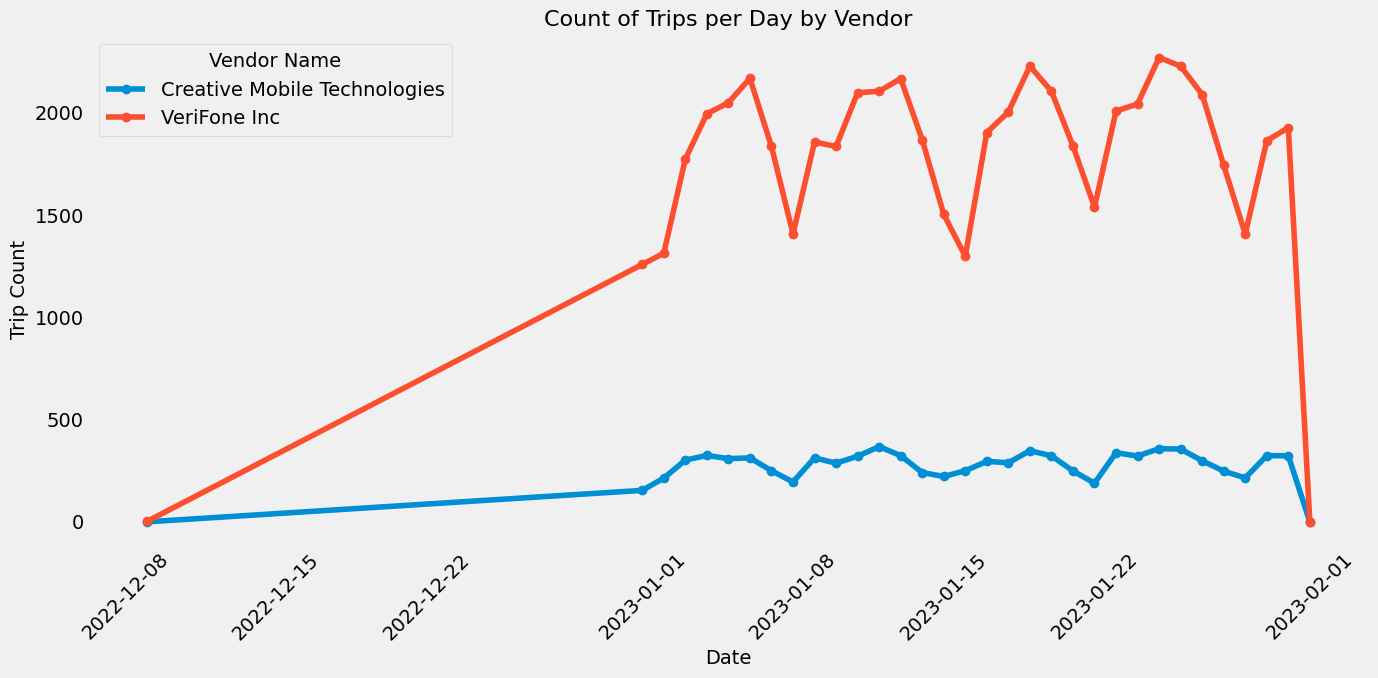

In [ ]:
# Convert 'lpep_pickup_datetime' to datetime format
df22['lpep_pickup_datetime'] = pd.to_datetime(df22['lpep_pickup_datetime'])

# Extract the date from 'lpep_pickup_datetime'
df22['pickup_date'] = df22['lpep_pickup_datetime'].dt.date

# Group by pickup_date and vendor_name to count trips
trip_counts = df22.groupby(['pickup_date', 'vendor_name']).size().reset_index(name='trip_count')

# Pivot the data to have vendor names as columns
trip_counts_pivot = trip_counts.pivot(index='pickup_date', columns='vendor_name', values='trip_count').fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
for vendor in trip_counts_pivot.columns:
    plt.plot(trip_counts_pivot.index, trip_counts_pivot[vendor], marker='o', label=vendor)

# Formatting the plot
plt.title('Count of Trips per Day by Vendor', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Trip Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=False)  # Disable gridlines
plt.legend(title='Vendor Name')
plt.tight_layout()

# Show the plot
plt.show()


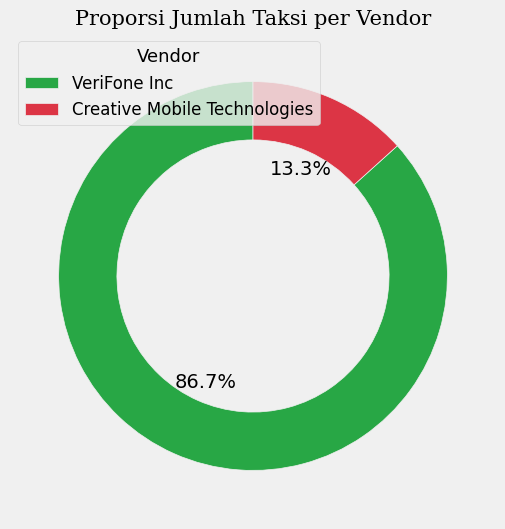

In [ ]:
# Misalnya, df21 adalah DataFrame yang berisi data trip
# df21 = pd.read_csv('path_to_your_file.csv')  # Uncomment this to load your data

# Hitung jumlah trip per vendor
trip_counts = df21['vendor_name'].value_counts()

# Hitung proporsi
total_trips = trip_counts.sum()
proportion = trip_counts / total_trips * 100

# Tentukan warna berdasarkan proporsi
colors = ['#28a745' if p > 50 else '#dc3545' for p in proportion]  # Hijau untuk >50%, Merah untuk <=50%

# Buat doughnut chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Buat pie chart
wedges, texts, autotexts = ax.pie(
    proportion,
    labels=['' for _ in trip_counts.index],  # Kosongkan label pie chart
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.3)  # Mengubah bentuk menjadi doughnut
)

# Tambahkan legend
legend_labels = trip_counts.index.tolist()
legend_colors = colors
ax.legend(legend_labels, loc='upper left', title="Vendor", fontsize=12, title_fontsize='13')

# Mengatur judul
ax.set_title("Proporsi Jumlah Taksi per Vendor", fontfamily='serif', fontsize=15)

# Menampilkan chart
plt.show()


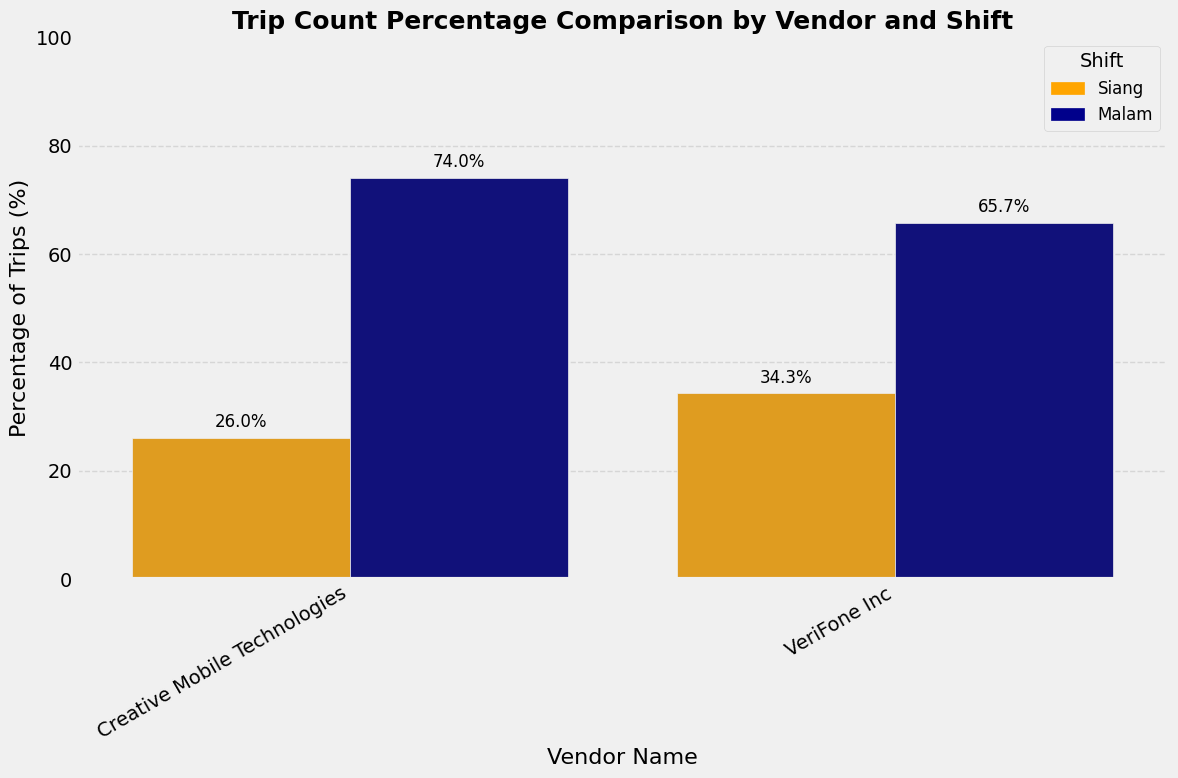

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame Creation
# df22 = pd.read_csv('your_file_path.csv')  # Uncomment this line to load your dataset

# Step 1: Count the number of trips for each vendor and shift
trip_counts = df22.groupby(['vendor_name', 'pola_2shift']).size().reset_index(name='trip_count')

# Step 2: Calculate total trips for each vendor
total_trips = trip_counts.groupby('vendor_name')['trip_count'].sum().reset_index(name='total_count')

# Step 3: Merge to get total counts in the trip_counts DataFrame
trip_counts = trip_counts.merge(total_trips, on='vendor_name')

# Step 4: Calculate the percentage of trips
trip_counts['percentage'] = (trip_counts['trip_count'] / trip_counts['total_count']) * 100

# Step 5: Filter out rows where percentage is 0 or trip_count is 0
trip_counts = trip_counts[(trip_counts['percentage'] > 0) & (trip_counts['trip_count'] > 0)]

# Step 6: Assign colors based on pola_2shift
# Ensure that 'pola_2shift' has the correct values ('siang' and 'malam')
trip_counts['color'] = trip_counts['pola_2shift'].map({'siang': 'orange', 'malam': 'darkblue'})

# Step 7: Create a bar plot for comparison
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='vendor_name', y='percentage', hue='pola_2shift', data=trip_counts, dodge=True, palette=['orange', 'darkblue'])

# Formatting the plot
plt.title('Trip Count Percentage Comparison by Vendor and Shift', fontsize=18, fontweight='bold')
plt.xlabel('Vendor Name', fontsize=16)
plt.ylabel('Percentage of Trips (%)', fontsize=16)
plt.xticks(rotation=30, ha='right', fontsize=14)  # Rotate x labels for better readability
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%

# Custom legend to show which color corresponds to which shift
handles = [plt.Rectangle((0,0),1,1, color='orange'), plt.Rectangle((0,0),1,1, color='darkblue')]
plt.legend(handles, ['Siang', 'Malam'], title='Shift', loc='upper right', fontsize=12)

# Annotate percentages on bars
for p in bar_plot.patches:
    if p.get_height() > 0:  # Ensure we only annotate positive heights
        bar_plot.annotate(f'{p.get_height():.1f}%', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', 
                          fontsize=12, color='black', 
                          xytext=(0, 5), 
                          textcoords='offset points')

# Add gridlines to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


# NYC TAXI MILESTONE

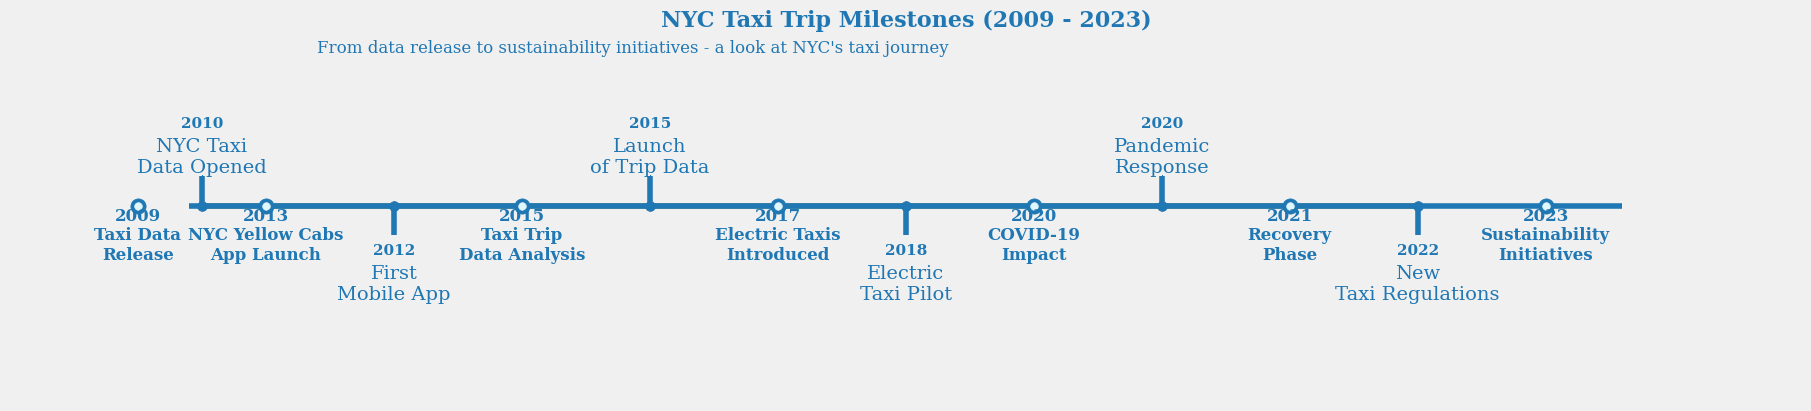

In [ ]:
# Milestone dari NYC Taxi Trip
tl_dates = [
    "2009\nTaxi Data\nRelease",       # Data taxi dirilis
    "2013\nNYC Yellow Cabs\nApp Launch",  # Peluncuran aplikasi taksi
    "2015\nTaxi Trip\nData Analysis",  # Analisis data trip
    "2017\nElectric Taxis\nIntroduced",  # Taksi listrik diperkenalkan
    "2020\nCOVID-19\nImpact",          # Dampak COVID-19
    "2021\nRecovery\nPhase",           # Fase pemulihan
    "2023\nSustainability\nInitiatives" # Inisiatif keberlanjutan
]

tl_x = [1, 2, 4, 6, 8, 10, 12]

# Sub milestones yang akan ditampilkan di bawah timeline
tl_sub_x = [1.5, 3, 5, 7, 9, 11]

tl_sub_times = [
    "2010", "2012", "2015", "2018", "2020", "2022"
]

tl_text = [
    "NYC Taxi\nData Opened",             # Data taksi dibuka
    "First\nMobile App",                  # Aplikasi mobile pertama
    "Launch\nof Trip Data",               # Peluncuran data trip
    "Electric\nTaxi Pilot",                # Proyek taksi listrik
    "Pandemic\nResponse",                  # Respons pandemi
    "New\nTaxi Regulations"                # Regulasi taksi baru
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(18, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 14)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#1f77b4', zorder=1)

# Timeline : Date Points (semua bulatan biru)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#1f77b4', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#e0f7fa', zorder=3)

# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#1f77b4', zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#1f77b4', fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3

# Remove use_line_collection argument
markerline, stemline, baseline = ax.stem(tl_sub_x, levels)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#1f77b4')
plt.setp(stemline, color='#1f77b4')

# Text untuk tahun-tahun sub milestone
for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3 * (idx % 2) - 0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#1f77b4', fontsize=11)
    
    ax.text(x, 1.3 * (idx % 2) - 0.6, txt, va='top', ha='center', 
            fontfamily='serif', color='#1f77b4')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("NYC Taxi Trip Milestones (2009 - 2023)", fontweight="bold", fontfamily='serif', fontsize=16, color='#1f77b4')
ax.text(2.4, 1.57, "From data release to sustainability initiatives - a look at NYC's taxi journey", 
        fontfamily='serif', fontsize=12, color='#1f77b4')

plt.show()


# 1. Jam berapa saja yang potensial untuk dilakukan pricing strategy untuk memaksimalkan revenue bagi perusahaan?


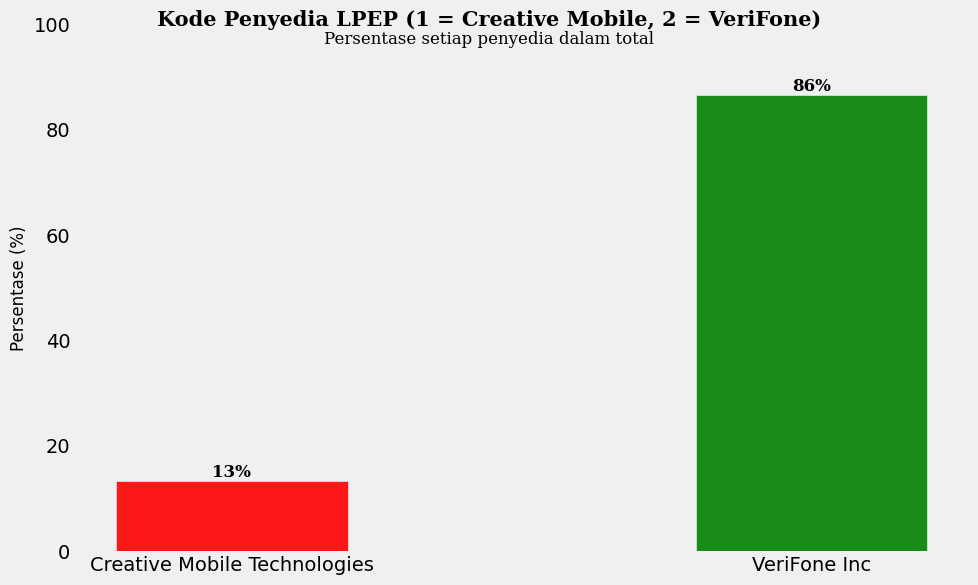

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df21 is already defined
# Count occurrences of each vendor name and normalize
vendor_counts = df21['vendor_name'].value_counts(normalize=True).reset_index()
vendor_counts.columns = ['Vendor', 'Ratio']  # Rename columns for clarity

# Sort values for color mapping
vendor_counts = vendor_counts.sort_values(by='Ratio')

# Define colors based on the ratio
colors = ['red'] * len(vendor_counts)  # Default to red
colors[0] = 'red'  # Lowest percentage (first in sorted)
colors[-1] = 'green'  # Highest percentage (last in sorted)

# Assign yellow to the rest
for i in range(1, len(vendor_counts) - 1):
    colors[i] = 'yellow'

# Create a vertical bar plot with adjusted figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot bars with the assigned colors and increased width
bars = ax.bar(vendor_counts['Vendor'].replace({'Creative Mobile': '1', 'VeriFone': '2'}),
               vendor_counts['Ratio'] * 100,  # Scale ratio to percentage
               color=colors, alpha=0.9, width=0.4)  # Adjust width for better proportion

# Annotate vendor codes and percentages on the bars
for bar in bars:
    height = bar.get_height()
    percentage = int(height)  # Since height is now in percentage
    ax.annotate(f"{percentage}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                va='bottom', ha='center', fontsize=12,
                fontweight='bold', fontfamily='serif', color='black')

# Title & Subtitle
fig.text(0.5, 0.95, 'Kode Penyedia LPEP (1 = Creative Mobile, 2 = VeriFone)',
         fontfamily='serif', fontsize=15, fontweight='bold', ha='center')
fig.text(0.5, 0.92, 'Persentase setiap penyedia dalam total',
         fontfamily='serif', fontsize=12, ha='center')

# Hide spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Set y-axis limits to 0 to 100%
ax.set_ylim(0, 100)

# Remove gridlines
ax.grid(False)

# Add y-axis label
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=0)  # No rotation needed as we replaced text with codes
plt.tight_layout()
plt.show()


In [ ]:
df22.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_date',
       'pickup_time', 'dropoff_date', 'dropoff_time', 'Pickup_Hour',
       'Pickup_Day', 'Pickup_Month', 'Pickup_Year', 'pola_2shift',
       'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)', 'vendor_name',
       'pendapatan_per_trip', 'fuel_cost_per_trip',
       'maintenance_cost_per_trip', 'fixed_costs_per_trip',
       'total_costs_per_trip', 'laba_bersih_per_trip'],
      dtype='object')

* `Vendor Verifone berkontribusi terbesar 86% terhadap pendapatan NYX Taxi trip.`

* Waktu dan Periode Frekuensi Pengambilan Tertinggi dan Terendah

In [ ]:
# Menghitung frekuensi pengambilan per jam
pickup_counts_hour = df22['Pickup_Hour'].value_counts().sort_index()
most_frequent_hour = pickup_counts_hour.idxmax()
least_frequent_hour = pickup_counts_hour.idxmin()

print(f'Waktu paling ramai: {most_frequent_hour}, Waktu paling sedikit: {least_frequent_hour}')


Waktu paling ramai: 18, Waktu paling sedikit: 5


Frekuensi Pengambilan per Jam:
Pickup_Hour
0     1098
1      859
2      619
3      552
4      422
5      409
6      972
7     2613
8     3177
9     3447
10    3562
11    3642
12    3716
13    3915
14    4295
15    4982
16    5092
17    5111
18    5133
19    4151
20    3174
21    2360
22    1849
23    1471
Name: count, dtype: int64


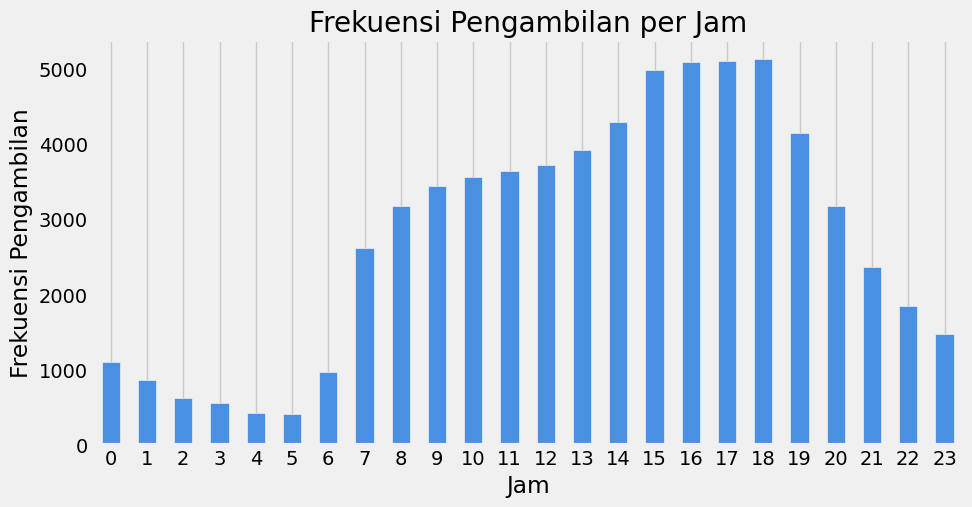

Waktu paling ramai: 18, Waktu paling sedikit: 5


In [ ]:
import matplotlib.pyplot as plt

# Menghitung frekuensi pengambilan per jam
pickup_counts_hour = df22['Pickup_Hour'].value_counts().sort_index()

# Menampilkan tabel
print("Frekuensi Pengambilan per Jam:")
print(pickup_counts_hour)

# Visualisasi
plt.figure(figsize=(10, 5))
pickup_counts_hour.plot(kind='bar', color='#4A90E2')  # Warna biru senada
plt.title('Frekuensi Pengambilan per Jam')
plt.xlabel('Jam')
plt.ylabel('Frekuensi Pengambilan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

most_frequent_hour = pickup_counts_hour.idxmax()
least_frequent_hour = pickup_counts_hour.idxmin()

print(f'Waktu paling ramai: {most_frequent_hour}, Waktu paling sedikit: {least_frequent_hour}')


# 2.Upaya apa saja yang dapat dilakukan untuk meningkatkan pendapatan di shit malam untuk menekan disparitas siang v.s malam?


Frekuensi Pengambilan per Hari:
Pickup_Day
Tuesday      11016
Thursday      9995
Friday        9794
Monday        9783
Wednesday     9665
Saturday      8276
Sunday        8092
Name: count, dtype: int64


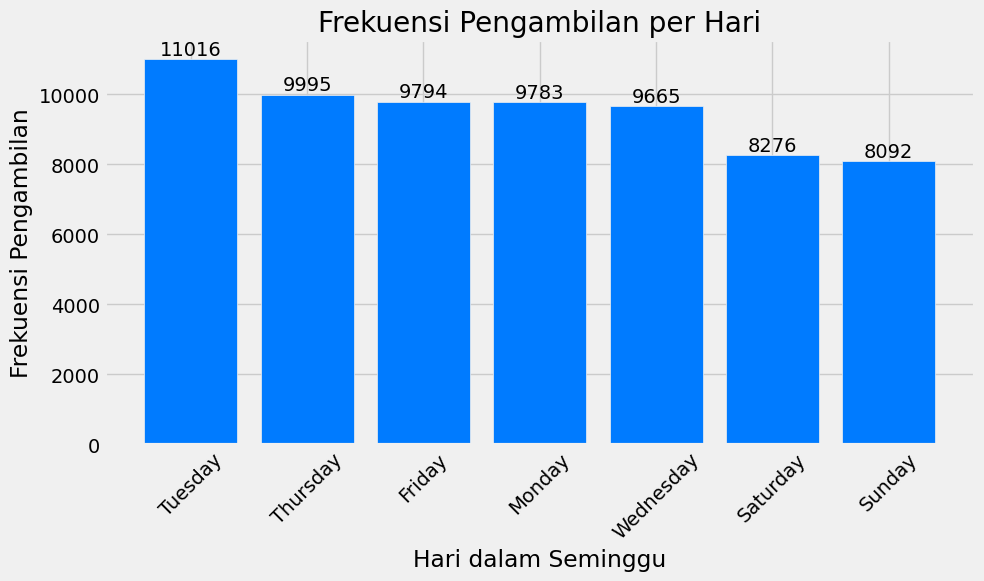

Hari dengan frekuensi pengambilan tertinggi: Tuesday
Koefisien Variansi: 10.69%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung frekuensi pengambilan per hari
pickup_counts_day = df22['Pickup_Day'].value_counts()

# Menampilkan tabel
print("Frekuensi Pengambilan per Hari:")
print(pickup_counts_day)

# Menghitung koefisien variansi per kelompok hari
cv_per_day = pickup_counts_day.std() / pickup_counts_day.mean() * 100  # Dalam persen

# Visualisasi
plt.figure(figsize=(10, 5))

# Plot frekuensi pengambilan
bars = plt.bar(pickup_counts_day.index, pickup_counts_day.values, color='#007BFF')

# Menambahkan label di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Frekuensi Pengambilan per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Frekuensi Pengambilan')
plt.xticks(rotation=45)

plt.show()

# Menampilkan koefisien variansi
most_frequent_day = pickup_counts_day.idxmax()
print(f'Hari dengan frekuensi pengambilan tertinggi: {most_frequent_day}')
print(f'Koefisien Variansi: {cv_per_day:.2f}%')


In [ ]:
# Menghitung jumlah penumpang per hari
passenger_counts_per_day = df22.groupby('Pickup_Day')['passenger_count'].sum()

# Menampilkan tabel jumlah penumpang per hari
print("Jumlah Penumpang per Hari:")
print(passenger_counts_per_day)

# Menentukan hari dengan jumlah penumpang tertinggi
most_passenger_day = passenger_counts_per_day.idxmax()
most_passenger_count = passenger_counts_per_day.max()

print(f'Hari dengan jumlah penumpang terbanyak: {most_passenger_day} dengan {most_passenger_count} penumpang.')


Jumlah Penumpang per Hari:
Pickup_Day
Friday       12989
Monday       12620
Saturday     10714
Sunday       10718
Thursday     12970
Tuesday      14332
Wednesday    12410
Name: passenger_count, dtype: int64
Hari dengan jumlah penumpang terbanyak: Tuesday dengan 14332 penumpang.


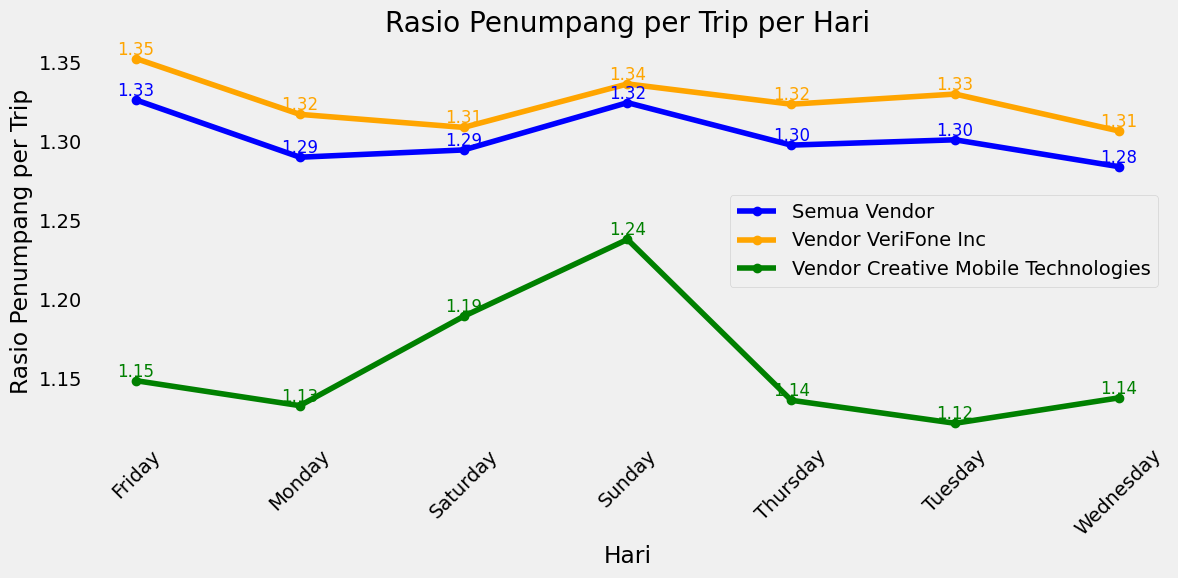

In [ ]:
# Sample DataFrame Creation
# df22 = pd.read_csv('your_file_path.csv')  # Uncomment this line to load your dataset

# Menghitung rasio penumpang per trip untuk semua vendor
trip_counts_per_day_all = df22.groupby('Pickup_Day').size()
passenger_counts_per_day_all = df22.groupby('Pickup_Day')['passenger_count'].sum()
passenger_trip_ratio_all = passenger_counts_per_day_all / trip_counts_per_day_all

# Menyiapkan DataFrame untuk semua vendor
summary_df_all = pd.DataFrame({
    'Passenger/Trip Ratio': passenger_trip_ratio_all
})

# Menghitung rasio penumpang per trip untuk vendor tertentu (misal Vendor 1 dan Vendor 2)
vendor_names = df22['vendor_name'].unique()  # Mendapatkan daftar vendor
vendor1 = vendor_names[0]  # Ganti dengan nama vendor yang sesuai
vendor2 = vendor_names[1]  # Ganti dengan nama vendor yang sesuai

trip_counts_per_day_vendor1 = df22[df22['vendor_name'] == vendor1].groupby('Pickup_Day').size()
passenger_counts_per_day_vendor1 = df22[df22['vendor_name'] == vendor1].groupby('Pickup_Day')['passenger_count'].sum()
passenger_trip_ratio_vendor1 = passenger_counts_per_day_vendor1 / trip_counts_per_day_vendor1

trip_counts_per_day_vendor2 = df22[df22['vendor_name'] == vendor2].groupby('Pickup_Day').size()
passenger_counts_per_day_vendor2 = df22[df22['vendor_name'] == vendor2].groupby('Pickup_Day')['passenger_count'].sum()
passenger_trip_ratio_vendor2 = passenger_counts_per_day_vendor2 / trip_counts_per_day_vendor2

# Menyiapkan DataFrame untuk vendor 1 dan vendor 2
summary_df_vendor1 = pd.DataFrame({
    'Passenger/Trip Ratio': passenger_trip_ratio_vendor1
})

summary_df_vendor2 = pd.DataFrame({
    'Passenger/Trip Ratio': passenger_trip_ratio_vendor2
})

# Visualisasi Line Chart
plt.figure(figsize=(12, 6))

plt.plot(summary_df_all.index, summary_df_all['Passenger/Trip Ratio'], label='Semua Vendor', marker='o', color='blue')
plt.plot(summary_df_vendor1.index, summary_df_vendor1['Passenger/Trip Ratio'], label=f'Vendor {vendor1}', marker='o', color='orange')
plt.plot(summary_df_vendor2.index, summary_df_vendor2['Passenger/Trip Ratio'], label=f'Vendor {vendor2}', marker='o', color='green')

# Menambahkan anotasi nilai di setiap titik dengan ukuran font yang lebih besar
for i, value in enumerate(summary_df_all['Passenger/Trip Ratio']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='blue')  # Ukuran font 12
for i, value in enumerate(summary_df_vendor1['Passenger/Trip Ratio']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='orange')  # Ukuran font 12
for i, value in enumerate(summary_df_vendor2['Passenger/Trip Ratio']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, color='green')  # Ukuran font 12

plt.title('Rasio Penumpang per Trip per Hari')
plt.xlabel('Hari')
plt.ylabel('Rasio Penumpang per Trip')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


* Jika tanpa melihat rasio penumpang per-trip hanya dari hari dengan trip terbanyak ada di hari Selasa dengan koef. Variansi (KV) yang masih cukup lebar di 10.69%. Namun jika ditelisik lagi trend ratio antara penumpang dan trip (Gbr 3), maka perlu dicek lebih lanjut kenapa di hari Jumat rationya bisa lebih besar dibanding weekend. Kondisi ini membuktikan bahwa fenomena peningkatan ratio penumpang tidak hanya terpusat di weekend, untuk vendor Verifone “peak ratio”  1.35 ada di Jumat. Sedangkan pola vendor Creative Mobile Tech. Cenderung so so saja. Jumlah penumpang per trip merupakan indikator efisiensi operasional taksi. Rasio yang lebih tinggi menunjukkan bahwa kendaraan mengangkut lebih banyak penumpang dalam satu perjalanan, yang dapat meningkatkan pendapatan dan mengurangi biaya per penumpang. Selain itu juga positif bagi aspek Safety terkait mengurangi jumlah kendaraan di jalan, yang berdampak positif terhadap lingkungan dengan mengurangi kemacetan dan emisi karbon.


* Melihat proporsi trip berdasarkan category_time

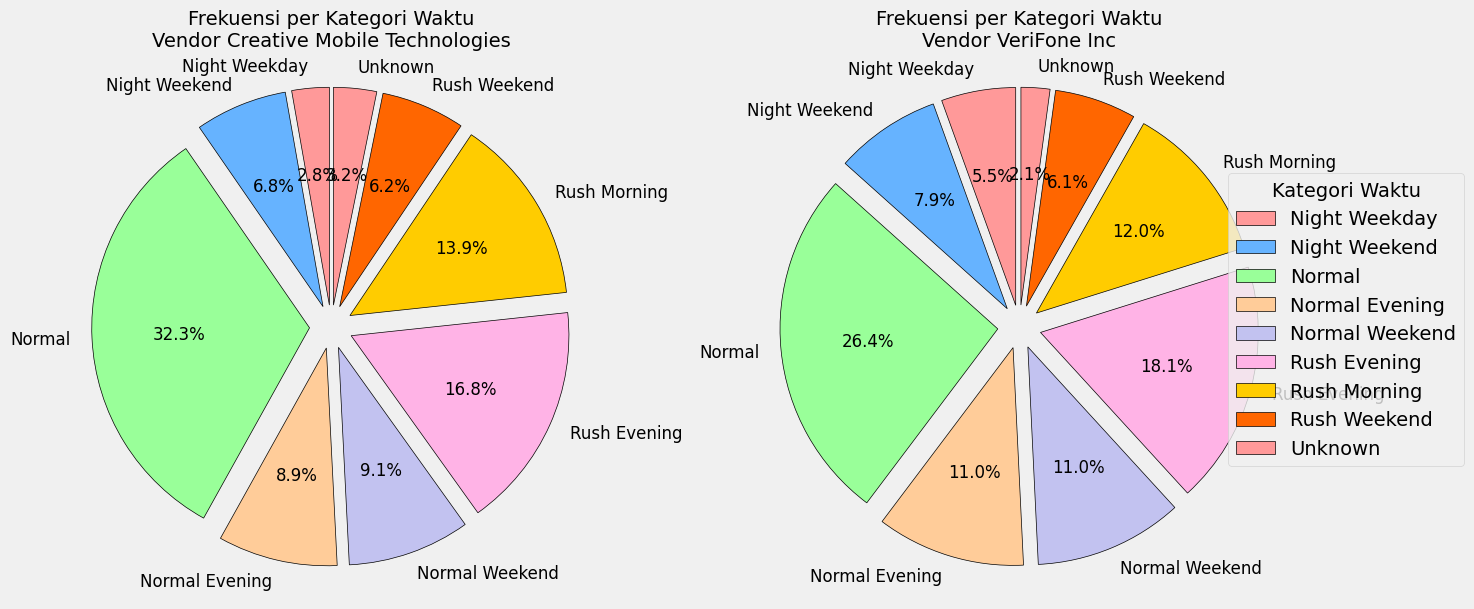

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame Creation
# df22 = pd.read_csv('your_file_path.csv')  # Uncomment this line to load your dataset

# Step 1: Menghitung frekuensi per `category_time` dan `vendor_name`
pickup_counts_vendor = df22.groupby(['vendor_name', 'category_time']).size().unstack(fill_value=0)

# Step 2: Membuat Pie Chart per Vendor
plt.figure(figsize=(15, 8))  # Ukuran figure lebih besar untuk memuat grafik dengan baik

# Variasi warna yang lebih beragam
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ffcc00', '#ff6600']

for i, vendor in enumerate(pickup_counts_vendor.index):
    plt.subplot(1, len(pickup_counts_vendor.index), i+1)
    
    # Mengatur explode agar potongan pie terlihat lebih jelas
    explode = [0.1] * len(pickup_counts_vendor.columns)  # Mengembangkan semua irisan
    pickup_counts_vendor.loc[vendor].plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=colors[:len(pickup_counts_vendor.columns)],  # Ambil warna sesuai jumlah kategori
        startangle=90,
        labels=pickup_counts_vendor.columns,
        wedgeprops={'edgecolor': 'black'},
        explode=explode,  # Menggunakan explode untuk memisahkan irisan
        fontsize=12  # Mengatur ukuran font di dalam pie chart
    )
    
    plt.title(f'Frekuensi per Kategori Waktu\nVendor {vendor}', fontsize=14)
    plt.ylabel('')  # Menghapus label Y agar lebih rapi

# Menambahkan legenda untuk menjelaskan warna kategori waktu
plt.legend(pickup_counts_vendor.columns, title="Kategori Waktu", loc="upper center", bbox_to_anchor=(1.1, 0.8))

# Menampilkan plot
plt.tight_layout()
plt.show()


                     Average_Pickups  Variance_Pickups
VendorID Pickup_Day                                   
1        Sunday               40.625           598.853
         Monday               59.958          1816.129
         Tuesday              63.750          2114.109
         Wednesday            53.875          1562.810
         Thursday             57.542          1486.433
         Friday               52.458          1375.389
         Saturday             41.167           618.667
2        Sunday              296.542         23483.737
         Monday              347.667         48504.232
         Tuesday             395.250         66980.891
         Wednesday           348.833         54345.884
         Thursday            358.917         55569.123
         Friday              355.625         48032.853
         Saturday            303.667         28274.841


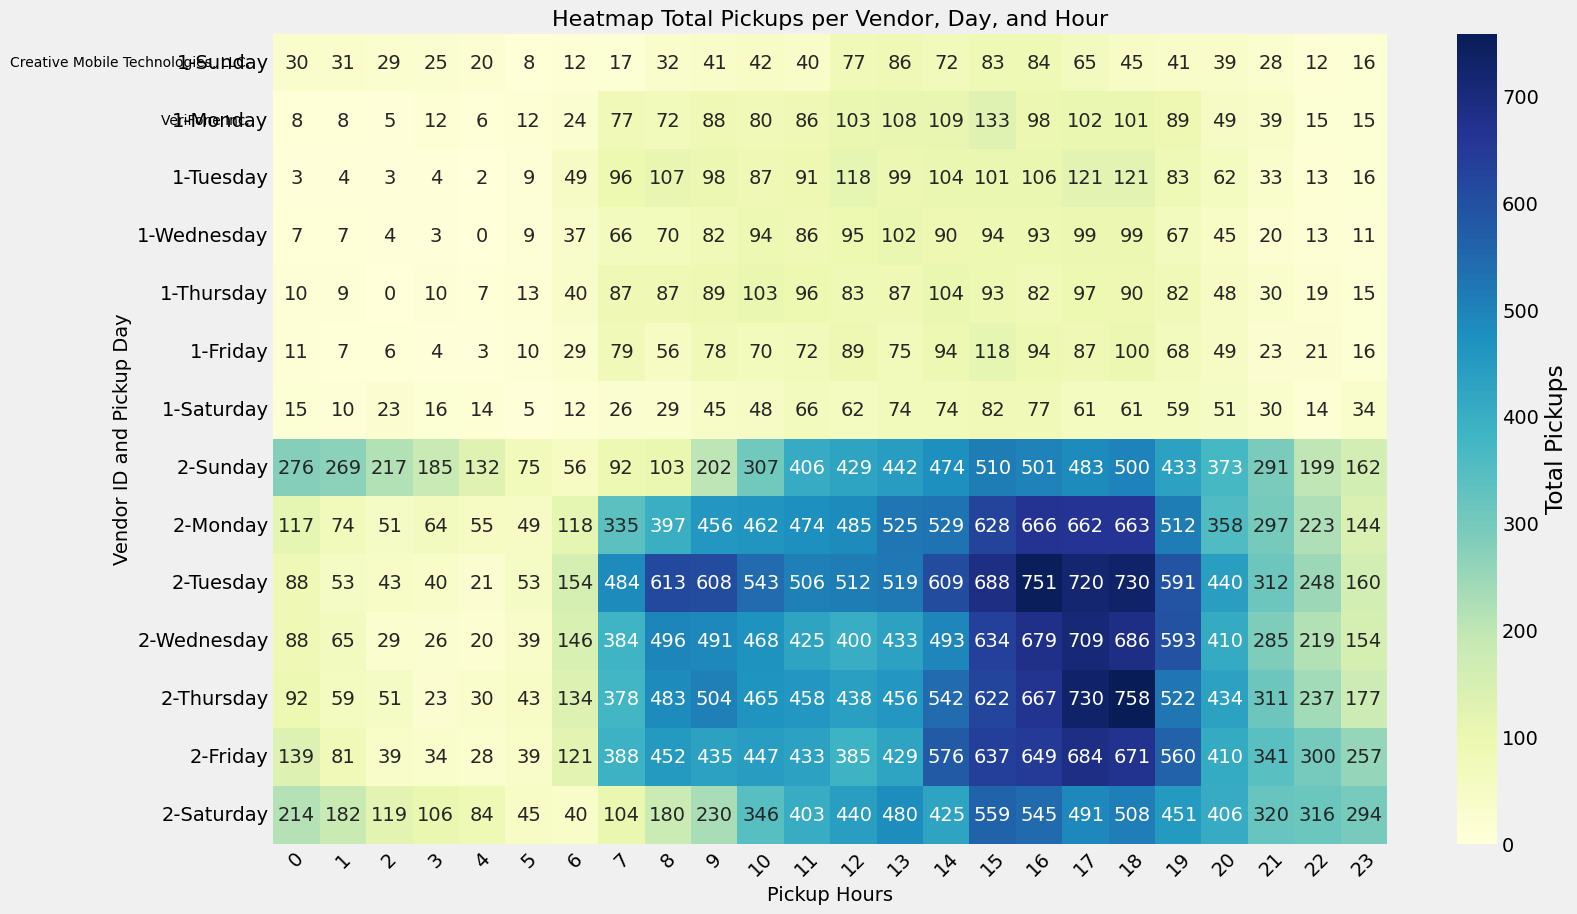

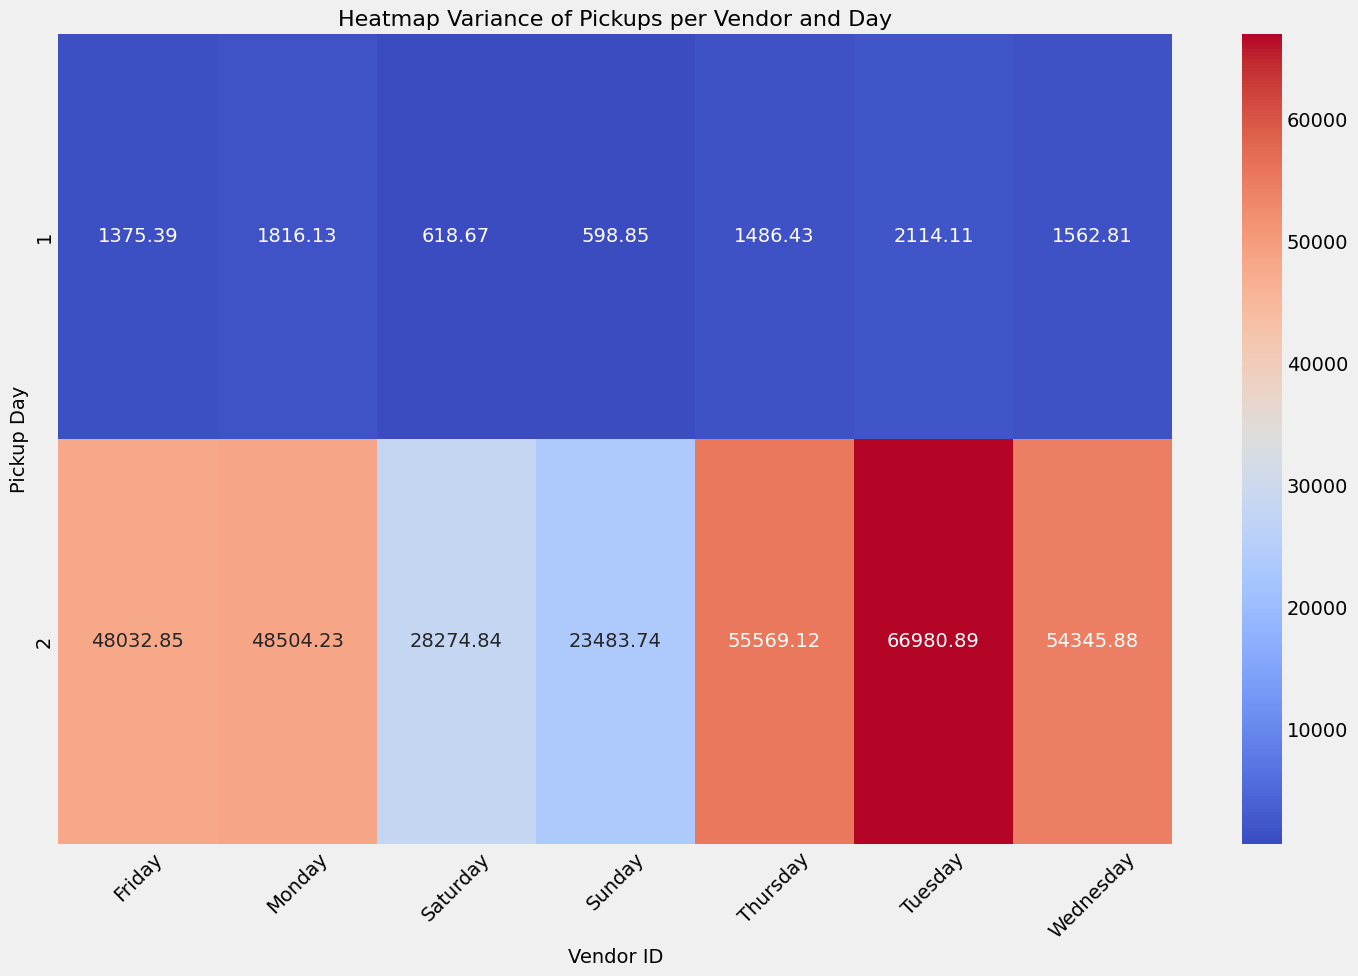

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh cara memuat data (pastikan df22 sudah didefinisikan)
# df22 = pd.read_csv('data.csv')

# Konversi kolom waktu ke datetime
df22['lpep_pickup_datetime'] = pd.to_datetime(df22['lpep_pickup_datetime'])
df22['lpep_dropoff_datetime'] = pd.to_datetime(df22['lpep_dropoff_datetime'])

# Tambahkan kolom untuk hari dan jam pickup dari datetime
df22['Pickup_Day'] = df22['lpep_pickup_datetime'].dt.day_name()  # Nama hari
df22['Pickup_Hour'] = df22['lpep_pickup_datetime'].dt.hour  # Jam pickup

# Definisikan urutan hari dari Sunday ke Saturday
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Membuat pivot table untuk menghitung total pickups per vendor, hari, dan jam
pickup_counts = pd.pivot_table(df22, 
                                index=['VendorID', 'Pickup_Day'], 
                                columns='Pickup_Hour', 
                                values='PULocationID', 
                                aggfunc='count', 
                                fill_value=0)

# Mengurutkan ulang index untuk days of the week
pickup_counts = pickup_counts.reindex(
    pd.MultiIndex.from_product([pickup_counts.index.levels[0], day_order], names=['VendorID', 'Pickup_Day']),
    fill_value=0
)

# Hitung rata-rata dan variansi
average_pickups = pickup_counts.mean(axis=1)
variance_pickups = pickup_counts.var(axis=1)

# Gabungkan rata-rata dan variansi ke dalam DataFrame
summary_stats = pd.DataFrame({
    'Average_Pickups': average_pickups,
    'Variance_Pickups': variance_pickups
})

# Menampilkan DataFrame
print(summary_stats)

# Visualisasi Heatmap untuk total pickups
plt.figure(figsize=(16, 10))  # Lebar dan tinggi heatmap
sns.heatmap(pickup_counts, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Total Pickups'})
plt.title('Heatmap Total Pickups per Vendor, Day, and Hour', fontsize=16)
plt.xlabel('Pickup Hours', fontsize=14)
plt.ylabel('Vendor ID and Pickup Day', fontsize=14)
plt.xticks(rotation=45)  # Rotasi label jam untuk keterbacaan

# Menambahkan label vendor di bawah heatmap
vendor_labels = {
    1: 'Creative Mobile Technologies, LLC.',
    2: 'VeriFone Inc.'
}

# Menempatkan label vendor di bawah heatmap
for idx, vendor in vendor_labels.items():
    plt.text(-0.5, idx - 0.5, vendor, fontsize=10, va='center', ha='right')

plt.show()

# Visualisasi Heatmap untuk variansi
plt.figure(figsize=(16, 10))  # Lebar dan tinggi heatmap
sns.heatmap(summary_stats['Variance_Pickups'].unstack(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap Variance of Pickups per Vendor and Day', fontsize=16)
plt.xlabel('Vendor ID', fontsize=14)
plt.ylabel('Pickup Day', fontsize=14)
plt.xticks(rotation=45)  # Rotasi label hari untuk keterbacaan
plt.show()


* `Proporsi rush hours baik morning dan evening setara dengan jam normal.` Hal ini bisa jadi peluang untuk menaikkan harga pada jam2 sibuk tersebut (pricing strategy)

In [635]:
# Salin df22 untuk membuat DataFrame 'before' dan 'after'
df22_before = df22.copy()
df22_after = df22.copy()

# Mendefinisikan jam-jam rush
rush_hours = [7, 8, 9, 14, 15, 16, 17, 18, 19]

# Pastikan kolom pickup_time adalah dalam format datetime
df22_before['pickup_time'] = pd.to_datetime(df22_before['pickup_time'])
df22_after['pickup_time'] = pd.to_datetime(df22_after['pickup_time'])

# Mengonversi pickup_time ke dalam format jam
df22_before['pickup_hour'] = df22_before['pickup_time'].dt.hour
df22_after['pickup_hour'] = df22_after['pickup_time'].dt.hour

# Menerapkan kenaikan 10% pada pendapatan_per_trip pada jam-jam rush
df22_after.loc[df22_after['pickup_hour'].isin(rush_hours), 'pendapatan_per_trip'] *= 1.10

# Menghitung rata-rata pendapatan per trip sebelum dan sesudah
average_before = df22_before.loc[df22_before['pickup_hour'].isin(rush_hours), 'pendapatan_per_trip'].mean()
average_after = df22_after.loc[df22_after['pickup_hour'].isin(rush_hours), 'pendapatan_per_trip'].mean()

# Menghitung persentase kenaikan
percentage_increase = ((average_after - average_before) / average_before) * 100

# Menampilkan hasil
print(f"Average Pendapatan per Trip Sebelum Kenaikan: ${average_before:.2f} USD")
print(f"Average Pendapatan per Trip Setelah Kenaikan: ${average_after:.2f} USD")
print(f"Persentase Kenaikan: {percentage_increase:.2f}%")


Average Pendapatan per Trip Sebelum Kenaikan: $23.34 USD
Average Pendapatan per Trip Setelah Kenaikan: $25.67 USD
Persentase Kenaikan: 10.00%


In [636]:
import pandas as pd

# Misalkan df22 adalah DataFrame yang sudah ada
# df22 = pd.read_csv("path_to_your_file/your_file.csv")  # Ganti dengan path yang sesuai

# Salin df22 untuk membuat DataFrame 'before' dan 'after'
df22_before = df22.copy()
df22_after = df22.copy()

# Mendefinisikan jam-jam rush
rush_hours = [7, 8, 9, 14, 15, 16, 17, 18, 19]

# Pastikan kolom pickup_time adalah dalam format datetime
df22_before['pickup_time'] = pd.to_datetime(df22_before['pickup_time'])
df22_after['pickup_time'] = pd.to_datetime(df22_after['pickup_time'])

# Mengonversi pickup_time ke dalam format jam
df22_before['pickup_hour'] = df22_before['pickup_time'].dt.hour
df22_after['pickup_hour'] = df22_after['pickup_time'].dt.hour

# Menerapkan kenaikan 10% pada pendapatan_per_trip pada jam-jam rush
df22_after.loc[df22_after['pickup_hour'].isin(rush_hours), 'pendapatan_per_trip'] *= 1.10

# Menghitung rata-rata pendapatan per trip per jam
average_before_all_hours = df22_before.groupby('pickup_hour')['pendapatan_per_trip'].mean().reset_index()
average_after_all_hours = df22_after.groupby('pickup_hour')['pendapatan_per_trip'].mean().reset_index()

# Mengganti nama kolom untuk membedakan
average_before_all_hours.rename(columns={'pendapatan_per_trip': 'Average_Pendapatan_Before'}, inplace=True)
average_after_all_hours.rename(columns={'pendapatan_per_trip': 'Average_Pendapatan_After'}, inplace=True)

# Menggabungkan kedua DataFrame
comparison = pd.merge(average_before_all_hours, average_after_all_hours, on='pickup_hour')

# Menghitung persentase perubahan untuk setiap jam
comparison['Percentage_Change'] = ((comparison['Average_Pendapatan_After'] - comparison['Average_Pendapatan_Before']) / comparison['Average_Pendapatan_Before']) * 100

# Menampilkan hasil
print(comparison)


    pickup_hour  Average_Pendapatan_Before  Average_Pendapatan_After  \
0             0                     22.649                    22.649   
1             1                     24.199                    24.199   
2             2                     26.064                    26.064   
3             3                     27.341                    27.341   
4             4                     28.106                    28.106   
5             5                     31.390                    31.390   
6             6                     24.274                    24.274   
7             7                     22.547                    24.802   
8             8                     23.408                    25.749   
9             9                     23.119                    25.431   
10           10                     23.267                    23.267   
11           11                     23.190                    23.190   
12           12                     23.052                    23

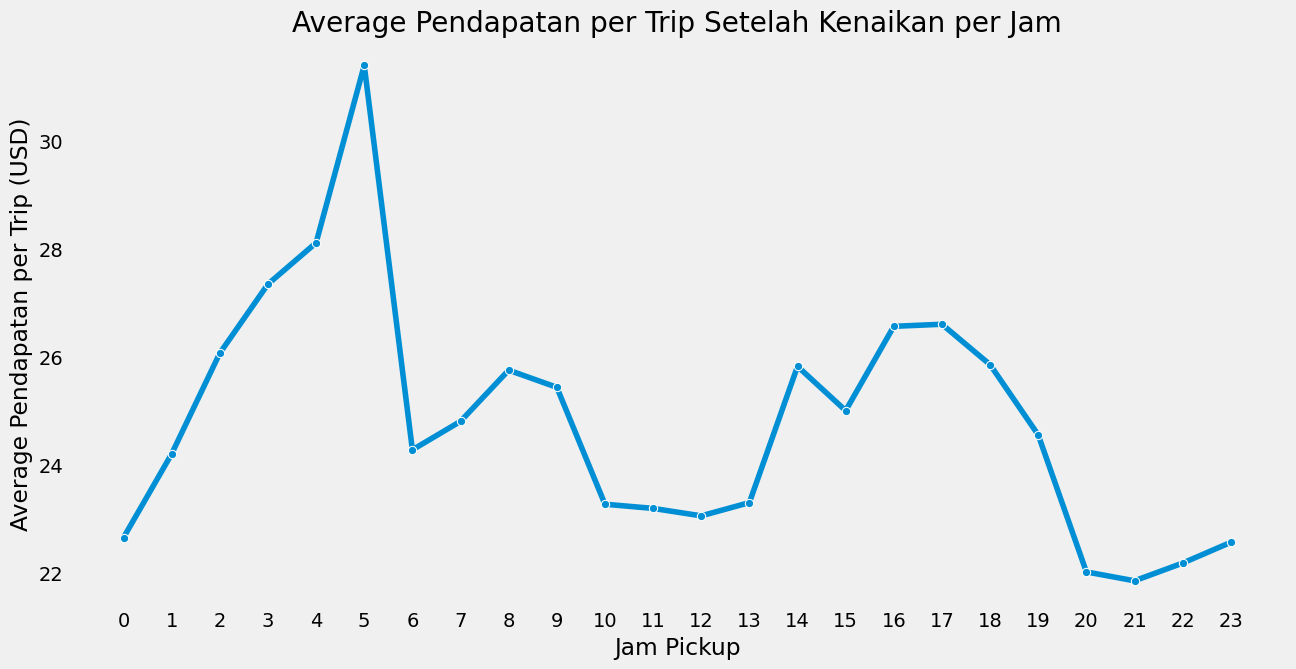

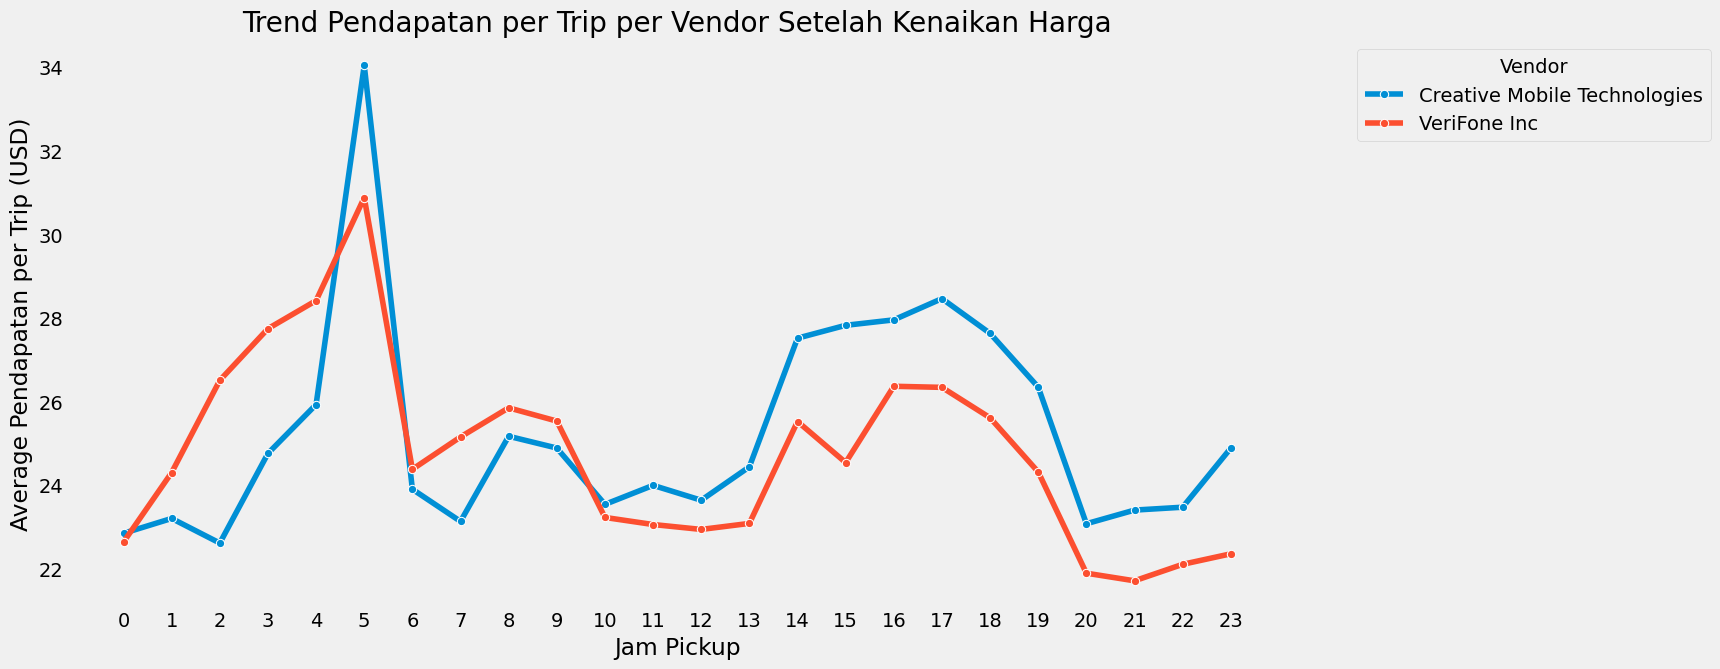

In [637]:
# Menyiapkan Data untuk Grafik Pendapatan per Trip
plt.figure(figsize=(14, 7))

# Grafik rata-rata pendapatan per trip setelah kenaikan per jam
sns.lineplot(x='pickup_hour', y='Average_Pendapatan_After', data=comparison, marker='o')
plt.title('Average Pendapatan per Trip Setelah Kenaikan per Jam')
plt.xlabel('Jam Pickup')
plt.ylabel('Average Pendapatan per Trip (USD)')
plt.xticks(range(24))  # Mengatur x-axis untuk menampilkan semua jam
plt.grid()
plt.show()

# Menyiapkan Data untuk Analisis Tren per Vendor
# Pastikan kolom 'vendor_name' ada di df22_after
average_vendor = df22_after.groupby(['vendor_name', 'pickup_hour'])['pendapatan_per_trip'].mean().reset_index()

# Menyiapkan Grafik Tren Pendapatan per Trip per Vendor
plt.figure(figsize=(14, 7))
sns.lineplot(x='pickup_hour', y='pendapatan_per_trip', hue='vendor_name', data=average_vendor, marker='o')
plt.title('Trend Pendapatan per Trip per Vendor Setelah Kenaikan Harga')
plt.xlabel('Jam Pickup')
plt.ylabel('Average Pendapatan per Trip (USD)')
plt.xticks(range(24))  # Mengatur x-axis untuk menampilkan semua jam
plt.grid()
plt.legend(title='Vendor', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menampilkan legenda di luar grafik
plt.show()


* H0 : Ada pengaruh signifikan dari biaya bahan bakar per trip terhadap laba bersih per trip.
* H1 : Tidak ada pengaruh signifikan dari biaya bahan bakar per trip terhadap laba bersih per trip.

In [613]:
import pandas as pd
import statsmodels.api as sm

# Misalkan df22 sudah didefinisikan dan kolom-kolom sudah ada
# Memastikan bahwa tidak ada nilai NaN dalam kolom yang digunakan
df22 = df22[['fuel_cost_per_trip', 'laba_bersih_per_trip']].dropna()

# Memilih variabel independen dan dependen
X = df22['fuel_cost_per_trip']
y = df22['laba_bersih_per_trip']

# Menambahkan konstanta ke model
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Melihat ringkasan hasil regresi
summary = model.summary()
print(summary)

# Mengambil nilai p dari hasil model
p_value = model.pvalues[1]  # Mengambil p-value untuk variabel independen (fuel_cost_per_trip)

# Menentukan level signifikansi
alpha = 0.05

# Menentukan kesimpulan
if p_value < alpha:
    conclusion = "Menolak Hipotesis Nol (H0): Ada pengaruh signifikan dari biaya bahan bakar per trip terhadap laba bersih per trip."
else:
    conclusion = "Gagal menolak Hipotesis Nol (H0): Tidak ada pengaruh signifikan dari biaya bahan bakar per trip terhadap laba bersih per trip."

print(conclusion)


                             OLS Regression Results                             
Dep. Variable:     laba_bersih_per_trip   R-squared:                       0.643
Model:                              OLS   Adj. R-squared:                  0.643
Method:                   Least Squares   F-statistic:                 1.201e+05
Date:                  Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                          15:23:03   Log-Likelihood:            -2.3465e+05
No. Observations:                 66621   AIC:                         4.693e+05
Df Residuals:                     66619   BIC:                         4.693e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

# Waktu Pickup Paling Ramai

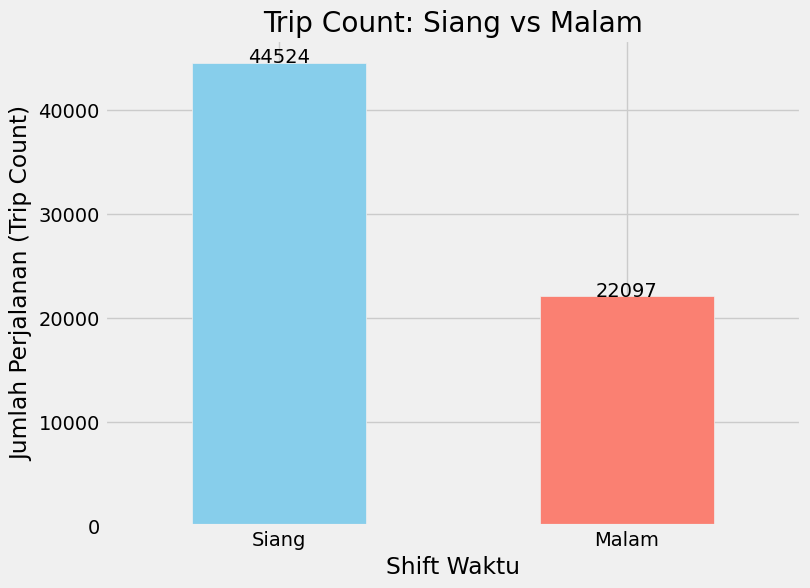

In [640]:
import matplotlib.pyplot as plt

# Menghitung jumlah trip untuk setiap kategori di kolom 'pola_2shift'
trip_count = df22['pola_2shift'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
trip_count.plot(kind='bar', color=['skyblue', 'salmon'])

# Menambahkan judul dan label pada sumbu
plt.title('Trip Count: Siang vs Malam')
plt.xlabel('Shift Waktu')
plt.ylabel('Jumlah Perjalanan (Trip Count)')

# Menambahkan label di atas setiap bar
for index, value in enumerate(trip_count):
    plt.text(index, value + 5, str(value), ha='center')

# Menampilkan plot
plt.xticks(rotation=0)  # Supaya label kategori tetap horizontal
plt.show()


In [641]:
# Menghitung jumlah perjalanan untuk setiap shift (Malam dan Siang)
trip_count = df22['pola_2shift'].value_counts()

# Mendapatkan jumlah trip Malam dan Siang
trip_malam = trip_count.get('Malam', 0)  # Jika tidak ada, maka default 0
trip_siang = trip_count.get('Siang', 0)  # Jika tidak ada, maka default 0

# Menghitung gap persentase antara Malam dan Siang
gap_percentage = ((trip_malam - trip_siang) / trip_siang) * 100 if trip_siang != 0 else None

# Menampilkan hasil
print(f"Gap persentase antara jumlah trip Malam dan Siang adalah {gap_percentage:.2f}%")


Gap persentase antara jumlah trip Malam dan Siang adalah -50.37%


In [639]:
# Menghitung proporsi waktu malam dari kolom pola_2shift
proporsi_malam = df22['pola_2shift'].value_counts(normalize=True).get('Malam', 0)
print(f"Proporsi waktu malam: {proporsi_malam:.2%}")


Proporsi waktu malam: 33.17%


In [642]:
from statsmodels.stats.proportion import proportions_ztest

# Menentukan jumlah observasi untuk shift malam dan total observasi
malam_count = trip_count.get('Malam', 0)  # Jumlah trip malam
total_count = trip_count.sum()  # Total trip

# Proporsi hipotesis
p0 = 0.5

# Melakukan uji z untuk proporsi
z_stat, p_value = proportions_ztest(count=malam_count, nobs=total_count, value=p0, alternative='smaller')

# Menampilkan hasil uji
print(f"z-statistik: {z_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# Keputusan berdasarkan p-value
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada bukti bahwa proporsi waktu malam lebih kecil dari 0.5.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa proporsi waktu malam lebih kecil dari 0.5.")


z-statistik: -92.27
p-value: 0.0000
Tolak H0: Ada bukti bahwa proporsi waktu malam lebih kecil dari 0.5.


In [644]:
df22.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_date',
       'pickup_time', 'dropoff_date', 'dropoff_time', 'Pickup_Hour',
       'Pickup_Day', 'Pickup_Month', 'Pickup_Year', 'pola_2shift',
       'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)', 'vendor_name',
       'pendapatan_per_trip', 'fuel_cost_per_trip',
       'maintenance_cost_per_trip', 'fixed_costs_per_trip',
       'total_costs_per_trip', 'laba_bersih_per_trip'],
      dtype='object')

In [651]:
# Filter data untuk shift malam
df_malam = df22[df22['pola_2shift'] == 'Malam']

# Periksa apakah df_malam tidak kosong
if not df_malam.empty:
    # Hitung jumlah trip berdasarkan lokasi pickup (PULocationID)
    pickup_counts_malam = df_malam['PULocationID'].value_counts().reset_index()
    pickup_counts_malam.columns = ['PULocationID', 'trip_count']

    # Urutkan berdasarkan jumlah trip terbanyak
    pickup_counts_malam_sorted = pickup_counts_malam.sort_values(by='trip_count', ascending=False)

    # Tampilkan lokasi dengan trip terbanyak (misalnya 10 lokasi teratas)
    top_pickup_locations_malam = pickup_counts_malam_sorted.head(10)
    print(top_pickup_locations_malam)
else:
    print("Tidak ada data untuk shift malam.")


   PULocationID  trip_count
0            74        3098
1            75        2743
2            95        1578
3            82        1400
4            41         932
5           166         916
6            43         808
7             7         754
8            97         748
9           129         747


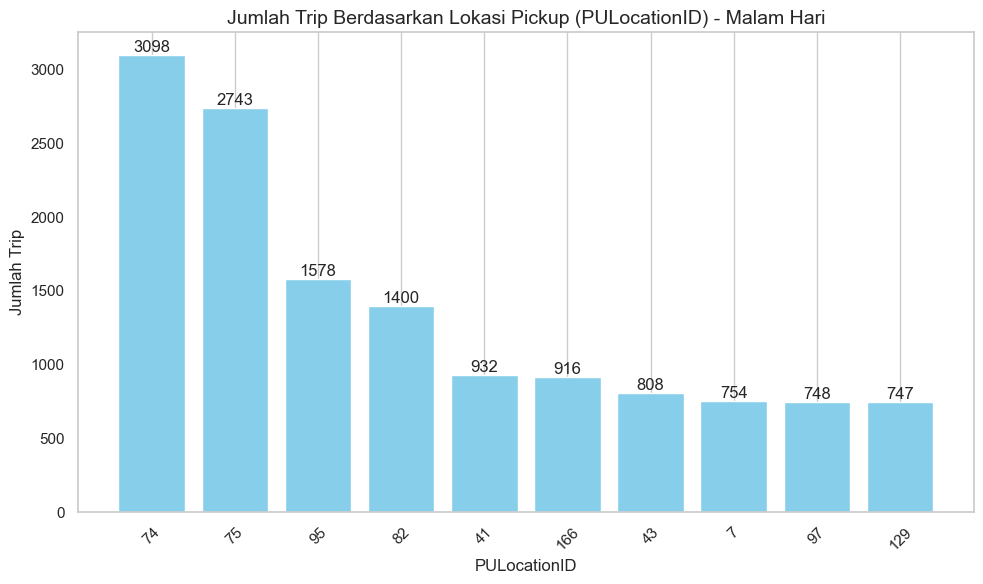

In [654]:
import pandas as pd
import matplotlib.pyplot as plt

# Data untuk lokasi pickup dengan jumlah trip
data = {
    'PULocationID': [74, 75, 95, 82, 41, 166, 43, 7, 97, 129],
    'trip_count': [3098, 2743, 1578, 1400, 932, 916, 808, 754, 748, 747]
}

# Membuat DataFrame
pickup_counts = pd.DataFrame(data)

# Mengurutkan data berdasarkan trip_count dari besar ke kecil
pickup_counts_sorted = pickup_counts.sort_values(by='trip_count', ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(pickup_counts_sorted['PULocationID'].astype(str), pickup_counts_sorted['trip_count'], color='skyblue')
plt.title('Jumlah Trip Berdasarkan Lokasi Pickup (PULocationID) - Malam Hari', fontsize=14)
plt.xlabel('PULocationID', fontsize=12)
plt.ylabel('Jumlah Trip', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan label pada setiap bar
for index, value in enumerate(pickup_counts_sorted['trip_count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Lima Lokasi Pengambilan Paling Ramai:
PULocationID
74     13144
75      8985
41      3986
166     3850
95      3799
Name: count, dtype: int64


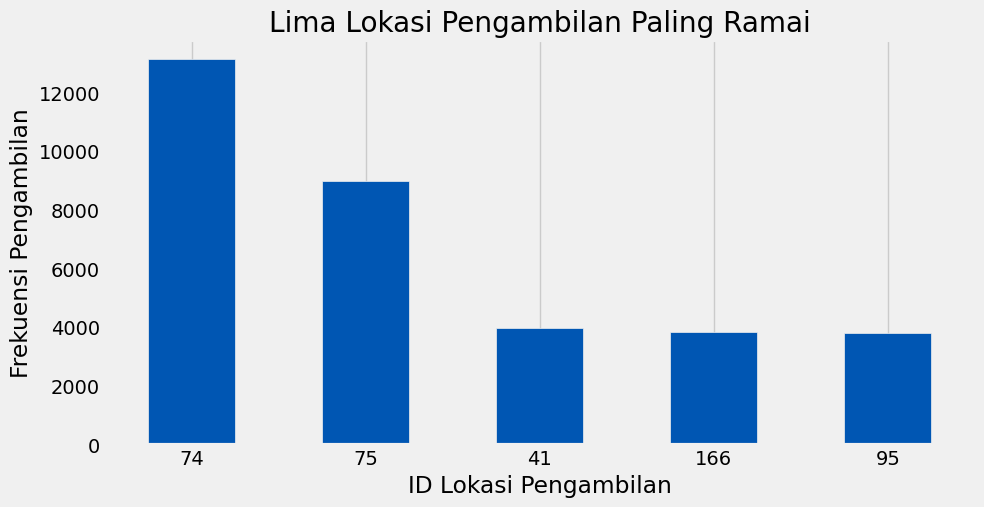

In [ ]:
# Menghitung frekuensi pengambilan berdasarkan lokasi
top_locations = df22['PULocationID'].value_counts().head(5)

# Menampilkan tabel
print("Lima Lokasi Pengambilan Paling Ramai:")
print(top_locations)

# Visualisasi
plt.figure(figsize=(10, 5))
top_locations.plot(kind='bar', color='#0056B3')  # Warna biru senada
plt.title('Lima Lokasi Pengambilan Paling Ramai')
plt.xlabel('ID Lokasi Pengambilan')
plt.ylabel('Frekuensi Pengambilan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


* Lokasi 74 adalah yang paling ramai dan kemungkinan besar merupakan area yang memiliki banyak aktivitas, seperti pusat perbelanjaan, stasiun transportasi, atau tempat wisata. Lokasi-lokasi lainnya juga penting meskipun dengan jumlah pengambilan yang lebih sedikit, dan bisa jadi mencerminkan area pemukiman atau bisnis yang juga cukup aktif.

# 3. Pembayaran tipe apa yang perlu diperbanyak untuk meningkatkan kemudahan pelanggan?


Summary of Payment Types:
              Count  Percentage
payment_type                   
Credit card   44133      66.245
Cash          22190      33.308
No charge       247       0.371
Dispute          50       0.075
Unknown           1       0.002


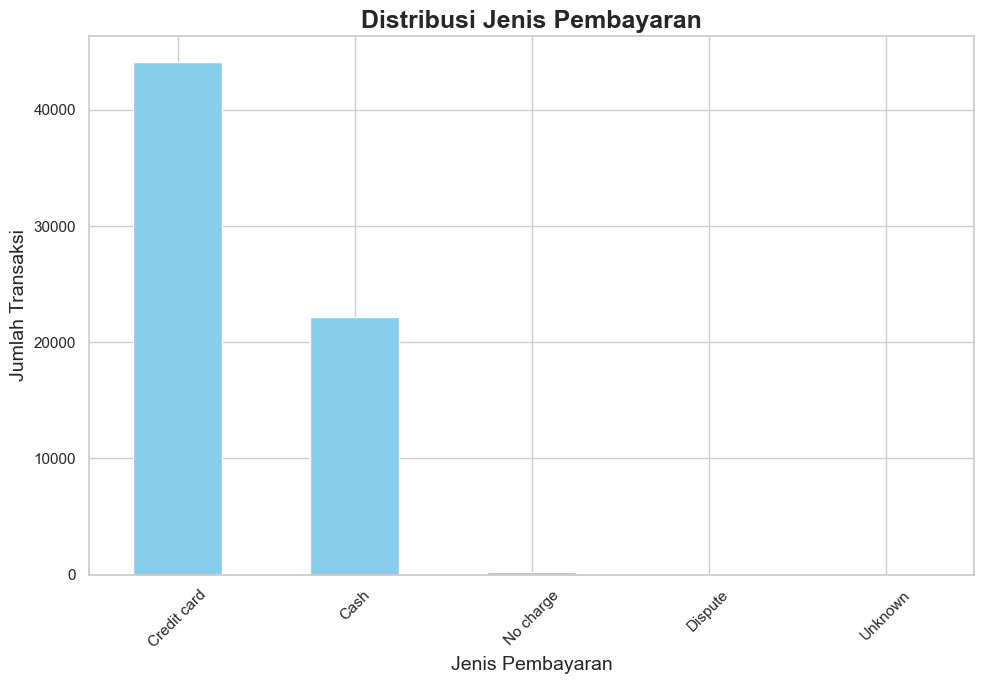


Jenis Pembayaran Terbanyak per Vendor:
vendor_name
Creative Mobile Technologies    Credit card
VeriFone Inc                    Credit card
Name: payment_type, dtype: object

Pivot Table (RatecodeID vs Payment Type):
payment_type            Cash  Credit card  Dispute  No charge  Unknown
RatecodeID                                                            
JFK                       36           98        0          3        0
Nassau or Westchester     35           21        1          0        0
Negotiated fare          313          601        1         12        0
Newark                     8           15        0          0        0
Standard rate          21798        43398       48        232        1


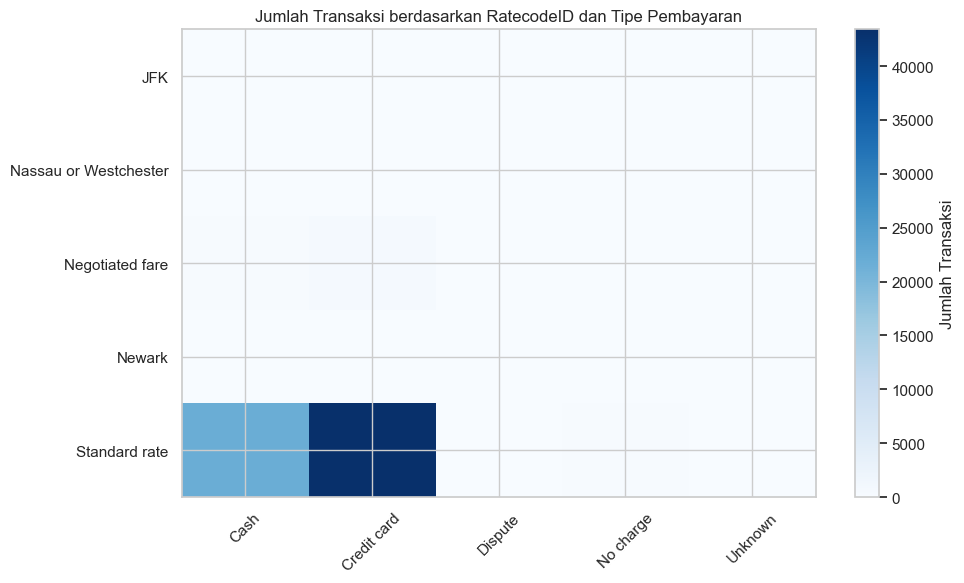


Tipe Perjalanan Terbanyak per Jenis Pembayaran:
payment_type
Cash          1.000
Credit card   1.000
Dispute       1.000
No charge     1.000
Unknown       1.000
Name: trip_type, dtype: float64


In [656]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map payment types
payment_type_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Update payment_type in df22
df22['payment_type'] = df22['payment_type'].replace(payment_type_mapping)

# Step 2: Calculate payment type counts and percentages
payment_counts = df22['payment_type'].value_counts()
payment_percentages = (payment_counts / payment_counts.sum()) * 100

# Display payment types with percentages
payment_summary = pd.DataFrame({'Count': payment_counts, 'Percentage': payment_percentages})
print("Summary of Payment Types:")
print(payment_summary)

# Step 3: Visualize payment type distribution
plt.figure(figsize=(10, 7))
payment_summary['Count'].plot(kind='bar', color='skyblue')
plt.title('Distribusi Jenis Pembayaran', fontsize=18, fontweight='bold')
plt.xlabel('Jenis Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Most common payment type per vendor_name
most_common_payment_per_vendor = df22.groupby('vendor_name')['payment_type'].agg(lambda x: x.value_counts().idxmax())
print("\nJenis Pembayaran Terbanyak per Vendor:")
print(most_common_payment_per_vendor)

# Step 5: Analyze Rate Code Distribution
rate_code_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

# Update RatecodeID in df22
df22['RatecodeID'] = df22['RatecodeID'].replace(rate_code_mapping)

# Step 6: Pivot table for RatecodeID and payment_type
pivot_table = pd.pivot_table(df22, values='fare_amount', index='RatecodeID', columns='payment_type', aggfunc='count', fill_value=0)

print("\nPivot Table (RatecodeID vs Payment Type):")
print(pivot_table)

# Visualize pivot table as a heatmap
plt.figure(figsize=(10, 6))
plt.title('Jumlah Transaksi berdasarkan RatecodeID dan Tipe Pembayaran')
plt.imshow(pivot_table, aspect='auto', cmap='Blues')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.colorbar(label='Jumlah Transaksi')
plt.tight_layout()
plt.show()

# Step 7: Identify the most common trip type for each payment type
# Assuming 'trip_type' is a column in df22
trip_type_summary = df22.groupby('payment_type')['trip_type'].agg(lambda x: x.value_counts().idxmax())
print("\nTipe Perjalanan Terbanyak per Jenis Pembayaran:")
print(trip_type_summary)


* Hubungan antara Lokasi Pengambilan dan Jenis Metode Pembayaran

Chi-Squared: 13123.723348747879, P-value: 0.0
Terdapat hubungan signifikan antara lokasi pengambilan dan jenis pembayaran.


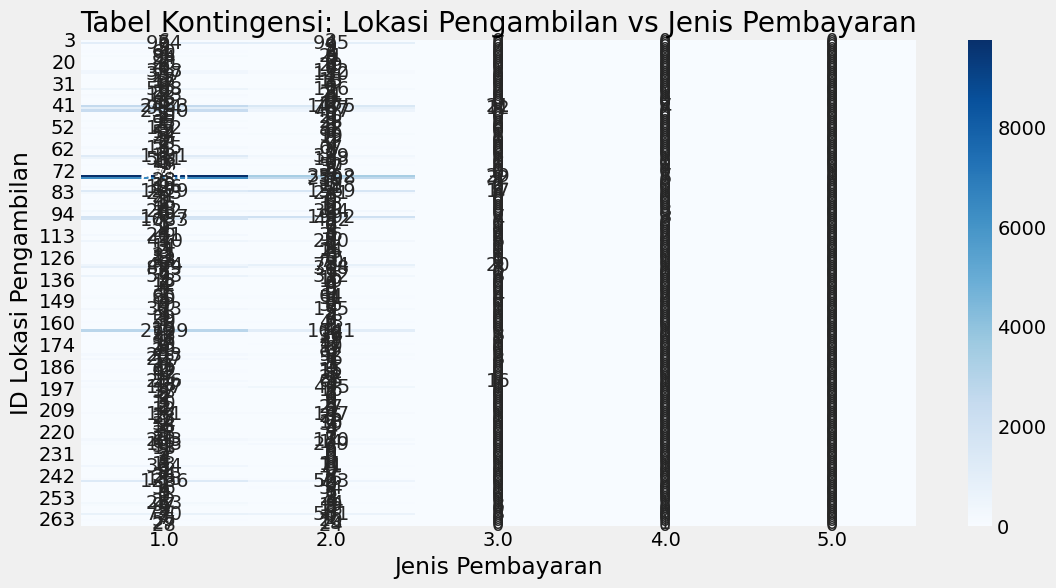

In [ ]:
from scipy import stats

# Menghitung tabel kontingensi
contingency_table = pd.crosstab(df22['PULocationID'], df22['payment_type'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Squared: {chi2}, P-value: {p}')
if p < 0.05:
    print("Terdapat hubungan signifikan antara lokasi pengambilan dan jenis pembayaran.")
else:
    print("Tidak terdapat hubungan signifikan antara lokasi pengambilan dan jenis pembayaran.")

# Visualisasi
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Tabel Kontingensi: Lokasi Pengambilan vs Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('ID Lokasi Pengambilan')
plt.show()


* Hubungan antara Jumlah Tip dan Total Pembayaran

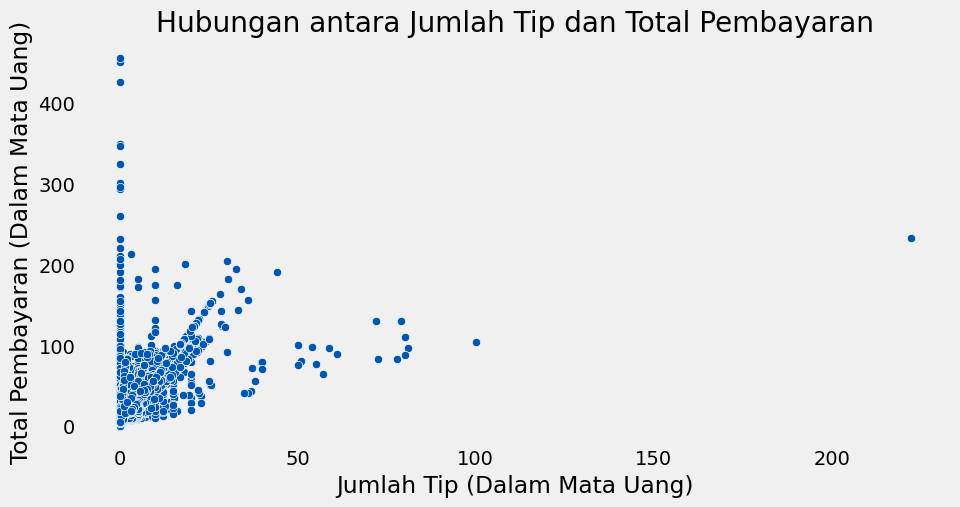

In [ ]:
# Visualisasi hubungan antara tip dan total pembayaran
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df22, x='tip_amount', y='total_amount', color='#0056B3')  # Warna biru senada
plt.title('Hubungan antara Jumlah Tip dan Total Pembayaran')
plt.xlabel('Jumlah Tip (Dalam Mata Uang)')
plt.ylabel('Total Pembayaran (Dalam Mata Uang)')
plt.grid()
plt.show()


* Menghitung rasio tip_amount/day terbanyak di hari apa?

In [ ]:
# Menghitung jumlah trip per hari
trip_counts_per_day = df22.groupby('Pickup_Day').size()

# Menghitung total tip per hari
tip_amount_per_day = df22.groupby('Pickup_Day')['tip_amount'].sum()

# Menghitung rasio tip per trip
tip_per_trip_ratio = tip_amount_per_day / trip_counts_per_day

# Menampilkan rasio tip per trip
summary_df = pd.DataFrame({
    'Trip Count': trip_counts_per_day,
    'Total Tip Amount': tip_amount_per_day,
    'Tip per Trip Ratio': tip_per_trip_ratio
})

# Menemukan hari dengan rasio tip tertinggi
highest_tip_day = summary_df['Tip per Trip Ratio'].idxmax()
highest_tip_value = summary_df['Tip per Trip Ratio'].max()

# Menampilkan hasil
print(f'Hari dengan rasio tip terbanyak: {highest_tip_day} dengan rasio {highest_tip_value:.2f}')


Hari dengan rasio tip terbanyak: Sunday dengan rasio 2.24


* Perbedaan Signifikan dalam Frekuensi Pengambilan Berdasarkan Kategori Waktu

Frekuensi Pengambilan per Kategori Waktu:
category_time
Normal            18085
Rush Evening      11915
Rush Morning       8136
Normal Weekend     7177
Normal Evening     7163
Night Weekend      5141
Rush Weekend       4050
Night Weekday      3434
Unknown            1520
Name: count, dtype: int64


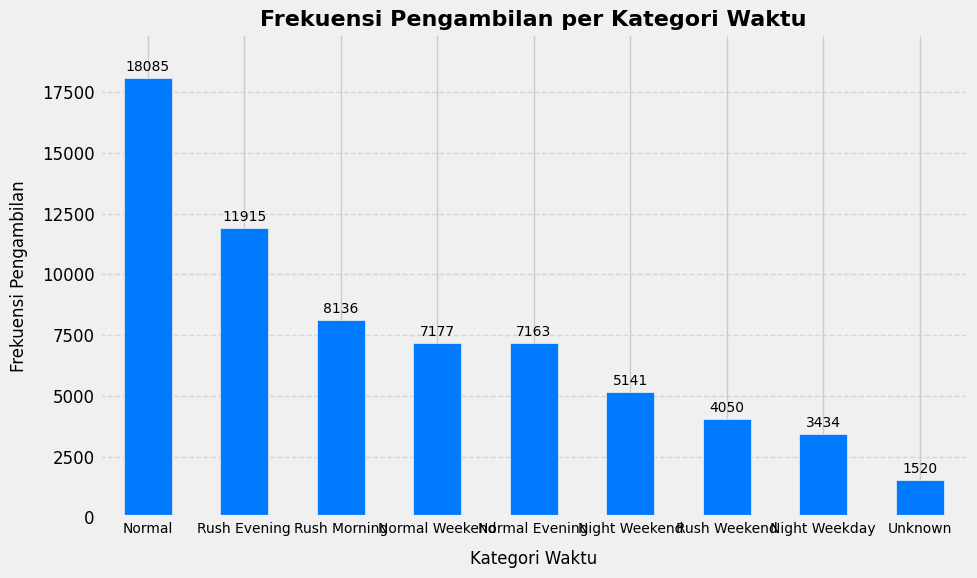

ANOVA Result: F-statistic=nan, P-value=nan


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Contoh kode jika menggunakan DataFrame df22
# pickup_counts_category = df22['category_time'].value_counts()

# Menampilkan tabel frekuensi
print("Frekuensi Pengambilan per Kategori Waktu:")
print(pickup_counts_category)

# Visualisasi
plt.figure(figsize=(10, 6))
ax = pickup_counts_category.plot(kind='bar', color='#007BFF')  # Warna biru

# Menyesuaikan tampilan
plt.title('Frekuensi Pengambilan per Kategori Waktu', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Waktu', fontsize=12, labelpad=10)
plt.ylabel('Frekuensi Pengambilan', fontsize=12, labelpad=10)
plt.xticks(rotation=0, fontsize=10, color='black')  # Ukuran font lebih kecil dan warna hitam untuk label x-axis
plt.yticks(fontsize=12)  # Ukuran font untuk label y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label di atas setiap batang
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', fontsize=10, padding=3, color='black')

# Menambahkan margin di sekitar grafik
plt.gca().margins(y=0.1)
plt.tight_layout()
plt.show()

# Uji ANOVA untuk perbedaan signifikan
anova_result = stats.f_oneway(
    df22[df22['category_time'] == 'Pagi']['Pickup_Hour'],
    df22[df22['category_time'] == 'Siang']['Pickup_Hour'],
    df22[df22['category_time'] == 'Malam']['Pickup_Hour']
)
print(f'ANOVA Result: F-statistic={anova_result.statistic}, P-value={anova_result.pvalue}')


In [474]:
# Misalkan df22 sudah didefinisikan sebelumnya
# df22 = pd.read_csv('data.csv')  # Contoh cara memuat data

# Konversi kolom waktu ke datetime
df22['lpep_pickup_datetime'] = pd.to_datetime(df22['lpep_pickup_datetime'])
df22['lpep_dropoff_datetime'] = pd.to_datetime(df22['lpep_dropoff_datetime'])

# Waktu pickup paling ramai
pickup_counts = df22['Pickup_Hour'].value_counts().sort_index()
most_busy_hour = pickup_counts.idxmax()
least_busy_hour = pickup_counts.idxmin()

# Hari dengan pickup paling ramai
most_busy_day = df22['Pickup_Day'].value_counts().idxmax()

# Lima lokasi pickup paling ramai
top_locations = df22['PULocationID'].value_counts().head(5)

# Jenis pembayaran terbanyak
most_common_payment = df22['payment_type'].value_counts().idxmax()

print("Waktu pickup paling ramai:", most_busy_hour)
print("Waktu pickup paling sedikit:", least_busy_hour)
print("Hari dengan pickup paling ramai:", most_busy_day)
print("5 lokasi pickup paling ramai:\n", top_locations)
print("Jenis pembayaran terbanyak:", most_common_payment)


Waktu pickup paling ramai: 18
Waktu pickup paling sedikit: 5
Hari dengan pickup paling ramai: Tuesday
5 lokasi pickup paling ramai:
 PULocationID
74     13144
75      8985
41      3986
166     3850
95      3799
Name: count, dtype: int64
Jenis pembayaran terbanyak: 1.0


In [471]:
from scipy import stats

# Pisahkan tip berdasarkan jenis pembayaran
cash_tips = df22[df22['payment_type'] == 'Cash']['tip_amount']
card_tips = df22[df22['payment_type'] == 'Card']['tip_amount']

# Uji t
t_stat, p_value = stats.ttest_ind(cash_tips, card_tips)

print("Statistik t:", t_stat)
print("Nilai p:", p_value)

# Hipotesis: H0: Tidak ada perbedaan, H1: Ada perbedaan
alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara tip untuk Cash dan Card.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara tip untuk Cash dan Card.")


Statistik t: nan
Nilai p: nan
Gagal tolak H0: Tidak ada perbedaan signifikan antara tip untuk Cash dan Card.


# 4. Bagaimana trend disparitas speed per jam di semua vendor?

In [657]:
df22.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_date',
       'pickup_time', 'dropoff_date', 'dropoff_time', 'Pickup_Hour',
       'Pickup_Day', 'Pickup_Month', 'Pickup_Year', 'pola_2shift',
       'pola_3shift', 'category_time', 'trip_distance(Km)',
       'trip_duration(Hrs)', 'trip_duration(Min)', 'speed(Kph)', 'vendor_name',
       'pendapatan_per_trip', 'fuel_cost_per_trip',
       'maintenance_cost_per_trip', 'fixed_costs_per_trip',
       'total_costs_per_trip', 'laba_bersih_per_trip'],
      dtype='object')

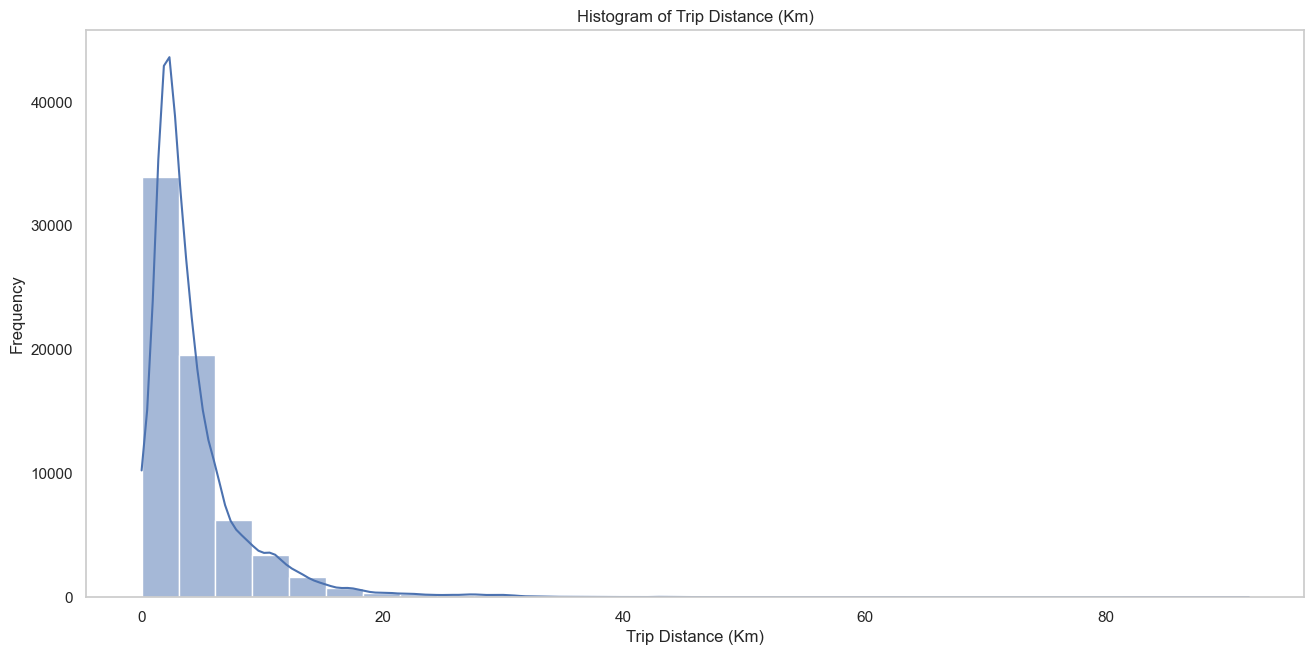

In [666]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df22 is already defined and contains the necessary columns
# df22 = pd.read_csv('path_to_your_data.csv')  # Load your dataset if needed

# Create a histogram for trip distance
plt.figure(figsize=(14, 7))
sns.histplot(df22['trip_distance(Km)'], bins=30, kde=True)  # kde=True to add a kernel density estimate

plt.title('Histogram of Trip Distance (Km)')
plt.xlabel('Trip Distance (Km)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


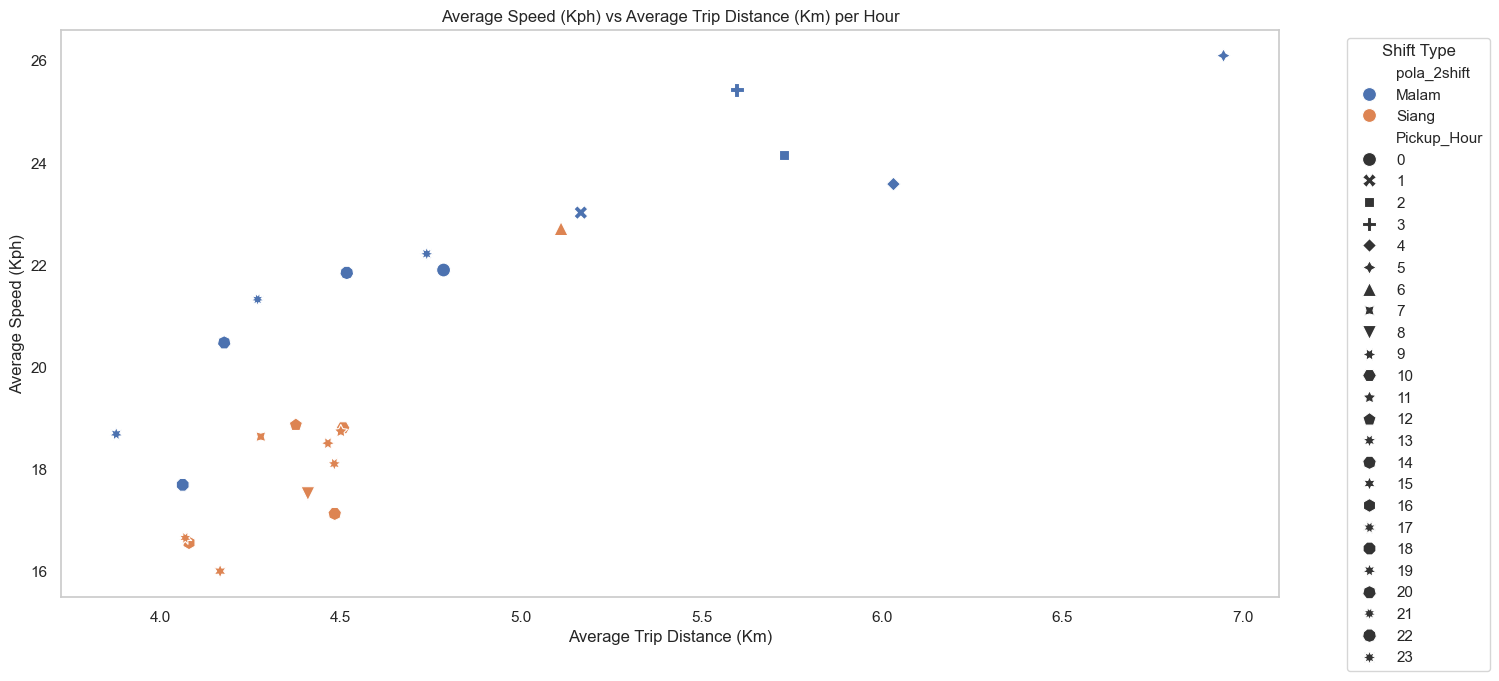

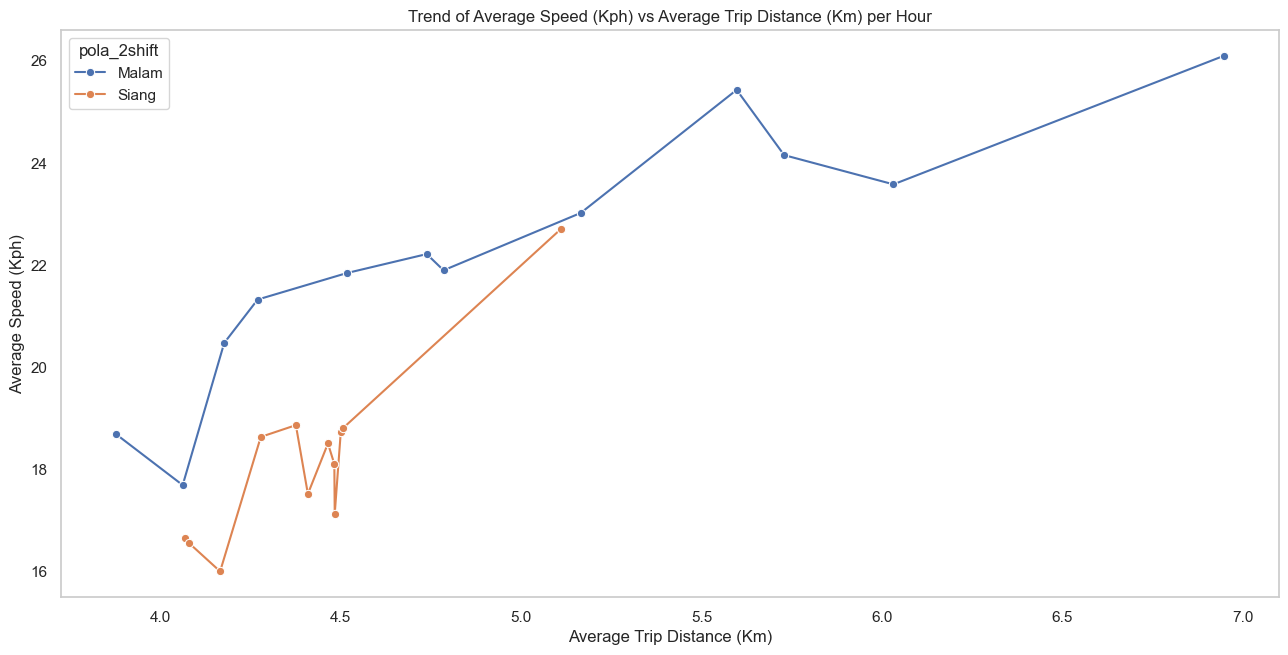

In [665]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df22 is already defined and contains the necessary columns
# df22 = pd.read_csv('path_to_your_data.csv')  # Load your dataset if needed

# Filtering the data for 'Malam' and 'Siang' shifts (assuming they are in pola_2shift)
df_filtered = df22[df22['pola_2shift'].isin(['Malam', 'Siang'])]

# Grouping by pickup hour and shift to get averages
grouped_data = df_filtered.groupby(['Pickup_Hour', 'pola_2shift']).agg(
    average_speed=('speed(Kph)', 'mean'),
    average_distance=('trip_distance(Km)', 'mean')
).reset_index()

# Create a scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(data=grouped_data, 
                x='average_distance', 
                y='average_speed', 
                hue='pola_2shift', 
                style='Pickup_Hour',
                palette='deep', 
                s=100)

plt.title('Average Speed (Kph) vs Average Trip Distance (Km) per Hour')
plt.xlabel('Average Trip Distance (Km)')
plt.ylabel('Average Speed (Kph)')
plt.legend(title='Shift Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Optional: Create a line plot to show trends for both shifts
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_data, 
              x='average_distance', 
              y='average_speed', 
              hue='pola_2shift', 
              marker='o')

plt.title('Trend of Average Speed (Kph) vs Average Trip Distance (Km) per Hour')
plt.xlabel('Average Trip Distance (Km)')
plt.ylabel('Average Speed (Kph)')
plt.grid()
plt.show()


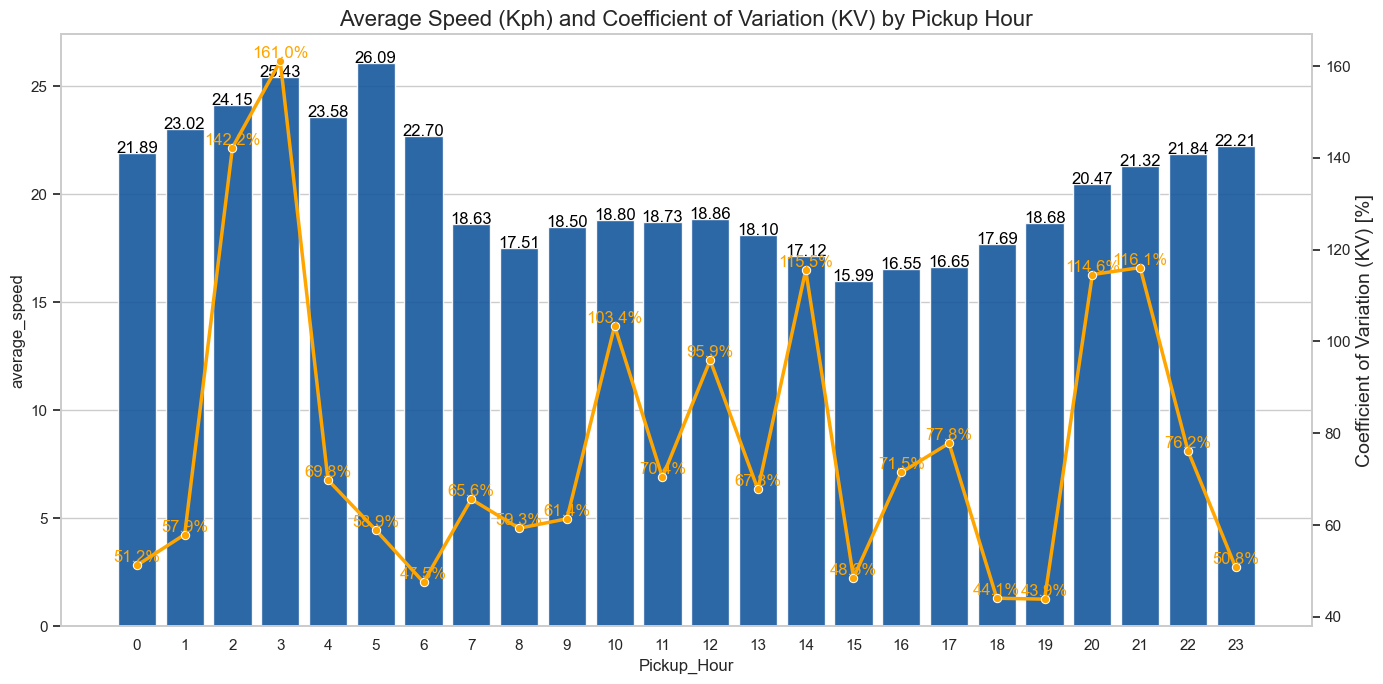

In [701]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df22 is already defined and contains the necessary columns

# Filtering the data for 'Malam' and 'Siang'
df_filtered = df22[df22['pola_2shift'].isin(['Malam', 'Siang'])]

# Grouping by pickup hour to calculate average speed and KV
grouped_data = df_filtered.groupby('Pickup_Hour').agg(
    average_speed=('speed(Kph)', 'mean'),
    std_dev_speed=('speed(Kph)', 'std'),
    count=('speed(Kph)', 'count')
).reset_index()

# Calculate Coefficient of Variation (KV) as a percentage
grouped_data['KV'] = (grouped_data['std_dev_speed'] / grouped_data['average_speed']) * 100

# Create the plot
plt.figure(figsize=(14, 7))

# Bar plot for average speed with a darker blue color
bar_plot = sns.barplot(data=grouped_data, x='Pickup_Hour', y='average_speed', color='#0056b3', alpha=0.9)

# Add labels to the bars for average speed
for index, row in grouped_data.iterrows():
    bar_plot.text(index, row.average_speed, f"{row.average_speed:.2f}", color='black', ha='center')

# Create a secondary axis for the KV line with increased thickness
ax2 = bar_plot.twinx()
line_plot = sns.lineplot(data=grouped_data, x='Pickup_Hour', y='KV', color='orange', marker='o', ax=ax2, linewidth=2.5)

# Add labels for KV values with one decimal place
for index, row in grouped_data.iterrows():
    ax2.text(index, row.KV, f"{row.KV:.1f}%", color='orange', ha='center', va='bottom')

# Customize the plot
plt.title('Average Speed (Kph) and Coefficient of Variation (KV) by Pickup Hour', fontsize=16)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Average Speed (Kph)', fontsize=14)
ax2.set_ylabel('Coefficient of Variation (KV) [%]', fontsize=14)  # Adjusted label for KV
plt.xticks(rotation=45)
plt.tight_layout()  # To ensure everything fits well without overlapping

# Remove grid lines
plt.grid(False)

plt.show()


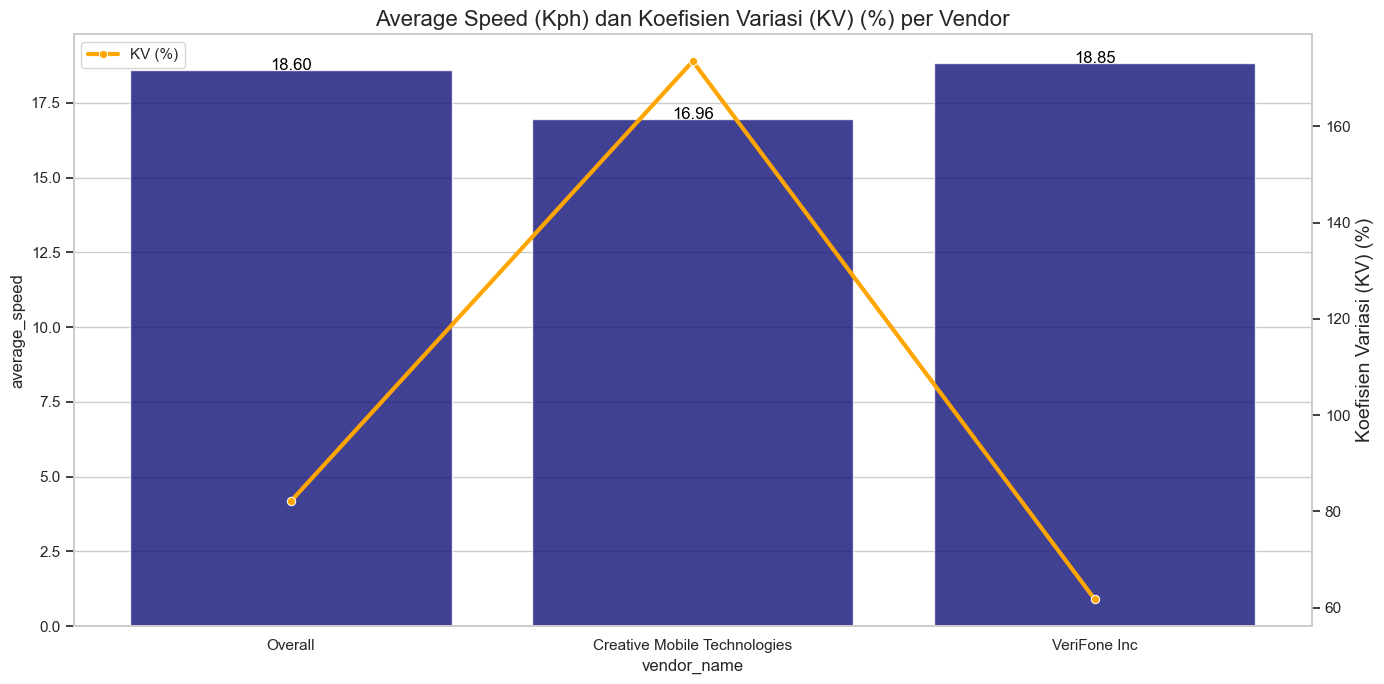

In [694]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df22 is already defined and contains the necessary columns

# Step 1: Hitung rata-rata keseluruhan untuk kecepatan dan jarak
overall_average_speed = df22['speed(Kph)'].mean()
overall_average_distance = df22['trip_distance(Km)'].mean()
overall_std_dev_speed = df22['speed(Kph)'].std()
overall_KV = overall_std_dev_speed / overall_average_speed * 100 if overall_average_speed != 0 else None  # Menghitung KV dalam persentase

# Step 2: Hitung rata-rata dan KV per vendor
vendor_data = df22.groupby('vendor_name').agg(
    average_speed=('speed(Kph)', 'mean'),
    average_distance=('trip_distance(Km)', 'mean'),
    std_dev_speed=('speed(Kph)', 'std'),
    count=('speed(Kph)', 'count')
).reset_index()

# Hitung Koefisien Variasi (KV) untuk vendor dalam persentase
vendor_data['KV'] = (vendor_data['std_dev_speed'] / vendor_data['average_speed'] * 100).fillna(0)

# Step 3: Buat DataFrame untuk data keseluruhan
overall_data = pd.DataFrame({
    'vendor_name': ['Overall'],
    'average_speed': [overall_average_speed],
    'average_distance': [overall_average_distance],
    'KV': [overall_KV]
})

# Step 4: Gabungkan data keseluruhan dan vendor
combined_data = pd.concat([overall_data, vendor_data], ignore_index=True)

# Step 5: Buat grafik batang untuk average speed dan line chart untuk KV
plt.figure(figsize=(14, 7))

# Bar plot untuk average speed dengan warna biru tua
bar_plot = sns.barplot(data=combined_data, x='vendor_name', y='average_speed', color='darkblue', alpha=0.8)

# Label untuk setiap bar
for index, row in combined_data.iterrows():
    bar_plot.text(index, row.average_speed, f"{row.average_speed:.2f}", color='black', ha='center')

# Buat axis sekunder untuk KV
ax2 = bar_plot.twinx()
# Line plot untuk KV dengan ketebalan lebih
line_plot = sns.lineplot(data=combined_data, x='vendor_name', y='KV', color='orange', marker='o', ax=ax2, linewidth=3)

# Sesuaikan plot
plt.title('Average Speed (Kph) dan Koefisien Variasi (KV) (%) per Vendor', fontsize=16)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Average Speed (Kph)', fontsize=14)
ax2.set_ylabel('Koefisien Variasi (KV) (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(False)  # Matikan gridlines
plt.legend(['KV (%)'], loc='upper left')
plt.tight_layout()  # Mengatur tata letak
plt.show()


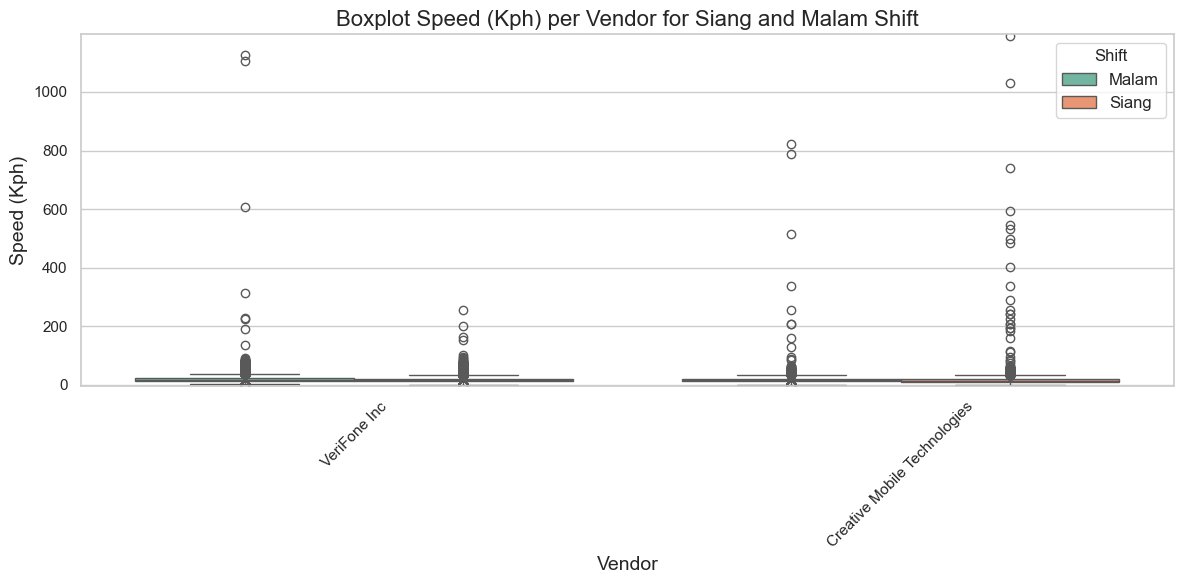

In [699]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df22 adalah DataFrame yang memuat data Anda
# Mengambil data speed per vendor untuk shift siang dan malam
df_filtered = df22[df22['pola_2shift'].isin(['Siang', 'Malam'])]

# Membuat boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='vendor_name', y='speed(Kph)', hue='pola_2shift', palette='Set2')

# Mengatur judul dan label
plt.title('Boxplot Speed (Kph) per Vendor for Siang and Malam Shift', fontsize=16)
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Speed (Kph)', fontsize=14)

# Mengatur batas sumbu y untuk fokus pada rentang speed
plt.ylim(df_filtered['speed(Kph)'].min() - 5, df_filtered['speed(Kph)'].max() + 5)

plt.legend(title='Shift', fontsize=12)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()  # Untuk mengatur tampilan agar lebih rapi
plt.show()

